### Run the first cell befor before anything else, it imports all required headers!

In [2]:
import numpy as np
from matplotlib.colors import colorConverter
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import os
import math
from copy import deepcopy 
# from mpl_toolkits.axes_grid1 import make_axes_locatable 
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

def cm2inch(value):
    return value/2.54

def swap_arrays(ca,cb):
    catemp=deepcopy(ca)
    ca=deepcopy(cb)
    cb=deepcopy(catemp)
    return (ca,cb)

##unit_conversion is the ratio of number of demes to measurement units
unit_conversion=100

# import matplotlib.gridspec 

### Fig1 option 1 Logspirals and fits  ver1 Moran

203


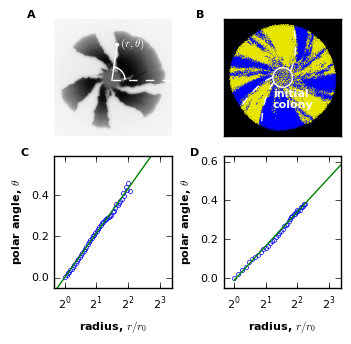

In [52]:
from matplotlib.patches import Ellipse, Arc

fs=8 #fontzize
sfs=4#small fontsize
lw=1#linewidth
ms=3#markersize

#Moran files:
#with shuffling : new_figures/PAPER FIGURES/logspiral_candidates/try5_binomial_shuffle/N6/g2.0/D0.00/ch0.8/1/ca.txt
#Without shuffline (wrong): /Users/ashish/Downloads/logspiral_candidates/try5_binomial_r0/N6/g2.0/D0.00/ch0.8/1/fig4.png        



path ='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/logspiral and fits/'
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/fig1_logspiral_and_fits/'
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(3.42,3.42))

## for gdnoise :stochastic/c.txt
with open(path+'moran1/ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(path+'moran1/c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]  
c=np.array(c)  
cb=c-ca 

r=40
l= len(ca)
b=len(ca.T)
for i in range(0,b/2):
    if c[l/2,b/2+i]<.85:   #condition for the colony to have expanded
        lexp=i-10
        break

print lexp #length of expansion

wall=np.zeros(lexp)
wallx=np.zeros(lexp)
wally=np.zeros(lexp)


wall1x=np.zeros(lexp)
wall1y=np.zeros(lexp)

wall2x=np.zeros(lexp)
wall2y=np.zeros(lexp)

wall3x=np.zeros(lexp)
wall3y=np.zeros(lexp)
for idx in range(20,lexp):
    ##for gdnoise val=2.58+.4*math.log(float(idx))
    val=2.78+.4*math.log(float(idx))
    wallx[idx]= b/2+idx* math.cos(val)
    wally[idx]= l/2-idx* math.sin(val)
    ##for gdnoise val=1.52+.4*math.log(float(idx))
    val=1.62+.4*math.log(float(idx))
    wall1x[idx]= b/2+idx* math.cos(val)
    wall1y[idx]= l/2-idx* math.sin(val)
#     ##for gdnoise val=-.18+.18*math.log(float(idx)) or val=1.11+ .4*math.log(float(idx))
    val=2.15+ .4*math.log(float(idx))
    wall2x[idx]= b/2+idx* math.cos(val)
    wall2y[idx]= l/2-idx* math.sin(val)
#     ##for gdnoiseval=1.91+.4*math.log(float(idx))
    val=-0.784+.4*math.log(float(idx))
    wall3x[idx]= b/2+idx* math.cos(val)
    wall3y[idx]= l/2-idx* math.sin(val)
    

img = np.zeros((l,b,3))
img[:,:,1]=0.9*cb[:,:]
img[:,:,0]=0.9*cb[:,:]
img[:,:,2]=ca[:,:]

ax[0][1].set_xticks([])
ax[0][1].set_yticks([])

# to add initial colony circle
circle=plt.Circle((l/2,b/2),r,color='white',linewidth=lw, fill=False)
ax[0][1].add_patch(circle)
# ax[0][1].annotate('initial\ncolony', xy=(l/2+1.2*r, b/2+r),ha ='left',fontsize=fs,color='w', fontweight='bold'
#    ) 
ax[0][1].annotate('initial\ncolony', xy=(l/2-1.0*r, b/2+3.1*r),ha ='left',fontsize=fs,color='w', fontweight='bold'
   )
# to add boundaries of the walls
# ax[0][1].plot(wallx[40:lexp],wally[40:lexp],'white',linestyle='--',linewidth=lw)
ax[0][1].plot(wall1x[40:lexp],wall1y[40:lexp],'white',linestyle='--',linewidth=lw)
ax[0][1].plot(wall2x[40:lexp],wall2y[40:lexp],'white',linestyle='--',linewidth=lw)
ax[0][1].plot(wall3x[40:lexp],wall3y[40:lexp],'white',linestyle='--',linewidth=lw)


ax[0][1].set_title('B',y=0.95,x=-0.20,fontsize = fs,weight='bold')
img3 = ax[0][1].imshow(img,interpolation='none')




original=mpimg.imread(path+'expfig/option.png')


#original = Image.open('')
ax[0][0].axis('off')
img3 = ax[0][0].imshow(original, extent=[0,0.9,0,0.9],interpolation='none')

ax[0][0].set_xticks([])
ax[0][0].set_yticks([])

ax[0][0].set_title('A',y=0.95,x=-0.20,fontsize = fs,weight='bold')


## for an arrow to the point instead
#ax[0][0].annotate('',
#            xy=(0.48, 0.7),  # theta, radius
#            xytext=(0.44, 0.43),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white', shrink=0.05),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )
angle1=80
angle2=0
## for the arc for theta
ellipse = Arc([0.44,0.43],0.2,0.2,angle2,0,angle1,color='white',edgecolor='black', linewidth=lw)
ax[0][0].add_patch(ellipse)

##for theta right next to arc
#ax[0][0].text(0.62, 0.5, '$\\theta$', fontsize=30, color='white',transform=ax[0][0].transAxes) 
#print l
#ax[0][0].annotate('',
#            xy=(l/2+l/4, l/2-l/4), # theta, radius
#            xytext=(l/2+40, l/2-40),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white')#, edgecolor='none'),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )


# for line to r,theta
ax[0][0].plot((0.48, 0.44),(0.7, 0.43),'white',linewidth=lw)   
#for axes line          
ax[0][0].plot((0.44,0.9),(0.43,0.43),'white',linestyle='--',linewidth=lw) 
# for r,theta at the point         
ax[0][0].text(0.5, 0.69, '$(r, \\theta)$', fontsize=fs, color='white')  
   
circle=plt.Circle((0.48,0.7),0.01,color='white',linewidth=lw, fill=True)                                  
ax[0][0].add_patch(circle)                                                                 
                                                                                                                               
#ax[0][0].annotate('r',
#            xy=(0.5, 0.5),  # theta, radius
#            xytext=(0.5, 0.5),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white', shrink=0.05),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )            
#            
            
#ax[0][0].text((0.5, 0.5), 'r',
#        #horizontalalignment='left',
#        #verticalalignment='top',
#        transform=ax[0][0].transAxes)




ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][1].set_yticks([])
ax[1][1].set_xticks([])

## commenting the code for the gdnoise figure

# with open(path+'/stochastic fit/wall.txt') as file:
#     wall = [[float(digit) for digit in line.split()] for line in file]
#     wall=np.array(wall[:len(wall)-8])     
# lexp= len(wall) 
# SS=6
# lin=lexp/SS+2
# lst=lexp-lin
# x1=np.arange(lin,lst+lin)
# xdata=x1.astype(float)/r
# ydata=wall[lin:]
# ydata = ydata.reshape((lst))
# ydata=ydata+np.abs(np.min(ydata))
# logx=np.log(xdata)
# z=np.polyfit(logx, ydata, 1)
# p=np.poly1d(z)

# k=np.zeros(lst) 
# for i in range(0, lst):
#     k[i]=p(logx[i])
# ax[1][1].set_xlim(0.8,20.5)
# ax[1][1].set_ylim(-0.05,np.max(ydata)+0.25)
# ax[1][1].semilogx(xdata,ydata,'o',markeredgecolor='blue',markerfacecolor='none',linewidth=lw, basex=2,markevery=10,markersize=ms)
# ax[1][1].semilogx([1,19],[p(np.log(1)),p(np.log(19))],linewidth=lw, basex=2)
# #ax[1][1].semilogx([50,1000],[p(np.log(50)),p(np.log(1000))],linewidth=lw)
# ax[1][1].set_xlabel('radius, $r/r_0$',fontsize = fs,fontweight='bold')
# ax[1][1].set_ylabel('polar angle, $\\theta $',fontsize = fs,fontweight='bold')
# ax[1][1].tick_params(axis='both', which='major', labelsize=fs)
# ax[1][1].set_title('D',y=0.95,x=-0.25,fontsize = fs,weight='bold')
# ax[1][1].set_yticks((0.0,0.2,0.4,0.6,0.8))


## moranfigure from .../nwm_avg/try5/g2.0/D0.00/ch0.8/N6
with open(path+'/moran_logspiral_fit/wall.txt') as file:
    wall = [[float(digit) for digit in line.split()] for line in file]
    wall=np.array(wall[:len(wall)-8])     
lexp= len(wall) 

# SS=6
# lin=lexp/SS+2
# lst=lexp-lin
# x1=np.arange(lin,lst+lin)
# xdata=x1.astype(float)/r
# ydata=wall[lin:]
# ydata = ydata.reshape((lst))

##for moran wall plot:
lin=40 ## wall extraction begins at 20, and is 0 till 20 but IC
#but the Initial conditions was a circle of R=40
lst=lexp
x1=np.arange(lin,lst)
xdata=x1.astype(float)/40
#ydata=wall[lin:]
#print len(ydata), len(xdata)

ydata=np.ravel(wall[lin:])

ydata=ydata+np.abs(np.min(ydata))
logx=np.log(xdata)
z=np.polyfit(logx, ydata, 1)
p=np.poly1d(z)

# k=np.zeros(lst) 
# for i in range(0, lst):
#     k[i]=p(logx[i])
ax[1][1].set_xlim(0.8,10.5)
ax[1][1].set_ylim(-0.05,0.63)
ax[1][1].set_yticks((0.0,0.2,0.4,0.6))
ax[1][1].semilogx(xdata,ydata,'o',markeredgecolor='blue',markerfacecolor='none',linewidth=lw, basex=2,markevery=4,markersize=ms)
ax[1][1].semilogx([1,19],[p(np.log(1)),p(np.log(19))],linewidth=lw, basex=2)
#ax[1][1].semilogx([50,1000],[p(np.log(50)),p(np.log(1000))],linewidth=lw)
ax[1][1].set_xlabel('radius, $r/r_0$',fontsize = fs,fontweight='bold')
ax[1][1].set_ylabel('polar angle, $\\theta $',fontsize = fs,fontweight='bold')
ax[1][1].tick_params(axis='both', which='major', labelsize=fs)
ax[1][1].set_title('D',y=0.95,x=-0.25,fontsize = fs,weight='bold')



#FOR NOISEFIT!
#ax[1][1].set_xlim(2**6,2**10)
#ax[1][1].set_ylim(-0.05,np.max(ydata)+0.2)



logx2=np.loadtxt(path+'exp_data/x2.txt')
x2=np.exp(logx2)
y2=np.loadtxt(path+'exp_data/y2.txt')


z3=np.polyfit(logx2, -1*y2, 1)
p3=np.poly1d(z3)

ax[1][0].semilogx(x2,-1*y2,'o',markeredgecolor='blue',markerfacecolor='none', basex=2,markersize=ms)    
ax[1][0].semilogx([0.5,10],[p3(np.log(0.5)),p3(np.log(10))],linewidth=lw,c='g', basex=2) 
ax[1][0].set_xlabel('radius, $r/r_0$',fontsize = fs,fontweight='bold')
ax[1][0].set_ylabel('polar angle, $\\theta $',fontsize = fs,fontweight='bold')
#ax[1][0].set_xticks(1,5)
ax[1][0].tick_params(axis='both', which='major', labelsize=fs)
ax[1][0].set_yticks((0.0,0.2,0.4,0.6,0.8))
ax[1][0].set_title('C',y=0.95,x=-0.25,fontsize = fs,weight='bold')
ax[1][0].set_xlim(0.8,10.5)
ax[1][0].set_ylim(-0.05,np.max(ydata)+0.2)

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=0.1)
plt.savefig(destpath+'logspiral_and_fits.pdf')
plt.savefig(destpath+'logspiral_and_fits.png')
plt.show()

# Fig1 option 1 Logspirals and fits WF model

297


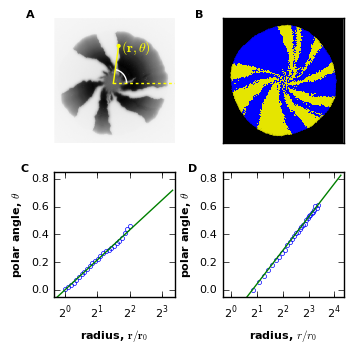

In [83]:

from matplotlib.patches import Ellipse, Arc

fs=8 #fontzize
sfs=4#small fontsize
lw=1#linewidth
ms=3#markersize

#Moran files:
#with shuffling : new_figures/PAPER FIGURES/logspiral_candidates/try5_binomial_shuffle/N6/g2.0/D0.00/ch0.8/1/ca.txt
#Without shuffling (wrong): /Users/ashish/Downloads/logspiral_candidates/try5_binomial_r0/N6/g2.0/D0.00/ch0.8/1/fig4.png        

##gdnoise parameters in the folder.
path ='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/logspiral and fits/'
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/fig1_logspiral_and_fits/'


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(3.42,3.42))

# fig= plt.figure(figsize=(3.42,3.42))
# gs1 =GridSpec(2, 2,width_ratios=[1, 1],height_ratios=[1, 1],wspace=0.0, hspace=0.0)
# ax=[]
# ax.append([])
# ax.append([])
# ax[0].append([])
# ax[0].append([])
# ax[1].append([])
# ax[1].append([])
# ax[0][0]=plt.subplot(gs1[0,0])
# ax[0][1]=plt.subplot(gs1[0,1])
# ax[1][0]=plt.subplot(gs1[1,0])
# ax[1][1]=plt.subplot(gs1[1,1])




## for gdnoise :stochastic/c.txt
with open(path+'stochastic/ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(path+'stochastic/c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]  
c=np.array(c)  
cb=c-ca 

r=40
l= len(ca)
b=len(ca.T)
for i in range(0,b/2):
    if c[l/2,b/2+i]<.85:   #condition for the colony to have expanded
        lexp=i-10
        break

print lexp #length of expansion

## FOR Drawing boundaries on the figure:
# wall=np.zeros(lexp)
# wallx=np.zeros(lexp)
# wally=np.zeros(lexp)
# wall1x=np.zeros(lexp)
# wall1y=np.zeros(lexp)
# wall2x=np.zeros(lexp)
# wall2y=np.zeros(lexp)
# wall3x=np.zeros(lexp)
# wall3y=np.zeros(lexp)
# for idx in range(20,lexp):
#     ##for gdnoise val=2.58+.4*math.log(float(idx))
#     val=2.78+.4*math.log(float(idx))
#     wallx[idx]= b/2+idx* math.cos(val)
#     wally[idx]= l/2-idx* math.sin(val)
#     ##for gdnoise val=1.52+.4*math.log(float(idx))
#     val=1.62+.4*math.log(float(idx))
#     wall1x[idx]= b/2+idx* math.cos(val)
#     wall1y[idx]= l/2-idx* math.sin(val)
# #     ##for gdnoise val=-.18+.18*math.log(float(idx)) or val=1.11+ .4*math.log(float(idx))
#     val=2.15+ .4*math.log(float(idx))
#     wall2x[idx]= b/2+idx* math.cos(val)
#     wall2y[idx]= l/2-idx* math.sin(val)
# #     ##for gdnoiseval=1.91+.4*math.log(float(idx))
#     val=-0.784+.4*math.log(float(idx))
#     wall3x[idx]= b/2+idx* math.cos(val)
#     wall3y[idx]= l/2-idx* math.sin(val)

img = np.zeros((l,b,3))
img[:,:,1]=0.9*cb[:,:]
img[:,:,0]=0.9*cb[:,:]
img[:,:,2]=ca[:,:]

ax[0][1].set_xticks([])
ax[0][1].set_yticks([])

# # to add initial colony circle
# circle=plt.Circle((l/2,b/2),r,color='white',linewidth=lw, fill=False)
# ax[0][1].add_patch(circle)
# # ax[0][1].annotate('initial\ncolony', xy=(l/2+1.2*r, b/2+r),ha ='left',fontsize=fs,color='w', fontweight='bold'
# #    ) 
# ax[0][1].annotate('initial\ncolony', xy=(l/2-1.0*r, b/2+3.1*r),ha ='left',fontsize=fs,color='w', fontweight='bold'
#    )
# # to add boundaries of the walls
# # ax[0][1].plot(wallx[40:lexp],wally[40:lexp],'white',linestyle='--',linewidth=lw)
# ax[0][1].plot(wall1x[40:lexp],wall1y[40:lexp],'white',linestyle='--',linewidth=lw)
# ax[0][1].plot(wall2x[40:lexp],wall2y[40:lexp],'white',linestyle='--',linewidth=lw)
# ax[0][1].plot(wall3x[40:lexp],wall3y[40:lexp],'white',linestyle='--',linewidth=lw)

ax[0][1].set_title('B',y=0.95,x=-0.20,fontsize = fs,weight='bold')
img3 = ax[0][1].imshow(img,interpolation='none',aspect="auto")

original=mpimg.imread(path+'expfig/option.png')
ax[0][1].axis('tight')

img3 = ax[0][0].imshow(original, extent=[0.,0.9,0.,0.9],interpolation='none')

# ax[0][0].axis('off')
# ax[0][0].set_xticks([])
# ax[0][0].set_yticks([])
ax[0][0].axis('tight')
ax[0][0].axis('off')
ax[0][0].set_title('A',y=0.95,x=-0.20,fontsize = fs,weight='bold')


## for an arrow to the point instead
#ax[0][0].annotate('',
#            xy=(0.48, 0.7),  # theta, radius
#            xytext=(0.44, 0.43),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white', shrink=0.05),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )

angle1=80
angle2=0
## for the arc for theta
ellipse = Arc([0.44,0.43],0.2,0.2,angle2,0,angle1,color='white',edgecolor='black', linewidth=lw)
ax[0][0].add_patch(ellipse)

##for theta right next to arc
#ax[0][0].text(0.62, 0.5, '$\\theta$', fontsize=30, color='white',transform=ax[0][0].transAxes) 
#print l
#ax[0][0].annotate('',
#            xy=(l/2+l/4, l/2-l/4), # theta, radius
#            xytext=(l/2+40, l/2-40),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white')#, edgecolor='none'),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )

#ax[0][0].annotate('r',
#            xy=(0.5, 0.5),  # theta, radius
#            xytext=(0.5, 0.5),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white', shrink=0.05),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )            
#            
            
#ax[0][0].text((0.5, 0.5), 'r',
#        #horizontalalignment='left',
#        #verticalalignment='top',
#        transform=ax[0][0].transAxes)


# for line to r,theta
ax[0][0].plot((0.48, 0.44),(0.7, 0.43),'yellow',linewidth=lw)  
# for the dot at the point
circle=plt.Circle((0.48,0.7),0.01,color='yellow',linewidth=lw, fill=True)                                  
ax[0][0].add_patch(circle)                                                                 
# for r,theta at the point         
ax[0][0].text(0.5, 0.66, '$ \\mathbf{(r, \\theta)}$', fontsize=fs+2, color='yellow',fontweight='bold')  

#for axes line          
ax[0][0].plot((0.44,0.9),(0.43,0.43),'yellow',linestyle='--',linewidth=lw,dashes=(2., 2.)) 
  

                                                                                                                               


ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][1].set_yticks([])
ax[1][1].set_xticks([])

## gdnoise fit 
with open(path+'/stochastic fit/wall.txt') as file:
    wall = [[float(digit) for digit in line.split()] for line in file]
    wall=np.array(wall[:len(wall)-8])     
lexp= len(wall) 
SS=6
lin=lexp/SS+2
lst=lexp-lin
x1=np.arange(lin,lst+lin)
xdata=x1.astype(float)/r
ydata=wall[lin:]
ydata = ydata.reshape((lst))
ydata=ydata+np.abs(np.min(ydata))
logx=np.log(xdata)
z=np.polyfit(logx, ydata, 1)
p=np.poly1d(z)
k=np.zeros(lst) 
for i in range(0, lst):
    k[i]=p(logx[i])
ax[1][1].set_xlim(0.8,20.5)
ax[1][1].set_ylim(-0.05,0.85)
ax[1][1].semilogx(xdata,ydata,'o',markeredgecolor='blue',markerfacecolor='none',linewidth=lw, basex=2,markevery=12,markersize=ms)
ax[1][1].semilogx([1,19],[p(np.log(1)),p(np.log(19))],linewidth=lw, basex=2)
#ax[1][1].semilogx([50,1000],[p(np.log(50)),p(np.log(1000))],linewidth=lw)
ax[1][1].set_xlabel('radius, $r/r_0$',fontsize = fs,fontweight='bold')
ax[1][1].set_ylabel('polar angle, $\\theta $',fontsize = fs,fontweight='bold')
ax[1][1].tick_params(axis='both', which='major', labelsize=fs)
ax[1][1].set_title('D',y=0.95,x=-0.25,fontsize = fs,weight='bold')
ax[1][1].set_yticks((0.0,0.2,0.4,0.6,0.8))



logx2=np.loadtxt(path+'exp_data/x2.txt')
x2=np.exp(logx2)
y2=np.loadtxt(path+'exp_data/y2.txt')

z3=np.polyfit(logx2, -1*y2, 1)
p3=np.poly1d(z3)

ax[1][0].semilogx(x2,-1*y2,'o',markeredgecolor='blue',markerfacecolor='none', basex=2,markersize=ms,markevery=2)    
ax[1][0].semilogx([0.5,10],[p3(np.log(0.5)),p3(np.log(10))],linewidth=lw,c='g', basex=2) 
ax[1][0].set_xlabel('radius, $\\mathbf{r/r_0}$',fontsize = fs,fontweight='bold')
ax[1][0].set_ylabel('polar angle, $\\mathbf{\\theta }$',fontsize = fs,fontweight='bold')
#ax[1][0].set_xticks(1,5)
ax[1][0].tick_params(axis='both', which='major', labelsize=fs)
ax[1][0].set_yticks((0.0,0.2,0.4,0.6,0.8))
ax[1][0].set_title('C',y=0.95,x=-0.25,fontsize = fs,weight='bold')
ax[1][0].set_xlim(0.8,10.5)
ax[1][0].set_ylim(-0.05,0.85)

plt.tight_layout(pad=0.2, w_pad=0.0, h_pad=0.)
plt.savefig(destpath+'logspiral_and_fits_WF_tightlayout.pdf')
plt.savefig(destpath+'logspiral_and_fits_WF.png')
plt.show()

### fig 1 gdnoise with manually set axes

297


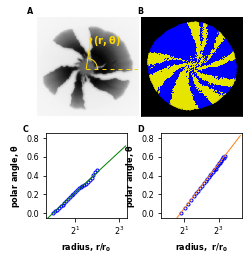

In [3]:

from matplotlib.patches import Ellipse, Arc

fs=8 #fontzize
sfs=4#small fontsize
lw=1#linewidth
ms=3#markersize

#Moran files:
#with shuffling : new_figures/PAPER FIGURES/logspiral_candidates/try5_binomial_shuffle/N6/g2.0/D0.00/ch0.8/1/ca.txt
#Without shuffling (wrong): /Users/ashish/Downloads/logspiral_candidates/try5_binomial_r0/N6/g2.0/D0.00/ch0.8/1/fig4.png        

##gdnoise parameters in the folder.
path ='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/logspiral and fits/'
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/fig1_logspiral_and_fits/'


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(3.42,3.42))

# fig= plt.figure(figsize=(3.42,3.42))
# gs1 =GridSpec(2, 2,width_ratios=[1, 1],height_ratios=[1, 1],wspace=0.0, hspace=0.0)
# ax=[]
# ax.append([])
# ax.append([])
# ax[0].append([])
# ax[0].append([])
# ax[1].append([])
# ax[1].append([])
# ax[0][0]=plt.subplot(gs1[0,0])
# ax[0][1]=plt.subplot(gs1[0,1])
# ax[1][0]=plt.subplot(gs1[1,0])
# ax[1][1]=plt.subplot(gs1[1,1])

pos1 = ax[0][0].get_position() # get the original position 
pad_remove=0.06
pos2 = [pos1.x0 - pad_remove, pos1.y0 ,  pos1.width+pad_remove , pos1.height+pad_remove ] 
ax[0][0].set_position(pos2)

pos1 = ax[0][1].get_position() # get the original position 
pad_remove=0.06
pos2 = [pos1.x0 - pad_remove, pos1.y0 ,  pos1.width+pad_remove , pos1.height+pad_remove ] 
ax[0][1].set_position(pos2)

pos1 = ax[1][0].get_position() # get the original position 
pad_remove=0.022
pos2 = [pos1.x0 - pad_remove, pos1.y0 ,  pos1.width-pad_remove , pos1.height ] 
ax[1][0].set_position(pos2)

pos1 = ax[1][1].get_position() # get the original position 
pad_remove=-0.022
pos2 = [pos1.x0 - pad_remove, pos1.y0,  pos1.width+pad_remove , pos1.height ] 
ax[1][1].set_position(pos2)


## for gdnoise :stochastic/c.txt
with open(path+'stochastic/ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(path+'stochastic/c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]  
c=np.array(c)  
cb=c-ca 

r=40
l= len(ca)
b=len(ca.T)
for i in range(0,b/2):
    if c[l/2,b/2+i]<.85:   #condition for the colony to have expanded
        lexp=i-10
        break

print lexp #length of expansion



img = np.zeros((l,b,3))
img[:,:,1]=0.9*cb[:,:]
img[:,:,0]=0.9*cb[:,:]
img[:,:,2]=ca[:,:]

ax[0][1].set_xticks([])
ax[0][1].set_yticks([])



img3 = ax[0][1].imshow(img,interpolation='none',aspect="auto")

original=mpimg.imread(path+'expfig/option.png')



ax[0][1].axis('tight')




img3 = ax[0][0].imshow(original, extent=[0.,0.9,0.,0.9],interpolation='none')

# ax[0][0].axis('off')
# ax[0][0].set_xticks([])
# ax[0][0].set_yticks([])
ax[0][0].axis('tight')
ax[0][0].axis('off')



## for an arrow to the point instead
#ax[0][0].annotate('',
#            xy=(0.48, 0.7),  # theta, radius
#            xytext=(0.44, 0.43),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white', shrink=0.05),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )

angle1=80
angle2=0
## for the arc for theta
ellipse = Arc([0.44,0.43],0.2,0.2,angle2,0,angle1,color='gold',edgecolor='black', linewidth=lw)
ax[0][0].add_patch(ellipse)

##for theta right next to arc
#ax[0][0].text(0.62, 0.5, '$\\theta$', fontsize=30, color='white',transform=ax[0][0].transAxes) 
#print l
#ax[0][0].annotate('',
#            xy=(l/2+l/4, l/2-l/4), # theta, radius
#            xytext=(l/2+40, l/2-40),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white')#, edgecolor='none'),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )

#ax[0][0].annotate('r',
#            xy=(0.5, 0.5),  # theta, radius
#            xytext=(0.5, 0.5),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white', shrink=0.05),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )            
#            
            
#ax[0][0].text((0.5, 0.5), 'r',
#        #horizontalalignment='left',
#        #verticalalignment='top',
#        transform=ax[0][0].transAxes)


# for line to r,theta
ax[0][0].plot((0.48, 0.44),(0.7, 0.43),'gold',linewidth=lw)  
# for the dot at the point
circle=plt.Circle((0.48,0.7),0.01,color='gold',linewidth=lw, fill=True)                                  
ax[0][0].add_patch(circle)                                                                 
# for r,theta at the point         
ax[0][0].text(0.5, 0.66, '$ \\mathbf{(r, \\theta)}$', fontsize=fs+2, color='gold',fontweight='bold')  

#for axes line          
ax[0][0].plot((0.44,0.9),(0.43,0.43),'gold',linestyle='--',linewidth=lw,dashes=(2., 2.)) 

## for axes arrow
# ax[0][0].annotate("",xy=(0.9,0.44), xytext=(0.43,0.44),arrowprops=dict(arrowstyle="->",color='yellow',linestyle='-'))
                                                                                                                               


ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][1].set_yticks([])
ax[1][1].set_xticks([])

## gdnoise fit 
with open(path+'/stochastic fit/wall.txt') as file:
    wall = [[float(digit) for digit in line.split()] for line in file]
    wall=np.array(wall[:len(wall)-8])     
lexp= len(wall) 
SS=6
lin=lexp/SS+2
lst=lexp-lin
x1=np.arange(lin,lst+lin)
xdata=x1.astype(float)/r
ydata=wall[lin:]
ydata = ydata.reshape((lst))
ydata=ydata+np.abs(np.min(ydata))
logx=np.log(xdata)
z=np.polyfit(logx, ydata, 1)
p=np.poly1d(z)
k=np.zeros(lst) 
for i in range(0, lst):
    k[i]=p(logx[i])
ax[1][1].set_xlim(0.8,20.5)
ax[1][1].set_ylim(-0.05,0.85)
ax[1][1].semilogx(xdata,ydata,'o',markeredgecolor='blue',markerfacecolor='none',linewidth=lw, basex=2,markevery=12,markersize=ms)
ax[1][1].semilogx([1,19],[p(np.log(1)),p(np.log(19))],linewidth=lw, basex=2)
#ax[1][1].semilogx([50,1000],[p(np.log(50)),p(np.log(1000))],linewidth=lw)
ax[1][1].set_xlabel('radius,  $\\mathbf{r/r_0}$',fontsize = fs,fontweight='bold')
ax[1][1].set_ylabel('polar angle, $\\mathbf{\\theta }$',fontsize = fs,fontweight='bold')
ax[1][1].tick_params(axis='both', which='major', labelsize=fs)

ax[1][1].set_yticks((0.0,0.2,0.4,0.6,0.8))



logx2=np.loadtxt(path+'exp_data/x2.txt')
x2=np.exp(logx2)
y2=np.loadtxt(path+'exp_data/y2.txt')

z3=np.polyfit(logx2, -1*y2, 1)
p3=np.poly1d(z3)

ax[1][0].semilogx(x2,-1*y2,'o',markeredgecolor='blue',markerfacecolor='none', basex=2,markersize=ms,markevery=2)    
ax[1][0].semilogx([0.5,10],[p3(np.log(0.5)),p3(np.log(10))],linewidth=lw,c='g', basex=2) 
ax[1][0].set_xlabel('radius, $\\mathbf{r/r_0}$',fontsize = fs,fontweight='bold')
ax[1][0].set_ylabel('polar angle, $\\mathbf{\\theta }$',fontsize = fs,fontweight='bold')
#ax[1][0].set_xticks(1,5)
ax[1][0].tick_params(axis='both', which='major', labelsize=fs)
ax[1][0].set_yticks((0.0,0.2,0.4,0.6,0.8))

ax[1][0].set_xlim(0.8,10.5)
ax[1][0].set_ylim(-0.05,0.85)

# plt.tight_layout(pad=0.2, w_pad=0.0, h_pad=0.)
ax[0][0].set_title('A',y=0.97,x=-0.06,fontsize = fs,weight='bold')
ax[0][1].set_title('B',y=0.97,x=0.0,fontsize = fs,weight='bold')
ax[1][0].set_title('C',y=0.95,x=-0.25,fontsize = fs,weight='bold')
ax[1][1].set_title('D',y=0.95,x=-0.25,fontsize = fs,weight='bold')

plt.savefig(destpath+'logspiral_and_fits_WF.pdf',bbox_inches='tight')
plt.savefig(destpath+'logspiral_and_fits_WF.png',bbox_inches='tight')
plt.savefig(destpath+'logspiral_and_fits_WF.eps',bbox_inches='tight')
plt.show()

#### Fig1 option 3 Logspirals, fits and model illustration ver1

In [9]:
from matplotlib.patches import Ellipse, Arc

fs=8/2.0 #fontzize
sfs=4/2.0#small fontsize
lw=1/2.0#linewidth
ms=3/2.0#markersize


path ='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/logspiral and fits/'
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/fig1_logspiral_and_fits/'

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(3.42,3.42/2))
with open(path+'stochastic/ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(path+'stochastic/c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c)  
cb=c-ca              
r=40
l= len(ca)
b=len(ca.T)
for i in range(0,b/2):
    if c[l/2,b/2+i]<.85:   #condition for the colony to have expanded
        lexp=i-10
        break

print lexp #length of expansion

wall=np.zeros(lexp)
wallx=np.zeros(lexp)
wally=np.zeros(lexp)


wall1x=np.zeros(lexp)
wall1y=np.zeros(lexp)

wall2x=np.zeros(lexp)
wall2y=np.zeros(lexp)

wall3x=np.zeros(lexp)
wall3y=np.zeros(lexp)
for idx in range(2,lexp):
    val=2.58+.4*math.log(float(idx))
    wallx[idx]= b/2+idx* math.cos(val)
    wally[idx]= l/2-idx* math.sin(val)
    
    val=1.52+.4*math.log(float(idx))
    wall1x[idx]= b/2+idx* math.cos(val)
    wall1y[idx]= l/2-idx* math.sin(val)
    
    #val=-.18+.18*math.log(float(idx))
    val=1.11+ .4*math.log(float(idx))
    wall2x[idx]= b/2+idx* math.cos(val)
    wall2y[idx]= l/2-idx* math.sin(val)
    
    val=1.91+.4*math.log(float(idx))
    wall3x[idx]= b/2+idx* math.cos(val)
    wall3y[idx]= l/2-idx* math.sin(val)
    

img = np.zeros((l,b,3))
img[:,:,1]=0.9*cb[:,:]
img[:,:,0]=0.9*cb[:,:]
img[:,:,2]=ca[:,:]

ax[0][1].set_xticks([])
ax[0][1].set_yticks([])

# to add initial colony circle
circle=plt.Circle((l/2,b/2),r,color='white',linewidth=lw, fill=False)
ax[0][1].add_patch(circle)
ax[0][1].annotate('initial\ncolony', xy=(l/2+1.2*r, b/2+r),ha ='left',fontsize=fs,color='w', fontweight='bold'
   )  
# to add boundaries of the walls
ax[0][1].plot(wallx[40:lexp],wally[40:lexp],'white',linestyle='--',linewidth=lw)
ax[0][1].plot(wall1x[40:lexp],wall1y[40:lexp],'white',linestyle='--',linewidth=lw)
ax[0][1].plot(wall2x[40:lexp],wall2y[40:lexp],'white',linestyle='--',linewidth=lw)
ax[0][1].plot(wall3x[40:lexp],wall3y[40:lexp],'white',linestyle='--',linewidth=lw)


ax[0][1].set_title('B',y=0.95,x=-0.20,fontsize = fs,weight='bold')
img3 = ax[0][1].imshow(img,interpolation='none')




original=mpimg.imread(path+'expfig/option.png')


#original = Image.open('')
ax[0][0].axis('off')
img3 = ax[0][0].imshow(original, extent=[0,0.9,0,0.9],interpolation='none')

ax[0][0].set_xticks([])
ax[0][0].set_yticks([])

ax[0][0].set_title('A',y=0.95,x=-0.20,fontsize = fs,weight='bold')


## for an arrow to the point instead
#ax[0][0].annotate('',
#            xy=(0.48, 0.7),  # theta, radius
#            xytext=(0.44, 0.43),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white', shrink=0.05),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )
angle1=80
angle2=0
## for the arc for theta
ellipse = Arc([0.44,0.43],0.2,0.2,angle2,0,angle1,color='white',edgecolor='black', linewidth=lw)
ax[0][0].add_patch(ellipse)

##for theta right next to arc
#ax[0][0].text(0.62, 0.5, '$\\theta$', fontsize=30, color='white',transform=ax[0][0].transAxes) 
#print l
#ax[0][0].annotate('',
#            xy=(l/2+l/4, l/2-l/4), # theta, radius
#            xytext=(l/2+40, l/2-40),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white')#, edgecolor='none'),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )


# for line to r,theta
ax[0][0].plot((0.48, 0.44),(0.7, 0.43),'white',linewidth=lw)   
#for axes line          
ax[0][0].plot((0.44,0.9),(0.43,0.43),'white',linestyle='--',linewidth=lw) 
# for r,theta at the point         
ax[0][0].text(0.5, 0.69, '$(r, \\theta)$', fontsize=fs, color='white')  
   
circle=plt.Circle((0.48,0.7),0.01,color='white',linewidth=lw, fill=True)                                  
ax[0][0].add_patch(circle)                                                                 
                                                                                                                               
#ax[0][0].annotate('r',
#            xy=(0.5, 0.5),  # theta, radius
#            xytext=(0.5, 0.5),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white', shrink=0.05),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )            
#            
            
#ax[0][0].text((0.5, 0.5), 'r',
#        #horizontalalignment='left',
#        #verticalalignment='top',
#        transform=ax[0][0].transAxes)

ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][1].set_yticks([])
ax[1][1].set_xticks([])

with open(path+'/stochastic fit/wall.txt') as file:
    wall = [[float(digit) for digit in line.split()] for line in file]
    wall=np.array(wall[:len(wall)-8])     
lexp= len(wall) 
SS=6
lin=lexp/SS+2
lst=lexp-lin
x1=np.arange(lin,lst+lin)
xdata=x1.astype(float)/r
ydata=wall[lin:]
ydata = ydata.reshape((lst))
ydata=ydata+np.abs(np.min(ydata))
logx=np.log(xdata)
z=np.polyfit(logx, ydata, 1)
p=np.poly1d(z)

k=np.zeros(lst) 
for i in range(0, lst):
    k[i]=p(logx[i])
ax[1][1].set_xlim(0.8,20.5)
ax[1][1].set_ylim(-0.05,np.max(ydata)+0.25)
ax[1][1].semilogx(xdata,ydata,'o',markeredgecolor='blue',markerfacecolor='none',linewidth=lw, basex=2,markevery=10,markersize=ms)
ax[1][1].semilogx([1,19],[p(np.log(1)),p(np.log(19))],linewidth=lw, basex=2)
#ax[1][1].semilogx([50,1000],[p(np.log(50)),p(np.log(1000))],linewidth=lw)
ax[1][1].set_xlabel('radius, $r/r_0$',fontsize = fs,fontweight='bold')
ax[1][1].set_ylabel('polar angle, $\\theta $',fontsize = fs,fontweight='bold')
ax[1][1].tick_params(axis='both', which='major', labelsize=fs)
ax[1][1].set_title('D',y=0.95,x=-0.20,fontsize = fs,weight='bold')
ax[1][1].set_yticks((0.0,0.2,0.4,0.6,0.8))
#FOR NOISEFIT!
#ax[1][1].set_xlim(2**6,2**10)
#ax[1][1].set_ylim(-0.05,np.max(ydata)+0.2)



logx2=np.loadtxt(path+'exp_data/x2.txt')
x2=np.exp(logx2)
y2=np.loadtxt(path+'exp_data/y2.txt')


z3=np.polyfit(logx2, -1*y2, 1)
p3=np.poly1d(z3)

ax[1][0].semilogx(x2,-1*y2,'o',markeredgecolor='blue',markerfacecolor='none', basex=2,markersize=ms)    
ax[1][0].semilogx([0.5,10],[p3(np.log(0.5)),p3(np.log(10))],linewidth=lw,c='g', basex=2) 
ax[1][0].set_xlabel('radius, $r/r_0$',fontsize = fs,fontweight='bold')
ax[1][0].set_ylabel('polar angle, $\\theta $',fontsize = fs,fontweight='bold')
#ax[1][0].set_xticks(1,5)
ax[1][0].tick_params(axis='both', which='major', labelsize=fs)
ax[1][0].set_yticks((0.0,0.2,0.4,0.6,0.8))
ax[1][0].set_title('C',y=0.95,x=-0.20,fontsize = fs,weight='bold')
ax[1][0].set_xlim(0.8,10.5)
ax[1][0].set_ylim(-0.05,np.max(ydata)+0.2)







ax[1][2].set_xticks([])
ax[1][2].set_yticks([])
ax[0][2].set_yticks([])
ax[0][2].set_xticks([])

ax[1][3].set_xticks([])
ax[1][3].set_yticks([])
ax[0][3].set_yticks([])
ax[0][3].set_xticks([])



original=mpimg.imread(path+'/discrete model illustration/discrete model_4 rotations/Slide1.tiff')
ax[0][2].axis('off')
img3 = ax[0][2].imshow(original, extent=[0,0.5,0,0.5],interpolation='none',clip_on=False)

original=mpimg.imread(path+'/discrete model illustration/discrete model_4 rotations/Slide3.tiff')
ax[0][3].axis('off')
img3 = ax[0][3].imshow(original, extent=[0,0.5,0,0.5],interpolation='none',clip_on=False)

original=mpimg.imread(path+'/discrete model illustration/discrete model_4 rotations/Slide3.tiff')
ax[1][2].axis('off')
img3 = ax[1][2].imshow(original, extent=[0,0.5,0,0.5],interpolation='none',clip_on=False)

original=mpimg.imread(path+'/discrete model illustration/discrete model_4 rotations/Slide4.tiff')
ax[1][3].axis('off')
img3 = ax[1][3].imshow(original, extent=[0,0.5,0,0.5],interpolation='none',clip_on=False)


plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=0.1)
plt.savefig(destpath+'opt3.pdf')
plt.savefig(destpath+'opt3.png')

297


# Fig 1 option 4

0.416666666667
('height of figure ', 4.666666666666667)
297

/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/gridspec.py:302: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


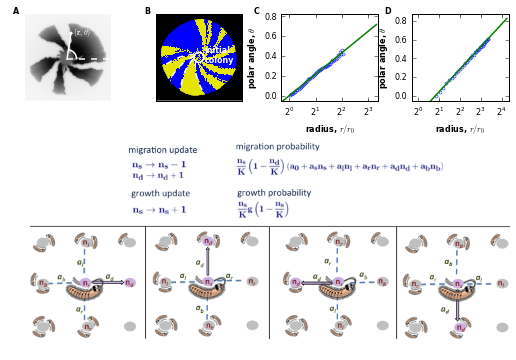

In [4]:
from matplotlib.patches import Ellipse, Arc

fs=8 #fontzize
sfs=4#small fontsize
lw=1.5#linewidth
ms=3#markersize



path ='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/logspiral and fits/'
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/fig1_logspiral_and_fits/'


# original=mpimg.imread(path+'/discrete model illustration/discrete model_4 rotations/Slide1.tiff')
full_model_img=mpimg.imread(path+'/discrete model illustration/model_full/Slide1.tiff')

l_dfig=np.shape(full_model_img)[0]
b_dfig=np.shape(full_model_img)[1]
# ratio_dfig=1.0*b_dfig/l_dfig
ratio_dfig=1.0*l_dfig/b_dfig
# ratio_dfig=1.25
print (ratio_dfig)
# print (np.shape(original))

fig = plt.figure(figsize=(7,1.75+7*ratio_dfig))

print ("height of figure ", 1.75+7*ratio_dfig)
# gs1 =GridSpec(4, 2 ,width_ratios=[1, 1], height_ratios=[1,1,ratio_dfig,ratio_dfig])
# gs2 =GridSpec(4, 2,width_ratios=[1, 1],height_ratios=[1,1,ratio_dfig,ratio_dfig])
# ax=np.empty(shape=(4, 2, 0)).tolist()
# for i in range(4):
#     for j in range(2):
#          ax[i][j]=plt.subplot(gs1[i,j]) 

gs1=GridSpec(1,4)
gs2=GridSpec(1,4)


# gs2.tight_layout(fig,pad=0.4)
# gs1.tight_layout(fig,pad=0.01)
top1=1.0
top2=1-0.25/(0.25+ratio_dfig)-0.0 #offset a little
bottom1=1-0.25/(0.25+ratio_dfig)-0.0
bottom2=0.0
gs1.update(top=1.0,bottom=bottom1,wspace=0.1,hspace=0.05)
gs2.update(top=top2, bottom=0.0,wspace=0.1,hspace=0.05)


# gs1.tight_layout(fig,pad=0.01)
ax=np.empty(shape=(2, 4, 0)).tolist()
for i in range(2):
    for j in range(4):
        if i<1:
            ax[i][j]=plt.subplot(gs1[i,j])  
        if i>=1:
            ax[i][j]=plt.subplot(gs2[i-1,j]) 
            ax[i][j].axis('off')           
            


with open(path+'stochastic/ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(path+'stochastic/c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c)  
cb=c-ca              
r=40
l= len(ca)
b=len(ca.T)
for i in range(0,b/2):
    if c[l/2,b/2+i]<.85:   #condition for the colony to have expanded
        lexp=i-10
        break

print lexp #length of expansion

wall=np.zeros(lexp)
wallx=np.zeros(lexp)
wally=np.zeros(lexp)


wall1x=np.zeros(lexp)
wall1y=np.zeros(lexp)

wall2x=np.zeros(lexp)
wall2y=np.zeros(lexp)

wall3x=np.zeros(lexp)
wall3y=np.zeros(lexp)
for idx in range(2,lexp):
    val=2.58+.4*math.log(float(idx))
    wallx[idx]= b/2+idx* math.cos(val)
    wally[idx]= l/2-idx* math.sin(val)
    
    val=1.52+.4*math.log(float(idx))
    wall1x[idx]= b/2+idx* math.cos(val)
    wall1y[idx]= l/2-idx* math.sin(val)
    
    #val=-.18+.18*math.log(float(idx))
    val=1.11+ .4*math.log(float(idx))
    wall2x[idx]= b/2+idx* math.cos(val)
    wall2y[idx]= l/2-idx* math.sin(val)
    
    val=1.91+.4*math.log(float(idx))
    wall3x[idx]= b/2+idx* math.cos(val)
    wall3y[idx]= l/2-idx* math.sin(val)
    

img = np.zeros((l,b,3))
img[:,:,1]=0.9*cb[:,:]
img[:,:,0]=0.9*cb[:,:]
img[:,:,2]=ca[:,:]

ax[0][1].set_xticks([])
ax[0][1].set_yticks([])

# to add initial colony circle
circle=plt.Circle((l/2,b/2),r,color='white',linewidth=lw, fill=False)
ax[0][1].add_patch(circle)
ax[0][1].annotate('initial\ncolony', xy=(l/2+1.2*r, b/2+r),ha ='left',fontsize=fs,color='white', fontweight='bold'
   )  
# to add boundaries of the walls
ax[0][1].plot(wallx[40:lexp],wally[40:lexp],'white',linestyle='--',linewidth=lw)
ax[0][1].plot(wall1x[40:lexp],wall1y[40:lexp],'white',linestyle='--',linewidth=lw)
ax[0][1].plot(wall2x[40:lexp],wall2y[40:lexp],'white',linestyle='--',linewidth=lw)
ax[0][1].plot(wall3x[40:lexp],wall3y[40:lexp],'white',linestyle='--',linewidth=lw)


ax[0][1].set_title('B',y=0.95,x=-0.10,fontsize = fs,weight='bold')
img3 = ax[0][1].imshow(img,interpolation='none')




original=mpimg.imread(path+'expfig/option.png')


#original = Image.open('')
ax[0][0].axis('off')
img3 = ax[0][0].imshow(original, extent=[0,0.9,0,0.9],interpolation='none')

ax[0][0].set_xticks([])
ax[0][0].set_yticks([])

ax[0][0].set_title('A',y=0.95,x=-0.10,fontsize = fs,weight='bold')


## for an arrow to the point instead
#ax[0][0].annotate('',
#            xy=(0.48, 0.7),  # theta, radius
#            xytext=(0.44, 0.43),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white', shrink=0.05),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )
angle1=80
angle2=0
## for the arc for theta
ellipse = Arc([0.44,0.43],0.2,0.2,angle2,0,angle1,color='white',edgecolor='black', linewidth=lw)
ax[0][0].add_patch(ellipse)

##for theta right next to arc
#ax[0][0].text(0.62, 0.5, '$\\theta$', fontsize=30, color='white',transform=ax[0][0].transAxes) 
#print l
#ax[0][0].annotate('',
#            xy=(l/2+l/4, l/2-l/4), # theta, radius
#            xytext=(l/2+40, l/2-40),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white')#, edgecolor='none'),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )


# for line to r,theta
ax[0][0].plot((0.48, 0.44),(0.7, 0.43),'white',linewidth=lw)   
#for axes line          
ax[0][0].plot((0.44,0.9),(0.43,0.43),'white',linestyle='--',linewidth=lw) 
# for r,theta at the point         
ax[0][0].text(0.5, 0.69, '$\mathbf{(r, \\theta)}$', fontsize=fs, color='white',fontweight='bold')  
   
circle=plt.Circle((0.48,0.7),0.01,color='white',linewidth=lw, fill=True)                                  
ax[0][0].add_patch(circle)                                                                 
                                                                                                                               
#ax[0][0].annotate('r',
#            xy=(0.5, 0.5),  # theta, radius
#            xytext=(0.5, 0.5),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white', shrink=0.05),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )            
#            
            
#ax[0][0].text((0.5, 0.5), 'r',
#        #horizontalalignment='left',
#        #verticalalignment='top',
#        transform=ax[0][0].transAxes)

ax[0][2].set_xticks([])
ax[0][2].set_yticks([])
ax[0][3].set_yticks([])
ax[0][3].set_xticks([])

with open(path+'/stochastic fit/wall.txt') as file:
    wall = [[float(digit) for digit in line.split()] for line in file]
    wall=np.array(wall[:len(wall)-8])     
lexp= len(wall) 
SS=6
lin=lexp/SS+2
lst=lexp-lin
x1=np.arange(lin,lst+lin)
xdata=x1.astype(float)/r
ydata=wall[lin:]
ydata = ydata.reshape((lst))
ydata=ydata+np.abs(np.min(ydata))
logx=np.log(xdata)
z=np.polyfit(logx, ydata, 1)
p=np.poly1d(z)

k=np.zeros(lst) 
for i in range(0, lst):
    k[i]=p(logx[i])
ax[0][3].set_xlim(0.8,20.5)
ax[0][3].set_ylim(-0.05,np.max(ydata)+0.25)
ax[0][3].semilogx(xdata,ydata,'o',markeredgecolor='blue',markerfacecolor='none',linewidth=lw, basex=2,markevery=10,markersize=ms)
ax[0][3].semilogx([1,19],[p(np.log(1)),p(np.log(19))],linewidth=lw, basex=2)
#ax[0][3].semilogx([50,1000],[p(np.log(50)),p(np.log(1000))],linewidth=lw)
ax[0][3].set_xlabel('radius, $r/r_0$',fontsize = fs,fontweight='bold')
ax[0][3].set_ylabel('polar angle, $\\theta $',fontsize = fs,fontweight='bold')
ax[0][3].tick_params(axis='both', which='major', labelsize=fs)
ax[0][3].set_title('D',y=0.95,x=-0.25,fontsize = fs,weight='bold')
ax[0][3].set_yticks((0.0,0.2,0.4,0.6,0.8))
#FOR NOISEFIT!
#ax[0][3].set_xlim(2**6,2**10)
#ax[0][3].set_ylim(-0.05,np.max(ydata)+0.2)



logx2=np.loadtxt(path+'exp_data/x2.txt')
x2=np.exp(logx2)
y2=np.loadtxt(path+'exp_data/y2.txt')


z3=np.polyfit(logx2, -1*y2, 1)
p3=np.poly1d(z3)

ax[0][2].semilogx(x2,-1*y2,'o',markeredgecolor='blue',markerfacecolor='none', basex=2,markersize=ms)    
ax[0][2].semilogx([0.5,10],[p3(np.log(0.5)),p3(np.log(10))],linewidth=lw,c='g', basex=2) 
ax[0][2].set_xlabel('radius, $r/r_0$',fontsize = fs,fontweight='bold')
ax[0][2].set_ylabel('polar angle, $\\theta $',fontsize = fs,fontweight='bold')
#ax[0][2].set_xticks(1,5)
ax[0][2].tick_params(axis='both', which='major', labelsize=fs)
ax[0][2].set_yticks((0.0,0.2,0.4,0.6,0.8))
ax[0][2].set_title('C',y=0.95,x=-0.25,fontsize = fs,weight='bold')
ax[0][2].set_xlim(0.8,10.5)
ax[0][2].set_ylim(-0.05,np.max(ydata)+0.2)







# ax[2][0].set_xticks([])
# ax[2][0].set_yticks([])
# ax[2][1].set_yticks([])
# ax[2][1].set_xticks([])

# ax[3][0].set_xticks([])
# ax[3][0].set_yticks([])
# ax[3][1].set_yticks([])
# ax[3][1].set_xticks([])


# original=mpimg.imread(path+'/discrete model illustration/discrete model_4 rotations/Slide1.tiff')
# ax[2][0].axis('off')
# img3 = ax[2][0].imshow(original, extent=[0,0.5,0,0.5],interpolation='none',clip_on=False)

# original=mpimg.imread(path+'/discrete model illustration/discrete model_4 rotations/Slide3.tiff')
# ax[3][0].axis('off')
# img3 = ax[3][0].imshow(original, extent=[0,0.5,0,0.5],interpolation='none',clip_on=False)

# original=mpimg.imread(path+'/discrete model illustration/discrete model_4 rotations/Slide3.tiff')
# ax[2][1].axis('off')
# img3 = ax[2][1].imshow(original, extent=[0,0.5,0,0.5],interpolation='none',clip_on=False)

# original=mpimg.imread(path+'/discrete model illustration/discrete model_4 rotations/Slide4.tiff')
# ax[3][1].axis('off')
# img3 = ax[3][1].imshow(original, extent=[0,0.5,0,0.5],interpolation='none',clip_on=False)


imgbot=plt.subplot(gs2[0,:])         
imgbot.axis('off')     
imgbot.imshow(full_model_img)



gs2.tight_layout(fig,rect=[0, bottom2, 1, top2],pad=0.1,w_pad=0.0,h_pad=-0.05)
gs1.tight_layout(fig,rect=[0, bottom1, 1, top1],pad=0.1,w_pad=0.0,h_pad=-0.05)
# plt.tight_layout(pad=0.01)
plt.savefig(destpath+'opt4.pdf')
plt.savefig(destpath+'opt4.png')
plt.show()

# Fig 1 option 4 top line

297


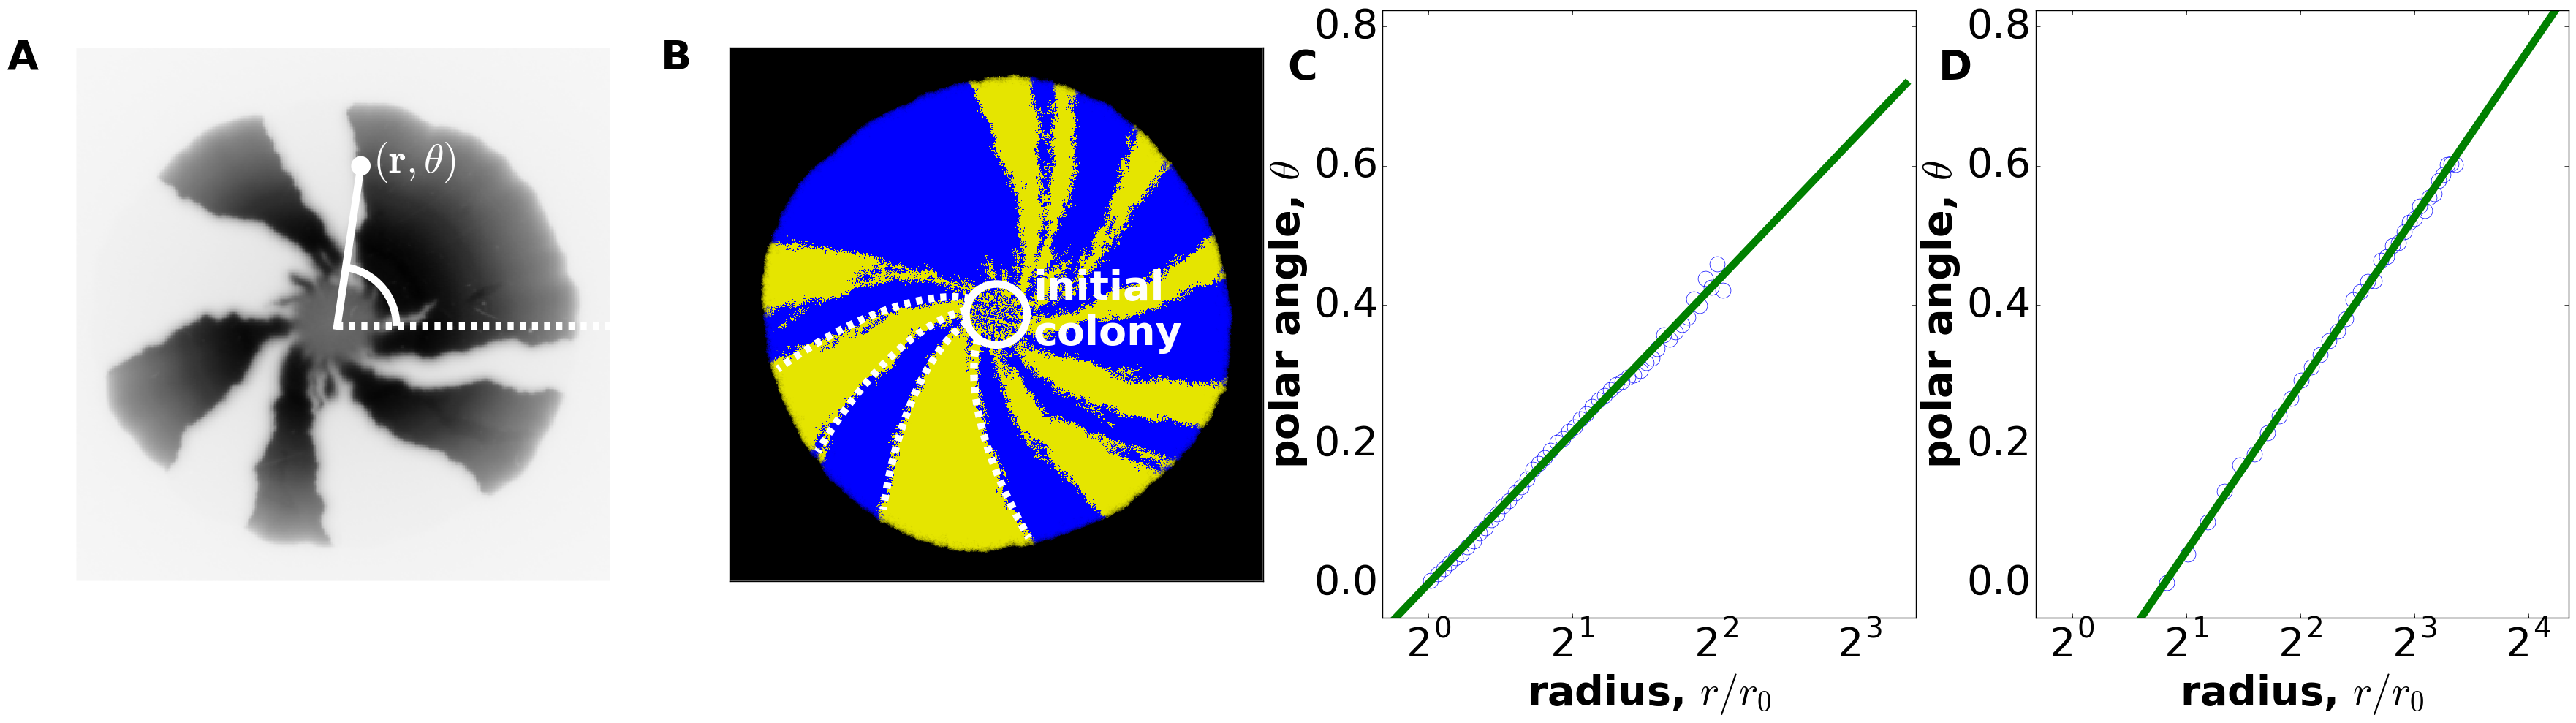

In [13]:
from matplotlib.patches import Ellipse, Arc

fs=8*5 #fontzize
sfs=4*5#small fontsize
lw=1.5*5#linewidth
ms=3*5#markersize



path ='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/logspiral and fits/'
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/fig1_logspiral_and_fits/'




fig = plt.figure(figsize=(7*5,1.95*5))




gs1=GridSpec(1,4)
gs2=GridSpec(1,4)


gs1.update(top=1.0,bottom=0.0,wspace=0.1,hspace=0.1)



# gs1.tight_layout(fig,pad=0.01)
ax=np.empty(shape=(1, 4, 0)).tolist()
for i in range(1):
    for j in range(4):
        if i<1:
            ax[i][j]=plt.subplot(gs1[i,j])  
#         if i>=1:
#             ax[i][j]=plt.subplot(gs2[i-1,j]) 
#             ax[i][j].axis('off')           
            


with open(path+'stochastic/ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(path+'stochastic/c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c)  
cb=c-ca              
r=40
l= len(ca)
b=len(ca.T)
for i in range(0,b/2):
    if c[l/2,b/2+i]<.85:   #condition for the colony to have expanded
        lexp=i-10
        break

print lexp #length of expansion

wall=np.zeros(lexp)
wallx=np.zeros(lexp)
wally=np.zeros(lexp)


wall1x=np.zeros(lexp)
wall1y=np.zeros(lexp)

wall2x=np.zeros(lexp)
wall2y=np.zeros(lexp)

wall3x=np.zeros(lexp)
wall3y=np.zeros(lexp)
for idx in range(2,lexp):
    val=2.58+.4*math.log(float(idx))
    wallx[idx]= b/2+idx* math.cos(val)
    wally[idx]= l/2-idx* math.sin(val)
    
    val=1.52+.4*math.log(float(idx))
    wall1x[idx]= b/2+idx* math.cos(val)
    wall1y[idx]= l/2-idx* math.sin(val)
    
    #val=-.18+.18*math.log(float(idx))
    val=1.11+ .4*math.log(float(idx))
    wall2x[idx]= b/2+idx* math.cos(val)
    wall2y[idx]= l/2-idx* math.sin(val)
    
    val=1.91+.4*math.log(float(idx))
    wall3x[idx]= b/2+idx* math.cos(val)
    wall3y[idx]= l/2-idx* math.sin(val)
    

img = np.zeros((l,b,3))
img[:,:,1]=0.9*cb[:,:]
img[:,:,0]=0.9*cb[:,:]
img[:,:,2]=ca[:,:]

ax[0][1].set_xticks([])
ax[0][1].set_yticks([])

# to add initial colony circle
circle=plt.Circle((l/2,b/2),r,color='white',linewidth=lw, fill=False)
ax[0][1].add_patch(circle)
ax[0][1].annotate('initial\ncolony', xy=(l/2+1.2*r, b/2+r),ha ='left',fontsize=fs,color='white', fontweight='bold'
   )  
# to add boundaries of the walls
ax[0][1].plot(wallx[40:lexp],wally[40:lexp],'white',linestyle='--',linewidth=lw)
ax[0][1].plot(wall1x[40:lexp],wall1y[40:lexp],'white',linestyle='--',linewidth=lw)
ax[0][1].plot(wall2x[40:lexp],wall2y[40:lexp],'white',linestyle='--',linewidth=lw)
ax[0][1].plot(wall3x[40:lexp],wall3y[40:lexp],'white',linestyle='--',linewidth=lw)


ax[0][1].set_title('B',y=0.95,x=-0.10,fontsize = fs,weight='bold')
img3 = ax[0][1].imshow(img,interpolation='none')




original=mpimg.imread(path+'expfig/option.png')


#original = Image.open('')
ax[0][0].axis('off')
img3 = ax[0][0].imshow(original, extent=[0,0.9,0,0.9],interpolation='none')

ax[0][0].set_xticks([])
ax[0][0].set_yticks([])

ax[0][0].set_title('A',y=0.95,x=-0.10,fontsize = fs,weight='bold')


## for an arrow to the point instead
#ax[0][0].annotate('',
#            xy=(0.48, 0.7),  # theta, radius
#            xytext=(0.44, 0.43),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white', shrink=0.05),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )
angle1=80
angle2=0
## for the arc for theta
ellipse = Arc([0.44,0.43],0.2,0.2,angle2,0,angle1,color='white',edgecolor='black', linewidth=lw)
ax[0][0].add_patch(ellipse)

##for theta right next to arc
#ax[0][0].text(0.62, 0.5, '$\\theta$', fontsize=30, color='white',transform=ax[0][0].transAxes) 
#print l
#ax[0][0].annotate('',
#            xy=(l/2+l/4, l/2-l/4), # theta, radius
#            xytext=(l/2+40, l/2-40),    # fraction, fraction
#            #textcoords='figure fraction',
#            arrowprops=dict(facecolor='white')#, edgecolor='none'),
#            #horizontalalignment='left',
#            #verticalalignment='bottom',
#            )


# for line to r,theta
ax[0][0].plot((0.48, 0.44),(0.7, 0.43),'white',linewidth=lw)   
#for axes line          
ax[0][0].plot((0.44,0.9),(0.43,0.43),'white',linestyle='--',linewidth=lw) 
# for r,theta at the point         
ax[0][0].text(0.5, 0.69, '$\mathbf{(r, \\theta)}$', fontsize=fs, color='white',fontweight='bold')  
   
circle=plt.Circle((0.48,0.7),0.01,color='white',linewidth=lw, fill=True)                                  
ax[0][0].add_patch(circle)                                                                 
                                                                                                                               

ax[0][2].set_xticks([])
ax[0][2].set_yticks([])
ax[0][3].set_yticks([])
ax[0][3].set_xticks([])

with open(path+'/stochastic fit/wall.txt') as file:
    wall = [[float(digit) for digit in line.split()] for line in file]
    wall=np.array(wall[:len(wall)-8])     
lexp= len(wall) 
SS=6
lin=lexp/SS+2
lst=lexp-lin
x1=np.arange(lin,lst+lin)
xdata=x1.astype(float)/r
ydata=wall[lin:]
ydata = ydata.reshape((lst))
ydata=ydata+np.abs(np.min(ydata))
logx=np.log(xdata)
z=np.polyfit(logx, ydata, 1)
p=np.poly1d(z)

k=np.zeros(lst) 
for i in range(0, lst):
    k[i]=p(logx[i])
ax[0][3].set_xlim(0.8,20.5)
ax[0][3].set_ylim(-0.05,np.max(ydata)+0.2)
ax[0][3].semilogx(xdata,ydata,'o',markeredgecolor='blue',markerfacecolor='none',linewidth=lw, basex=2,markevery=10,markersize=ms)
ax[0][3].semilogx([1,19],[p(np.log(1)),p(np.log(19))],linewidth=lw, basex=2)
#ax[0][3].semilogx([50,1000],[p(np.log(50)),p(np.log(1000))],linewidth=lw)
ax[0][3].set_xlabel('radius, $r/r_0$',fontsize = fs,fontweight='bold')
ax[0][3].set_ylabel('polar angle, $\\theta $',fontsize = fs,fontweight='bold')
ax[0][3].tick_params(axis='both', which='major', labelsize=fs)
ax[0][3].set_title('D',y=0.88,x=-0.15,fontsize = fs,weight='bold')
ax[0][3].set_yticks((0.0,0.2,0.4,0.6,0.8))
#FOR NOISEFIT!
#ax[0][3].set_xlim(2**6,2**10)
#ax[0][3].set_ylim(-0.05,np.max(ydata)+0.2)



logx2=np.loadtxt(path+'exp_data/x2.txt')
x2=np.exp(logx2)
y2=np.loadtxt(path+'exp_data/y2.txt')


z3=np.polyfit(logx2, -1*y2, 1)
p3=np.poly1d(z3)

ax[0][2].semilogx(x2,-1*y2,'o',markeredgecolor='blue',markerfacecolor='none', basex=2,markersize=ms)    
ax[0][2].semilogx([0.5,10],[p3(np.log(0.5)),p3(np.log(10))],linewidth=lw,c='g', basex=2) 
ax[0][2].set_xlabel('radius, $r/r_0$',fontsize = fs,fontweight='bold')
ax[0][2].set_ylabel('polar angle, $\\theta $',fontsize = fs,fontweight='bold')
#ax[0][2].set_xticks(1,5)
ax[0][2].tick_params(axis='both', which='major', labelsize=fs)
ax[0][2].set_yticks((0.0,0.2,0.4,0.6,0.8))
ax[0][2].set_title('C',y=0.88,x=-0.15,fontsize = fs,weight='bold')
ax[0][2].set_xlim(0.8,10.5)
ax[0][2].set_ylim(-0.05,np.max(ydata)+0.2)

# gs2.tight_layout(fig,rect=[0, bottom2, 1, top2],pad=0.1,w_pad=0.0,h_pad=-0.05)
gs1.tight_layout(fig,rect=[0, 0, 1, 1],pad=0.2,w_pad=0.1,h_pad=-0.05)
# plt.tight_layout(pad=0.01)
plt.savefig(destpath+'opt4_top.pdf')
plt.savefig(destpath+'opt4_top.png')
plt.show()

## Fig2 Chiral Strain invades moran

/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:46: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:61: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:94: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:95: VisibleDeprecationWarnin

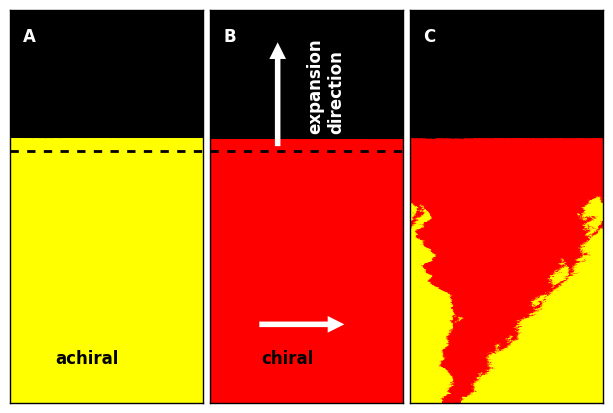

In [5]:

path ='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/chiral strain takes over/moran/'
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/chiral_strain_invades/moran/'

##taking over figure with  shuffle from /Volumes/Ashish_backup/research data/to be backed up/new_figures/PAPER FIGURES/ch0_invasion_fig/moran/try4_eqtimes_longish_shuffle/alpha/h0.1/ch0.1/2/ca.txt
## taking over figure wihtout shuffle, (WRONG) c2 from from #from ch0_invasion_fig/moran/try4_eqtimes_long/alpha/h0.1/ch0.9/2/ca2.txt
## equal velcoities are from different run with different b actaully!! ch0_invasion_fig/moran/try4_eqtimes_longish/alpha/h1.0/ch0.9/1/ca3.txt
fs=12 #fontzize
sfs=12#small fontsize
lw=2#linewidth
ms=3#markersize

mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
# mpl.rcParams['axes.textweight'] = "bold"
mpl.rcParams['axes.labelsize'] = fs

fold = path


fig, ax = plt.subplots(1, 3, figsize=(6,4))

fold = path
with open(fold+'takes over/ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(fold+'takes over/c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c) 
l= len(ca)
b=len(ca.T)

ratio_exp=1.2 ## this is how much black space we add to the equal velocity runs
b_prime=round(b*ratio_exp) ## so that the black spaces occupy the same amount of space




ca=np.roll(ca,l/6,axis=0)
c=np.roll(c, l/6,axis=0)
cb=c-ca

ca,cb=swap_arrays(ca,cb)
# b_prime=0.5*b ## removing some black space!
cbtemp=np.zeros((l,b_prime))
catemp=np.zeros((l,b_prime))

# for bprime >b
catemp[:,:b]=cb
cbtemp[:,:b]=ca
b=b_prime

# for bprime less than b
# b=b_prime
# catemp=cb[:,:b]
# cbtemp=ca[:,:b]

ca=deepcopy(catemp)
cb=deepcopy(cbtemp)
img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(cb[:,:]+ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].imshow(img,aspect='auto',interpolation='none')
ax[2].set_title('C',y=0.9,x=0.1,color='w',fontsize = fs, fontweight='bold')




    









with open(fold+'nonchiral/ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(fold+'nonchiral/c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c) 
l= len(ca)
b=len(ca.T)
cb=c-ca
ca,cb=swap_arrays(ca,cb)


cbtemp=np.zeros((l,b_prime))
catemp=np.zeros((l,b_prime))

# for bprime >b
catemp[:,:b]=cb
cbtemp[:,:b]=ca
b=b_prime

# for bprime less than b
# b=b_prime
# catemp=cb[:,:b]
# cbtemp=ca[:,:b]

img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(cbtemp[:,:]+catemp[:,:])
img[:,:,1]=np.rot90(cbtemp[:,:])
ax[0].imshow(img, aspect='auto',interpolation='none')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].text(0.4, 0.1,'achiral' ,transform=ax[0].transAxes,color='black',fontweight='bold',ha='center')

ax[0].set_title('A',y=0.9,x=0.1,color='w',fontsize = fs, fontweight='bold')


with open(fold+'chiral/ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(fold+'chiral/c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c) 
l= len(ca)
b=len(ca.T)
cb=c-ca
ca,cb=swap_arrays(ca,cb)
# b_prime=b*ratio_exp ## so that the black spaces occupy the same amount of space
cbtemp=np.zeros((l,b_prime))
catemp=np.zeros((l,b_prime))

# for bprime >b
catemp[:,:b]=cb
cbtemp[:,:b]=ca
b=b_prime

# for bprime less than b
# b=b_prime
# catemp=cb[:,:b]
# cbtemp=ca[:,:b]

ax[1].set_xticks([])
ax[1].set_yticks([])

img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(cbtemp[:,:]+catemp[:,:])
img[:,:,1]=np.rot90(cbtemp[:,:])
ax[1].imshow(img, aspect='auto',interpolation='none')
ax[1].set_xticks([])
ax[1].set_yticks([])

## increasing y coord for horizontal line makes it move downward! 
##so making it small will make it disppear in the blakc empty sapce
ax[0].axhline(y=b*0.36,xmin=0,xmax=2,color='black',linestyle='--',linewidth=lw,clip_on=False)
ax[1].axhline(y=b*0.36,xmin=0,xmax=1,color='black',linestyle='--',linewidth=lw,clip_on=False)

ax[1].annotate('', xy=(0.35, 0.95), xytext=(0.35, 0.62),xycoords='axes fraction',
            arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.1))
ax[1].annotate('', xy=(0.75, 0.2), xytext=(0.2, 0.2),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.1))
ax[1].text(0.4, 0.1,'chiral' ,transform=ax[1].transAxes,color='black',fontweight='bold',ha='center')

ax[1].text(0.5, 0.84,'expansion\ndirection' ,transform=ax[1].transAxes,color='white',fontweight='bold',rotation='vertical',ha='left')
# ax[1].arrow(0.5, 0, 0.5, 0.5, head_width=0.05, head_length=0.1,color='white',)
plt.tight_layout(pad=0.2, w_pad=0.4, h_pad=0.2)

ax[1].set_title('B',y=0.9,x=0.1,color='w',fontsize = fs, fontweight='bold')
  
if not os.path.exists(destpath ): os.makedirs(destpath)
# plt.savefig(destpath+'chiralstrain_invades.eps')
plt.savefig(destpath+'chiralstrain_invades.pdf')
plt.show()


### Fig2 Chiral Strain invades gdnoise equally spaced A,B,C boxes

In [3]:
path ='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/chiral strain takes over/gdnoise/'
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/chiral_strain_invades/gdnoise/'
fs=8 #fontzize
sfs=8#small fontsize
lw=1#linewidth
ms=3#markersize

mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
# mpl.rcParams['axes.textweight'] = "bold"
mpl.rcParams['axes.labelsize'] = fs

fold = path

##Cluster address
##projectnb/qedksk/ashishge/data/new_sim/fig_notwmsmall_gdnoise/ch0/try_paperfig/h0.10/ch0.05/N200/1

## for full invasion
# with open(fold+'ca.txt') as file:
#     ca = [[float(digit) for digit in line.split()] for line in file]
# ca=np.array(ca)
# with open(fold+'c.txt') as file:       
#     c = [[float(digit) for digit in line.split()] for line in file]
# c=np.array(c) 

# l= len(ca)
# b=len(ca.T)
# ca=np.roll(ca,-l/3,axis=0)
# c=np.roll(c, -l/3,axis=0)

# cb=c-ca

# fold = destpath  
# if not os.path.exists(fold): os.makedirs(fold)


# fig3, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
# img = np.zeros((l,b,3))
# img[:,:,0]=cb[:,:]+ca[:,:]
# img[:,:,1]=cb[:,:]           
# ax[0][0].set_xticks([])
# ax[0][0].set_yticks([])
# img3 = ax[0][0].imshow(img)
# plt.tight_layout()
# plt.savefig(fold+'chiralstrain_invades.eps') 


## partial invasion
fold = path
with open(fold+'ca2.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(fold+'c2.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c) 
l= len(ca)
b=len(ca.T)
ca=np.roll(ca,-l/3,axis=0)
c=np.roll(c, -l/3,axis=0)
cb=c-ca

fold = destpath   
if not os.path.exists(fold): os.makedirs(fold)
    
# fig3, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
# img = np.zeros((l,b,3))
# img[:,:,0]=cb[:,:]+ca[:,:]
# img[:,:,1]=cb[:,:]         
# ax[0][0].set_xticks([])
# ax[0][0].set_yticks([])
# img3 = ax[0][0].imshow(img)
# plt.tight_layout()
# plt.savefig(fold+'chiralstrain_invades2.eps')  


for i in range(0,b):
    if np.sum(c[:,i])<l*0.8:   #condition for the colony to have expanded
        lexp=i-10
        break

ratio_exp=lexp*1.0/b




fig, ax = plt.subplots(1, 3, figsize=(3.42,3))
img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(cb[:,:]+ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].imshow(img,aspect='auto',interpolation='none')
ax[2].set_title('B',y=0.9,x=0.15,color='w',fontsize = fs, fontweight='bold')

fold = '/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/chiral strain takes over/gdnoise/achiral/'
with open(fold+'ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(fold+'c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c) 
l= len(ca)
b=len(ca.T)

cb=c-ca
b_prime=b/ratio_exp ## so that the black spaces occupy the same amount of space
cbtemp=np.zeros((l,b_prime))
catemp=np.zeros((l,b_prime))
catemp[:,:b]=cb
cbtemp[:,:b]=ca




b=b_prime
img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(cbtemp[:,:]+catemp[:,:])
img[:,:,1]=np.rot90(cbtemp[:,:])
ax[0].imshow(img, aspect='auto',interpolation='none')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].text(0.4, 0.1,'achiral' ,transform=ax[0].transAxes,color='black',fontweight='bold',ha='center')

ax[0].set_title('A',y=0.9,x=0.1,color='w',fontsize = fs, fontweight='bold')


fold = '/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/chiral strain takes over/gdnoise/chiral/'
with open(fold+'ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(fold+'c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c) 
l= len(ca)
b=len(ca.T)

cb=c-ca
b_prime=b/ratio_exp ## so that the black spaces occupy the same amount of space
cbtemp=np.zeros((l,b_prime))
catemp=np.zeros((l,b_prime))
catemp[:,:b]=ca
cbtemp[:,:b]=cb

ax[1].set_xticks([])
ax[1].set_yticks([])


b=b_prime
img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(cbtemp[:,:]+catemp[:,:])
img[:,:,1]=np.rot90(cbtemp[:,:])
ax[1].imshow(img, aspect='auto',interpolation='none')
ax[1].set_xticks([])
ax[1].set_yticks([])

# ax[0].axhline(y=lexp*0.82,xmin=0,xmax=2,color='black',linestyle='--',linewidth=lw,clip_on=False)
# ax[1].axhline(y=lexp*0.82,xmin=0,xmax=1,color='black',linestyle='--',linewidth=lw,clip_on=False)

ax[1].annotate('', xy=(0.35, 0.9), xytext=(0.35, 0.58),xycoords='axes fraction',
            arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.1))
ax[1].annotate('', xy=(0.75, 0.2), xytext=(0.2, 0.2),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.1))
ax[1].text(0.4, 0.1,'chiral' ,transform=ax[1].transAxes,color='black',fontweight='bold',ha='center')

ax[1].text(0.5, 0.82,'expansion\ndirection' ,transform=ax[1].transAxes,color='white',fontweight='bold',rotation='vertical',ha='left')
# ax[1].arrow(0.5, 0, 0.5, 0.5, head_width=0.05, head_length=0.1,color='white',)
plt.tight_layout(pad=0.2, w_pad=0.4, h_pad=0.2)

# plt.savefig(destpath+'chiralstrain_invades.eps')
plt.savefig(destpath+'chiralstrain_invades_equalboxes.pdf')
plt.show()

IOError: [Errno 2] No such file or directory: '/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/chiral strain takes over/gdnoise/ca2.txt'

## Fig2 Chiral Strain invades gdnoise C bigger than A and B


/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/chiral strain takes over/gdnoise/


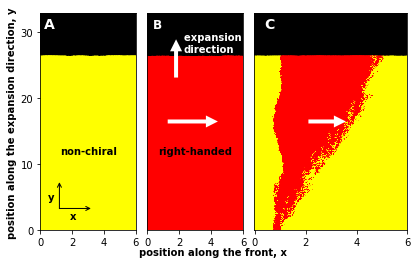

In [8]:
import matplotlib.patheffects as PathEffects
print 
path ='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/chiral strain takes over/gdnoise/'
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/chiral_strain_invades/gdnoise/'
fs=14 #fontzize
sfs=10#small fontsize
lw=1#linewidth
ms=3#markersize

mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
# mpl.rcParams['axes.textweight'] = "bold"
mpl.rcParams['axes.labelsize'] = fs

fold = path

##Cluster address ##
##/projectnb/qedksk/ashishge/data/new_sim/ch0_invasion_fig/gdnoise/try1_paper
## particular figure is /try1_paper_compressed/ch0.01/h0.05/1/fig_ca.png
##old option was at
##projectnb/qedksk/ashishge/data/new_sim/fig_notwmsmall_gdnoise/ch0/try_paperfig/h0.10/ch0.05/N200/1





## partial invasion is ca and c, for full invasion, ca_full_invasion.gz is saved. 
## same parameters and run time, just invaded fully and partially in different runs
fold = path
print fold
with open(fold+'ca.txt') as file:     
    ca = [[float(digit) for digit in line.split()] for line in file] 

ca=np.array(ca)
with open(fold+'c.txt') as file:    
    c = [[float(digit) for digit in line.split()] for line in file]      

c=np.array(c) 
l= len(ca)
b=len(ca.T)

ca=np.roll(ca,l/8,axis=0)
c=np.roll(c, l/8,axis=0)
cb=c-ca
fold = destpath   
if not os.path.exists(fold): os.makedirs(fold)   

for i in range(0,b):
    if np.sum(c[:,i])<l*0.8:   #condition for the colony to have expanded
        lexp=i-10
        break
ratio_exp=lexp*1.0/b


# fig, ax = plt.subplots(1 figsize=(5,5))
fig = plt.figure(figsize=(6,4))
gs1 =GridSpec(1, 3 ,width_ratios=[1, 1,1.6]) 
# the ratios are 1,1,1.6 because the last plot needs more space
gs2 =GridSpec(1,1)
gs3 =GridSpec(1,1)
# gs3 is a big plot of the entire figure to make common axes labels
ax2=plt.subplot(gs2[0,0])

gs1.update(left=0.1, right=0.95, wspace=0.1)
gs2.update(left=0.6, right=0.95, wspace=0.05)
ax=[]
ax.append([])
ax.append([])
ax.append([])
ax[0]=plt.subplot(gs1[0,0])
ax[1]=plt.subplot(gs1[0,1])
ax[2]=plt.subplot(gs1[0,2])
# ax[2]=plt.subplot(gs2[0,0])
# ax2_common_labels=plt.subplot(gs3[0,0])


# ax2_common_labels.spines['top'].set_color('none')
# ax2_common_labels.spines['bottom'].set_color('none')
# ax2_common_labels.spines['left'].set_color('none')
# ax2_common_labels.spines['right'].set_color('none')
# ax2_common_labels.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
# ax2_common_labels.set_xlabel("position along the front, x")



b_prime=int(b*1.1) ## extra blackspace added
cbtemp=np.zeros((l,b_prime))
catemp=np.zeros((l,b_prime))
catemp[:,:b]=ca
cbtemp[:,:b]=cb


img = np.zeros((b_prime,l,3))
img[:,:,0]=np.rot90(cbtemp[:,:]+catemp[:,:],)
img[:,:,1]=np.rot90(catemp[:,:])
ax[2].imshow(img,aspect='auto',interpolation='none')
ax[2].yaxis.tick_right()
# ax[2].set_xticks([])
# ax[2].set_yticks([])
## yticks


ax[2].set_title('C',y=0.9,x=0.1,color='w',fontsize = fs, fontweight='bold')

fold = '/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/chiral strain takes over/gdnoise/achiral/'
##/Users/ashish/Downloads/try1_paper_compressed/ch0.01/h0.0/1/c.gz

with open(fold+'ca.txt') as file:     ca = [[float(digit) for digit in line.split()] for line in file] 

ca=np.array(ca)
with open(fold+'c.txt') as file:     c = [[float(digit) for digit in line.split()] for line in file]      

c=np.array(c) 
l= len(ca)
b=len(ca.T)

cb=c-ca

cbtemp=np.zeros((l,b_prime))
catemp=np.zeros((l,b_prime))
catemp[:,:b]=ca
cbtemp[:,:b]=cb

# b=b_prime
img = np.zeros((b_prime,l,3))
img[:,:,0]=np.rot90(cbtemp[:,:]+catemp[:,:])
img[:,:,1]=np.rot90(catemp[:,:])
# img[:,:,0]=np.rot90(cb[:,:]+ca[:,:])
# img[:,:,1]=np.rot90(ca[:,:])
ax[0].imshow(img, aspect='auto',interpolation='none')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].text(0.5, 0.35,'non-chiral' ,transform=ax[0].transAxes,color='black',fontweight='bold',ha='center')
ax[0].annotate('', xy=(0.55, 0.1), xytext=(0.18, 0.1),xycoords='axes fraction',color='black',
            arrowprops=dict(arrowstyle="->",facecolor='black',edgecolor='black'))
ax[0].annotate('', xy=(0.2, 0.23), xytext=(0.2, 0.09),xycoords='axes fraction',color='black',
            arrowprops=dict(arrowstyle="->",facecolor='black',edgecolor='black'))
ax[0].text(0.31, 0.05,'x',transform=ax[0].transAxes,color='black',fontweight='bold',ha='left')#,rotation='vertical',)
ax[0].text(0.082, 0.14,'y',transform=ax[0].transAxes,color='black',fontweight='bold',ha='left')#,rotation='vertical',)


ax[0].set_title('A',y=0.9,x=0.1,color='w',fontsize = fs, fontweight='bold')


fold = '/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/chiral strain takes over/gdnoise/chiral/'

with open(fold+'ca.txt') as file:     
    ca = [[float(digit) for digit in line.split()] for line in file]

ca=np.array(ca)
with open(fold+'c.txt') as file:     
    c = [[float(digit) for digit in line.split()] for line in file]      

c=np.array(c) 
l= len(ca)
b=len(ca.T)

cb=c-ca

cbtemp=np.zeros((l,b_prime))
catemp=np.zeros((l,b_prime))
catemp[:,:b]=ca
cbtemp[:,:b]=cb
b=b_prime




img = np.zeros((b_prime,l,3))
img[:,:,0]=np.rot90(cbtemp[:,:]+catemp[:,:])
img[:,:,1]=np.rot90(catemp[:,:])
ax[1].imshow(img, aspect='auto',interpolation='none')
ax[1].set_xticks([])
ax[1].set_yticks([])

# ax[0].axhline(y=lexp*0.82,xmin=0,xmax=2,color='black',linestyle='--',linewidth=lw,clip_on=False)
# ax[1].axhline(y=lexp*0.82,xmin=0,xmax=1,color='black',linestyle='--',linewidth=lw,clip_on=False)


ax[1].annotate('', xy=(0.85, 0.5), xytext=(0.1, 0.5),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.15))
ax[1].text(0.5, 0.35,'right-handed' ,transform=ax[1].transAxes,color='black',fontweight='bold',ha='center')

### paper
ax[1].annotate('', xy=(0.3, 0.9), xytext=(0.3, 0.68),xycoords='axes fraction',
            arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.1))
ax[1].text(0.38, 0.82,'expansion \ndirection',transform=ax[1].transAxes,color='white',fontweight='bold',ha='left')#,rotation='vertical',)

### poster
# ax[1].text(0.28, 0.74,'expansion \ndirection',transform=ax[1].transAxes,color='white',fontweight='bold',ha='left')#,rotation='vertical',)
# ax[1].annotate('', xy=(0.24, 0.93), xytext=(0.24, 0.68),xycoords='axes fraction',
#             arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.1))


ax[1].set_title('B',y=0.9,x=0.1,color='w', fontweight='bold')
# ax[1].arrow(0.5, 0, 0.5, 0.5, head_width=0.05, head_length=0.1,color='white',)
# plt.tight_layout(pad=0.2, w_pad=0.4, h_pad=0.2)

# plt.savefig(destpath+'chiralstrain_invades.eps')
#plt.tight_layout()

ax[2].annotate('', xy=(0.65, 0.5), xytext=(0.3, 0.5),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.15))




ax[2].set_yticks([])
ax[2].set_yticklabels([])

ticks=[b_prime-1,b_prime-1001,b_prime-2001,b_prime-3001]
labels=[0, 1000,2000,3000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels)
## xticks
ticks=[0,200,400,600]
labels=[0,200,400,600]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[2].set_xticks(ticks)
ax[2].set_xticklabels(labels)
ticks=[0,200,400,600]
labels=[0,200,400,600] ## only 0 and 300 marked to prevent labels of two plots overlapping
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)


#### poster:
# fig.text(0.5, 0.02,'position along the front, x', ha='center', va='center',fontweight="bold")
# fig.text(0.035, 0.5, 'position along the expansion, y', ha='center', va='center',fontweight="bold", rotation='vertical')
# plt.savefig(destpath+'chiralstrain_invades_poster.pdf')


##paper
fig.text(0.5, 0.05,'position along the front, x', ha='center', va='center',fontweight="bold")
fig.text(0.035, 0.5, 'position along the expansion direction, y', ha='center', va='center',fontweight="bold", rotation='vertical')
plt.savefig(destpath+'chiralstrain_invades.pdf')
# eps too big plt.savefig(destpath+'chiralstrain_invades.eps')

plt.savefig(destpath+'chiralstrain_invades.tif')


plt.show()


# for making the ftime average array for oppchirality moran, the code is:

In [20]:
## after running new_fstar_avg_cluster_conditional.py found in the folder fstar on the cluster
path='/Users/ashish/Downloads/moran_avg/try1/alpha/'
##from  oppch_coexistence_avg/moran_avg/try1/alpha
ftime_list=[]
for fold in glob.glob(path+'*/*/'):
    print fold
    ftime=np.loadtxt(fold+"fraction_time.txt")
    #time=np.loadtxt(fold+"time.txt")  
    ftime_list.append(ftime)
    
min_length=10000000    
for i in range( len(ftime_list)):
    min_length=min(min_length,len(ftime_list[i]))
ftime_curated_list=[]
for i in range( len(ftime_list)):
    ftime_curated_list.append(ftime_list[i][:min_length])
np.savetxt(path+"ftime_array.txt",np.array(ftime_curated_list))

/Users/ashish/Downloads/moran_avg/try1/alpha/h0.125/ch0.9/
/Users/ashish/Downloads/moran_avg/try1/alpha/h0.25/ch0.9/
/Users/ashish/Downloads/moran_avg/try1/alpha/h0.375/ch0.9/
/Users/ashish/Downloads/moran_avg/try1/alpha/h0.5/ch0.9/
/Users/ashish/Downloads/moran_avg/try1/alpha/h0.675/ch0.9/
/Users/ashish/Downloads/moran_avg/try1/alpha/h0.75/ch0.9/
/Users/ashish/Downloads/moran_avg/try1/alpha/h0.875/ch0.9/


### Fig3 Oppositely chiral strains coexist. for moran without mixing

/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:43: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:44: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:93: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main

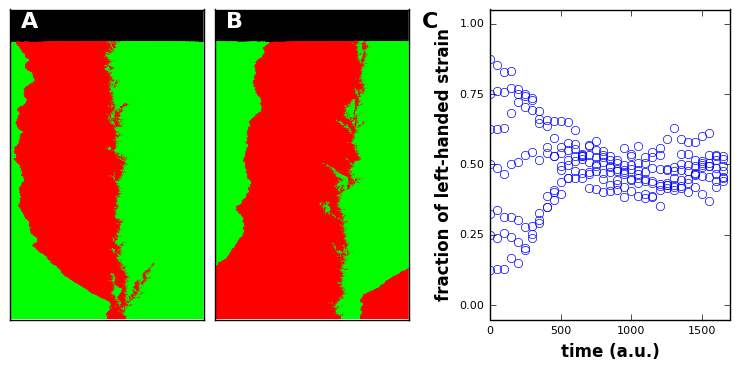

In [3]:
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/oppositely_chiral_strains_coexist/moran/'
path='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/opposite chirality coexists/moran/'
## with mixing from from  /oppch_coexistence_fig/moran/try1_shuffle/alpha/h0.1/ch0.9/1/c.txt
## reverse form /oppch_coexistence_fig/moran/try1_shuffle/alpha/h0.9/ch0.9/1/ca.txt

## without mixing from : /oppch_coexistence_fig/moran/try2_smalldg_shuffle/alpha/h0.1/ch0.9/1/c.txt
##reverse from oppch_coexistence_fig/moran/try2_smalldg_shuffle/alpha/h0.9/ch0.9/1/c.txt
fs=8*2 #fontsize
fs_coexistence_label=12
sfs=4*2#small fontsize
lw=2*2#linewidth
ms=3*2#markersize

mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
# mpl.rcParams['axes.facecolor'] = "none"
# mpl.rcParams['axes.edgecolor'] = "black"
# mpl.rcParams['font.weight'] = "medium"
mpl.rcParams['axes.labelsize'] = fs

fold = path

padval=0.3
ratio_final_fig=3.5

fig = plt.figure(figsize=(8,4))

with open(fold+'without_mixing/ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)

with open(fold+'without_mixing/c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c) 
l= len(ca)
b=len(ca.T)
ca=np.roll(ca,l/2,axis=0)
c=np.roll(c, l/2,axis=0)
cb=c-ca
## to add empty space at the top
b_prime=b*1.1
cbtemp=np.zeros((l,b_prime))
catemp=np.zeros((l,b_prime))
catemp[:,:b]=ca
cbtemp[:,:b]=cb
ca=deepcopy(catemp)
cb=deepcopy(cbtemp)
b=b_prime

gs1 =GridSpec(1, 3 ,width_ratios=[1, 1,1.6]) 
# the ratios are 1,1,1.6 because the last plot needs more space
gs2 =GridSpec(1,1)
#the last plot is made as a 1,1 plot so that i can easily change the location of the plot on the 
#xaxis by chooseing the ledt and right of the gs2
# gs2 =GridSpec(1, 3,width_ratios=[1, 1,1])
gs1.update(left=0.05, right=0.95, wspace=0.05)
gs2.update(left=0.65, right=0.95, wspace=0.05)

ax=[]
ax.append([])
ax.append([])
ax.append([])
ax[0]=plt.subplot(gs1[0,0])
ax[1]=plt.subplot(gs1[0,1])
# ax[2]=plt.subplot(gs2[0,2])
ax[2]=plt.subplot(gs2[0,0])


img = np.ones((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img[:,:,2]=0

ax[0].set_xticks([])
ax[0].set_yticks([])
img3 = ax[0].imshow(img, aspect='auto',interpolation='none')


with open(fold+'without_mixing/ca_reverse.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(fold+'without_mixing/c_reverse.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c) 
l= len(ca)
b=len(ca.T)
ca=np.roll(ca,3*l/4,axis=0)
c=np.roll(c, 3*l/4,axis=0)
cb=c-ca
## to add empty space at the top
b_prime=b*1.1
cbtemp=np.zeros((l,b_prime))
catemp=np.zeros((l,b_prime))
catemp[:,:b]=ca
cbtemp[:,:b]=cb
ca=deepcopy(catemp)
cb=deepcopy(cbtemp)
b=b_prime

img = np.ones((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img[:,:,2]=0
ax[1].set_xticks([])
ax[1].set_yticks([])
img3 = ax[1].imshow(img, aspect='auto',interpolation='none')
   


ax[2].set_ylim(-0.05,1.05)
plt.tick_params(labelsize=sfs)
ax[2].set_xticks([0,500, 1000,1500])
ax[2].set_yticks([0.0,0.25,0.5,0.75,1.0])
ax[2].set_xlabel("time (a.u.)", fontsize =fs_coexistence_label)
ax[2].set_ylabel("fraction of left-handed strain", fontsize =fs_coexistence_label)
# time=np.loadtxt(path+'time_ch1.0.txt')

## for ftime array, run fstar_avg_conditional on the runs and then compose all the ftimes into 
## one array using new _fstar_fbar_fig with appropritely modified path destpath ( commented in code)
fraction=np.loadtxt(path+'without_mixing/ftime_array.txt')  
for i in range(len(fraction)):
#     ax[2].plot(time[:1200],fraction[i][:1200],'o',markeredgecolor='blue',markerfacecolor='none',markevery=50,markersize=ms)
    ax[2].plot(fraction[i][:1700],'o',markeredgecolor='blue',markerfacecolor='none',markevery=50,markersize=ms)

ax[0].set_title('A',y=0.92,x=0.1,color='w',fontsize = fs, fontweight='bold')    
ax[1].set_title('B',y=0.92,x=0.1,color='w',fontsize = fs, fontweight='bold')
ax[2].set_title('C',y=0.92,x=-0.25,color='black',fontsize = fs, fontweight='bold')
# plt.savefig(destpath+'opp_chirality_coexists.eps')
if not os.path.isdir(destpath): os.makedirs(destpath)
plt.savefig(destpath+'opp_chirality_coexists_without_mixing.pdf')
plt.show()

### Fig3 Oppositely chiral strains coexist. for moran with mixing

/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:43: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:92: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ashish/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:93: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


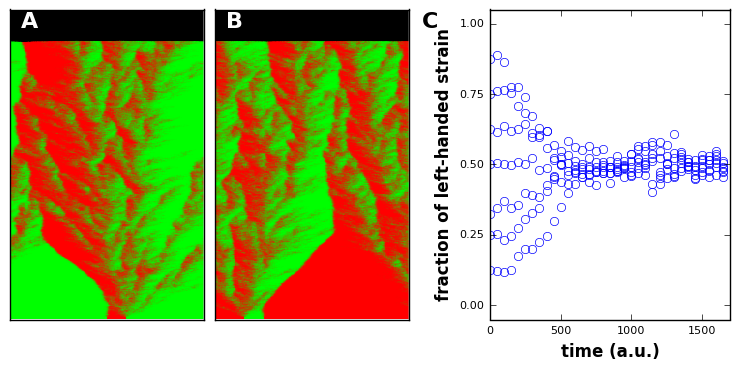

In [4]:
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/oppositely_chiral_strains_coexist/moran/'
path='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/opposite chirality coexists/moran/'
## with mixing from from  /oppch_coexistence_fig/moran/try1/alpha/h0.1/ch0.9/1/c.txt
## reverse form /oppch_coexistence_fig/moran/try1/alpha/h0.9/ch0.9/1/ca.txt

## without mixing from : /oppch_coexistence_fig/moran/try2_smalldg/alpha/h0.1/ch0.9/1/c.txt
##reverse from oppch_coexistence_fig/moran/try2_smalldg/alpha/h0.9/ch0.9/1/c.txt
fs=8*2 #fontsize
fs_coexistence_label=12
sfs=4*2#small fontsize
lw=2*2#linewidth
ms=3*2#markersize

mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
# mpl.rcParams['axes.facecolor'] = "none"
# mpl.rcParams['axes.edgecolor'] = "black"
# mpl.rcParams['font.weight'] = "medium"
mpl.rcParams['axes.labelsize'] = fs

fold = path

padval=0.3


fig = plt.figure(figsize=(8,4))
with open(fold+'with_mixing/ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)

with open(fold+'with_mixing/c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c) 
l= len(ca)
b=len(ca.T)
ca=np.roll(ca,l/2,axis=0)
c=np.roll(c, l/2,axis=0)
cb=c-ca
## to add empty space at the top
b_prime=b*1.1
cbtemp=np.zeros((l,b_prime))
catemp=np.zeros((l,b_prime))
catemp[:,:b]=ca
cbtemp[:,:b]=cb
ca=deepcopy(catemp)
cb=deepcopy(cbtemp)
b=b_prime

gs1 =GridSpec(1, 3 ,width_ratios=[1, 1,1.6]) 
# the ratios are 1,1,1.6 because the last plot needs more space
gs2 =GridSpec(1,1)
#the last plot is made as a 1,1 plot so that i can easily change the location of the plot on the 
#xaxis by chooseing the ledt and right of the gs2
# gs2 =GridSpec(1, 3,width_ratios=[1, 1,1])
gs1.update(left=0.05, right=0.95, wspace=0.05)
gs2.update(left=0.65, right=0.95, wspace=0.05)

ax=[]
ax.append([])
ax.append([])
ax.append([])
ax[0]=plt.subplot(gs1[0,0])
ax[1]=plt.subplot(gs1[0,1])
# ax[2]=plt.subplot(gs2[0,2])
ax[2]=plt.subplot(gs2[0,0])


img = np.ones((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img[:,:,2]=0

ax[0].set_xticks([])
ax[0].set_yticks([])
img3 = ax[0].imshow(img, aspect='auto',interpolation='none')


with open(fold+'with_mixing/ca_reverse.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(fold+'with_mixing/c_reverse.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c) 
l= len(ca)
b=len(ca.T)
ca=np.roll(ca,l/4,axis=0)
c=np.roll(c, l/4,axis=0)
cb=c-ca
## to add empty space at the top
b_prime=b*1.1
cbtemp=np.zeros((l,b_prime))
catemp=np.zeros((l,b_prime))
catemp[:,:b]=ca
cbtemp[:,:b]=cb
ca=deepcopy(catemp)
cb=deepcopy(cbtemp)
b=b_prime

img = np.ones((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img[:,:,2]=0
ax[1].set_xticks([])
ax[1].set_yticks([])
img3 = ax[1].imshow(img, aspect='auto',interpolation='none')
   


ax[2].set_ylim(-0.05,1.05)
plt.tick_params(labelsize=sfs)
ax[2].set_xticks([0,500, 1000,1500])
ax[2].set_yticks([0.0,0.25,0.5,0.75,1.0])
ax[2].set_xlabel("time (a.u.)", fontsize =fs_coexistence_label)
ax[2].set_ylabel("fraction of left-handed strain", fontsize =fs_coexistence_label)
# time=np.loadtxt(path+'time_ch1.0.txt')
fraction=np.loadtxt(path+'with_mixing/ftime_array.txt')  
for i in range(len(fraction)):
#     ax[2].plot(time[:1200],fraction[i][:1200],'o',markeredgecolor='blue',markerfacecolor='none',markevery=50,markersize=ms)
    ax[2].plot(fraction[i][:1700],'o',markeredgecolor='blue',markerfacecolor='none',markevery=50,markersize=ms)

    

ax[0].set_title('A',y=0.92,x=0.1,color='w',fontsize = fs, fontweight='bold')    
ax[1].set_title('B',y=0.92,x=0.1,color='w',fontsize = fs, fontweight='bold')
ax[2].set_title('C',y=0.92,x=-0.25,color='black',fontsize = fs, fontweight='bold')
# plt.savefig(destpath+'opp_chirality_coexists.eps')
if not os.path.isdir(destpath): os.makedirs(destpath)
plt.savefig(destpath+'opp_chirality_coexists_with_mixing.pdf')
plt.show()

### for making ftime array for gdnoise figure, run fig_ftime_cluster.py  /usr3/graduate/ashishge/paper_figure_scripts|

### Fig3 Oppositely chiral strains coexist. for gdnoise

(9, 8788)


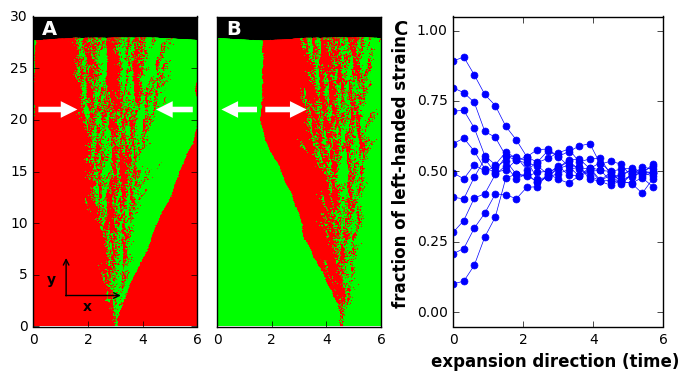

In [18]:
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/oppositely_chiral_strains_coexist/gdnoise/'
path='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/opposite chirality coexists/gdnoise/'


#### figures from:
##/Volumes/Ashish_backup/research data/new_figures/PAPER FIGURES/oppch_coexistence_fig/gdnoise/try1_paper_cacbreverse/N200/ch0.09/h0.05/1
##/Volumes/Ashish_backup/research data/new_figures/PAPER FIGURES/oppch_coexistence_fig/gdnoise/try1_paper/N200/ch0.09/h0.05/1

## ftime array from
# /projectnb/qedksk/ashishge/data/new_sim/oppch_coexistence_avg/gdnoise/try1_paper

fs=14 #fontsize
fs_coexistence_label=12
sfs=10#small fontsize
lw=2*2#linewidth
ms=3*2#markersize

mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
# mpl.rcParams['axes.facecolor'] = "none"
# mpl.rcParams['axes.edgecolor'] = "black"
# mpl.rcParams['font.weight'] = "medium"
mpl.rcParams['axes.labelsize'] = fs

fold = path

with open(fold+'ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)

with open(fold+'c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c) 
l= len(ca)
b=len(ca.T)
cb=c-ca

padval=0.3
ratio_final_fig=3.5
# fig = plt.figure(figsize=(7,(7-padval)/(2.0*l/b + ratio_final_fig*l/b)))
# gs1 =GridSpec(1, 3 ,width_ratios=[1, 1,ratio_final_fig])
# gs2 =GridSpec(1, 3,width_ratios=[1, 1,ratio_final_fig])
fig = plt.figure(figsize=(7,4))

gs1 =GridSpec(1, 3 ,width_ratios=[1, 1,1.6]) 
# the ratios are 1,1,1.6 because the last plot needs more space
gs2 =GridSpec(1,1)
#the last plot is made as a 1,1 plot so that i can easily change the location of the plot on the 
#xaxis by chooseing the ledt and right of the gs2
# gs2 =GridSpec(1, 3,width_ratios=[1, 1,1])
gs1.update(left=0.05, right=0.95, wspace=0.1)
gs2.update(left=0.65, right=0.95, wspace=0.1)

ax=[]
ax.append([])
ax.append([])
ax.append([])
ax[0]=plt.subplot(gs1[0,0])
ax[1]=plt.subplot(gs1[0,1])
# ax[2]=plt.subplot(gs2[0,2])
ax[2]=plt.subplot(gs2[0,0])


img = np.ones((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img[:,:,2]=0


img3 = ax[0].imshow(img, aspect='auto',interpolation='none')
   
fold=path
with open(fold+'ca2.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(fold+'c2.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c) 
 

l= len(ca)
b=len(ca.T)
ca=np.roll(ca,l/4,axis=0)
c=np.roll(c, l/4,axis=0)
cb=c-ca

fold = destpath   

img = np.ones((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img[:,:,2]=0


img3 = ax[1].imshow(img, aspect='auto',interpolation='none')
   


ax[2].set_ylim(-0.05,1.05)
plt.tick_params(labelsize=sfs)
ax[2].set_xlabel("expansion direction (time) ", fontsize =fs_coexistence_label)
ax[2].set_ylabel("fraction of left-handed strain", fontsize =fs_coexistence_label)


ftime_array=np.loadtxt(path+'ftime_array.txt')
v_list=np.loadtxt(path+'v_list.txt')
print np.shape(ftime_array)
b=len(ftime_array[0])
l_cutoff=600



for i in range(len(ftime_array)):
    
    ## subsampled array of every "mark_every" elements 
    mark_every=30
    array_idx=np.arange(0,l_cutoff,mark_every)
    ftime=ftime_array[i][array_idx]
    
    ## if you want to plot fractions against y coordinate##    

    ax[2].plot(array_idx,ftime,'-o',color='blue',markeredgecolor='blue',markersize=5,linewidth=0.5)
    
    
##  if you want to plot  fractions  against time##
#     time=np.arange(b)*1.0/v_list[i]
#     ax[2].plot(time[:l_cutoff],ftime_array[i][:l_cutoff],'o',markeredgecolor='blue',markerfacecolor='none',markevery=50,markersize=ms)
    



#### The old format for ftime array
# time=np.loadtxt(path+'time_ch1.0.txt')
# fraction=np.loadtxt(path+'fraction_ch1.0.txt')
# # print len(fraction)    
# for i in range(len(fraction)):
#     ax[2].plot(time[:1200],fraction[i][:1200],'o',markeredgecolor='blue',markerfacecolor='none',markevery=50,markersize=ms)
    

ax[0].set_title('A',y=0.92,x=0.1,color='w',fontsize = fs, fontweight='bold')    
ax[1].set_title('B',y=0.92,x=0.1,color='w',fontsize = fs, fontweight='bold')
ax[2].set_title('C',y=0.92,x=-0.25,color='black',fontsize = fs, fontweight='bold')

ax[0].annotate('', xy=(0.32, 0.7), xytext=(-0.02, 0.7),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.15))
ax[0].annotate('', xy=(0.7, 0.7), xytext=(1.02, 0.7),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.15))
ax[1].annotate('', xy=(-0.02, 0.7), xytext=(0.29, 0.7),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.15))
ax[1].annotate('', xy=(0.6, 0.7), xytext=(0.24, 0.7),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.15))
# plt.savefig(destpath+'opp_chirality_coexists.eps')


ticks=[3000,2500,2000, 1500,1000,500,0]
labels=[0,500, 1000,1500,2000,2500,3000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels)
ticks=[0,200,400,600]
labels=[0,200,400,600]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)

ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)
ax[1].set_yticks([])


ax[2].set_yticks([0.0,0.25,0.5,0.75,1.0])
## for plotting against y position
ticks=[0,200, 400,600]
labels=[0,200,400,600]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[2].set_xticks(ticks)
ax[2].set_xticklabels(labels)



## for plotting against time instead, no rescaling required.##
# ax[2].set_xticks([0,2000, 4000,6000])


if not os.path.isdir(destpath): os.makedirs(destpath)
plt.savefig(destpath+'opp_chirality_coexists.pdf')
plt.show()

### Fig3 opp chirality coexists gdnoise 2 column figure with 3 square subplots

(9, 8788)


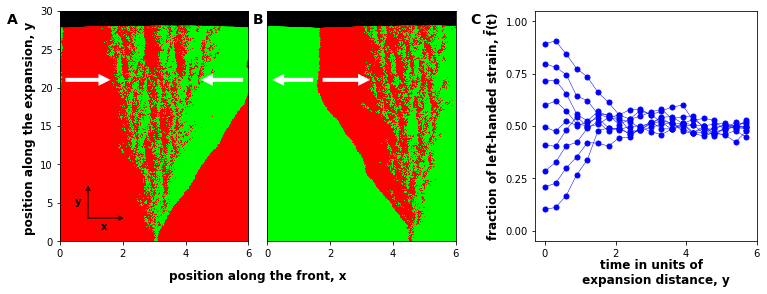

In [10]:
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/oppositely_chiral_strains_coexist/gdnoise/'
path='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/opposite chirality coexists/gdnoise/'


#### figures from:
##/Volumes/Ashish_backup/research data/new_figures/PAPER FIGURES/oppch_coexistence_fig/gdnoise/try1_paper_cacbreverse/N200/ch0.09/h0.05/1
##/Volumes/Ashish_backup/research data/new_figures/PAPER FIGURES/oppch_coexistence_fig/gdnoise/try1_paper/N200/ch0.09/h0.05/1

## ftime array from
# /projectnb/qedksk/ashishge/data/new_sim/oppch_coexistence_avg/gdnoise/try1_paper

fs=14 #fontsize
fs_coexistence_label=12
sfs=10#small fontsize
lw=2*2#linewidth
ms=3*2#markersize

mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
# mpl.rcParams['axes.facecolor'] = "none"
# mpl.rcParams['axes.edgecolor'] = "black"
# mpl.rcParams['font.weight'] = "medium"
mpl.rcParams['axes.labelsize'] = fs

fold = path

with open(fold+'ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)

with open(fold+'c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c) 
l= len(ca)
b=len(ca.T)
cb=c-ca

padval=0.3

fig = plt.figure(figsize=(11,4))

gs1 =GridSpec(1, 2 ,width_ratios=[1, 1]) 
# # the ratios are 1,1,1.6 because the last plot needs more space
gs2 =GridSpec(1,1)
# #the last plot is made as a 1,1 plot so that i can easily change the location of the plot on the 
# #xaxis by chooseing the ledt and right of the gs2
# # gs2 =GridSpec(1, 3,width_ratios=[1, 1,1])
gs1.update(left=0.1, right=0.6, top=0.96,bottom =0.16,wspace=0.1)
gs2.update(left=0.7, right=0.98,top=0.96,bottom =0.16, wspace=0.1)

ax=[]
ax.append([])
ax.append([])
ax.append([])
ax[0]=plt.subplot(gs1[0,0])
ax[1]=plt.subplot(gs1[0,1])
# ax[2]=plt.subplot(gs1[0,2])
ax[2]=plt.subplot(gs2[0,0])



img = np.ones((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img[:,:,2]=0


img3 = ax[0].imshow(img, aspect='auto',interpolation='none')
   
fold=path
with open(fold+'ca2.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(fold+'c2.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c) 
 

l= len(ca)
b=len(ca.T)
ca=np.roll(ca,l/4,axis=0)
c=np.roll(c, l/4,axis=0)
cb=c-ca

fold = destpath   

img = np.ones((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img[:,:,2]=0


img3 = ax[1].imshow(img, aspect='auto',interpolation='none')
   


ax[2].set_ylim(-0.05,1.05)
plt.tick_params(labelsize=sfs)


ftime_array=np.loadtxt(path+'ftime_array.txt')
v_list=np.loadtxt(path+'v_list.txt')
print np.shape(ftime_array)
b=len(ftime_array[0])
l_cutoff=600



for i in range(len(ftime_array)):
    
    ## subsampled array of every "mark_every" elements 
    mark_every=30
    array_idx=np.arange(0,l_cutoff,mark_every)
    ftime=ftime_array[i][array_idx]
    
    ## if you want to plot fractions against y coordinate##    

    ax[2].plot(array_idx,ftime,'-o',color='blue',markeredgecolor='blue',markersize=5,linewidth=0.5)
    
    
##  if you want to plot  fractions  against time##
#     time=np.arange(b)*1.0/v_list[i]
#     ax[2].plot(time[:l_cutoff],ftime_array[i][:l_cutoff],'o',markeredgecolor='blue',markerfacecolor='none',markevery=50,markersize=ms)
    



#### The old format for ftime array
# time=np.loadtxt(path+'time_ch1.0.txt')
# fraction=np.loadtxt(path+'fraction_ch1.0.txt')
# # print len(fraction)    
# for i in range(len(fraction)):
#     ax[2].plot(time[:1200],fraction[i][:1200],'o',markeredgecolor='blue',markerfacecolor='none',markevery=50,markersize=ms)
    

ax[0].set_title('A',y=0.92,x=-0.25,color='black',fontsize = fs, fontweight='bold')    
ax[1].set_title('B',y=0.92,x=-0.05,color='black',fontsize = fs, fontweight='bold')
ax[2].set_title('C',y=0.92,x=-0.27,color='black',fontsize = fs, fontweight='bold')

ax[0].annotate('', xy=(0.32, 0.7), xytext=(-0.02, 0.7),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.15))
ax[0].annotate('', xy=(0.7, 0.7), xytext=(1.02, 0.7),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.15))
ax[1].annotate('', xy=(-0.02, 0.7), xytext=(0.29, 0.7),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.15))
ax[1].annotate('', xy=(0.6, 0.7), xytext=(0.24, 0.7),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', shrink=0.15))
# plt.savefig(destpath+'opp_chirality_coexists.eps')


ticks=[3000,2500,2000, 1500,1000,500,0]
labels=[0,500, 1000,1500,2000,2500,3000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels)
ticks=[0,200,400,600]
labels=[0,200,400,600]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)

ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)
ax[1].set_yticks([])


ax[2].set_yticks([0.0,0.25,0.5,0.75,1.0])
## for plotting against y position
ticks=[0,200, 400,600]
labels=[0,200,400,600]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[2].set_xticks(ticks)
ax[2].set_xticklabels(labels)


## for plotting against time instead, no rescaling required.##
# ax[2].set_xticks([0,2000, 4000,6000])
#######       #########

ax[0].set_ylabel("position along the expansion, y ", fontsize =fs_coexistence_label)
ax[2].set_ylabel("fraction of left-handed strain, $\\mathbf{\\bar{f}(t)}$", fontsize =fs_coexistence_label)
# ax[2].set_xlabel("time measured by \n expansion distance ", fontsize =fs_coexistence_label)


fig.text(0.35, 0.04,'position along the front, x', ha='center', va='center',fontweight="bold",fontsize =fs_coexistence_label)
fig.text(0.85, 0.05,'time in units of \n expansion distance, y', ha='center', va='center',fontweight="bold",fontsize =fs_coexistence_label)

ax[0].annotate('', xy=(0.35, 0.1), xytext=(0.14, 0.1),xycoords='axes fraction',color='black',
            arrowprops=dict(arrowstyle="->",facecolor='black',edgecolor='black'))
ax[0].annotate('', xy=(0.15, 0.25), xytext=(0.15, 0.09),xycoords='axes fraction',color='black',
            arrowprops=dict(arrowstyle="->",facecolor='black',edgecolor='black'))
ax[0].text(0.22, 0.05,'x',transform=ax[0].transAxes,color='black',fontweight='bold',ha='left')#,rotation='vertical',)
ax[0].text(0.08, 0.16,'y',transform=ax[0].transAxes,color='black',fontweight='bold',ha='left')#,rotation='vertical',)




if not os.path.isdir(destpath): os.makedirs(destpath)
plt.savefig(destpath+'opp_chirality_coexists_2column.pdf')
## eps is too big
plt.savefig(destpath+'opp_chirality_coexists_2column.tif',dpi=300)
plt.show()

### striking image single panel

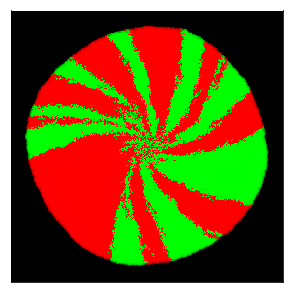

In [54]:
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/striking_image/'
path_logspiral='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/logspiral and fits/stochastic/'



fig = plt.figure(figsize=(5,5))  
fold=path_logspiral   
with open(fold+'ca.txt') as file:
    ca = [[float(digit) for digit in line.split()] for line in file]
ca=np.array(ca)
with open(fold+'c.txt') as file:       
    c = [[float(digit) for digit in line.split()] for line in file]
c=np.array(c) 
l= len(ca)
b=len(ca.T)
cb=c-ca

img = np.ones((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img[:,:,2]=0
plt.imshow(img, aspect='equal',interpolation='none')  
    


plt.xticks([])
plt.yticks([])

if not os.path.isdir(destpath): os.makedirs(destpath)
plt.savefig(destpath+'strikingImage.pdf')

plt.show()

## Fig 4 dip, bulge , burgers analytical 

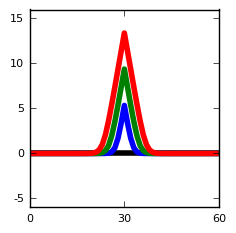

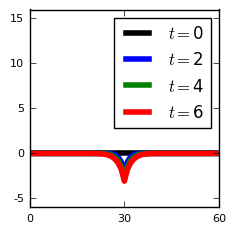

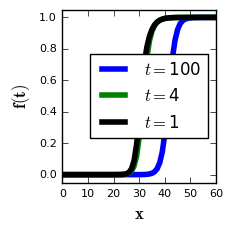

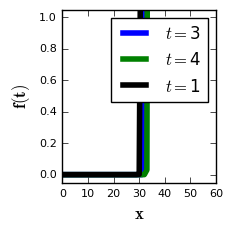

In [92]:
from scipy.special import erfc
from scipy.special import erf
fs=12 #fontsize

sfs=12#small fontsize
lw=2#linewidth
ms=2#markersize



fold='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/bulge_and_dip_image_and_soln/'

def h_x_t(x,t, k,d):
   return 2*d *math.log(math.exp ((k**2)*(t)/d - k*math.fabs(x)/d )*(1+math.erf(k*np.sqrt((t)/d)-math.fabs(x)/(2*math.sqrt(t*d))))  + math.erf(math.fabs(x)/(2*math.sqrt(t*d))))
  
def h_longtime_x_t(x,t, k,d):
   return 2*d *(((k**2)*(t)/d - k*math.fabs(x)/d )+math.log((1+math.erf(k*np.sqrt((t)/d)-math.fabs(x)/(2*math.sqrt(t*d))))))

def f_x_t(x,t,d,beta,a,b): ## a=1 b=0 or a=0 b=1, the concentrations at the domains basically.
    c=(a+b)/2   
    numerator=a*math.exp( (b-a)*x/(2*d) )*math.erfc( (x+ (c-b)*t)/(math.sqrt(4*d*t)) ) + b* math.erfc( (x+ (c-a)*t)/(math.sqrt(4*d*t)) ) 
    denominator=math.exp( (b-a)*x/(2*d) )*math.erfc( (x+ (c-b)*t)/(math.sqrt(4*d*t)) ) + math.erfc( (x+ (c-a)*t)/(math.sqrt(4*d*t)) ) 
    return (   numerator/denominator   )    

l_img=2.4
h_img=2.4


l=60
tval0=0
tval1=2
tval2=4
tval3=6
kval=1    #.1
dval=1   #.4
h=np.zeros(l) 
### for plotting bulge   ## 

    
fig = plt.figure(figsize=(l_img,h_img))  
ax = fig.add_subplot(111)
h=np.zeros(l) 
plt.plot(h,'black', label="$t=$" +str(tval0))

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval1,kval,dval) 
plt.plot(h,'blue', label="$t=$" +str(tval1)) 
     
for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval2,kval,dval) 
plt.plot(h,'green', label="$t=$" +str(tval2)) 

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval3,kval,dval) 
plt.plot(h,'red', label="$t=$" +str(tval3)) 

# ax.set_xlabel('$\mathbf{x}$',fontsize = fs, fontweight='bold')
# ax.set_ylabel('$\mathbf{h-v_0t}$',fontsize = fs, fontweight='bold') 

#ax.set_yticks((0.0,4,8,12))
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom='off',      # ticks along the bottom edge are off
#    top='off',         # ticks along the top edge are off
#    labelbottom='off') # labels along the bottom edge are off
    
#plt.tick_params(
#    axis='y',          # changes apply to the y-axis
#    which='both',      # both major and minor ticks are affected
#    left='off',      # ticks along the left edge are off
#    right='off',         # ticks along the right edge are off
#    labelleft='off') # labels along the bottom edge are off

ax.set_xlim(0,l)
# ax.set_ylim(-np.max(h)/3,np.max(h)*1.1) 
ax.set_ylim(-6,16) 

# plt.legend(loc="best",fontsize = fs) 
ticks=[-5,0,5,10,15]
labels=[-5,0,5,10,15]
ax.set_yticks(ticks)
ax.set_yticklabels(labels)
ticks=[0,30,60]
labels=[0,30,60]
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
plt.tight_layout()
plt.savefig(fold+"bulge_analytical.pdf")
    

plt.show()

### for plotting dip   ##
fig = plt.figure(figsize=(l_img,h_img))  
ax = fig.add_subplot(111)

h=np.zeros(l)
plt.plot(h,'black', label="$t=$" +str(tval0))

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval1,-kval,dval) 
plt.plot(h,'blue', label="$t=$" +str(tval1)) 

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval2,-kval,dval) 
plt.plot(h,'green', label="$t=$" +str(tval2)) 

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval3,-kval,dval) 
plt.plot(h,'red', label="$t=$" +str(tval3)) 
plt.legend(loc="best",fontsize = fs)   
# ax.set_xlabel('$\mathbf{x}$',fontsize = fs, fontweight='bold')
# ax.set_ylabel('$\mathbf{h-v_0t}$',fontsize = fs, fontweight='bold')    
ax.set_xlim(0,l)
ax.set_ylim(np.min(h)*1.5,-np.min(h)/3)


# ticks=[0,-2,-4]
# labels=[0,-2,-4]
ticks=[-5,0,5,10,15]
labels=[-5,0,5,10,15]
ax.set_ylim(-6,16)
ax.set_yticks(ticks)
ax.set_yticklabels(labels)
ticks=[0,30,60]
labels=[0,30,60]
ax.set_xticks(ticks)
ax.set_xticklabels(labels)


plt.tight_layout()
plt.savefig(fold+"dip_analytical.pdf")                  
plt.show()




#### burgers solutions
betaval=1.0 ## doesnt matter currently, set to 1.
f=np.zeros(l)
tval1=1
tval3=100
fig = plt.figure(figsize=(l_img,h_img))  
ax = fig.add_subplot(111)

for i in range(l):
    xval=l/2-i #centering 
    f[i]=f_x_t(xval,tval3,dval,betaval,1.0,0.0)    
plt.plot(f,'blue', label="$t=$" +str(tval3)) 

for i in range(l):
    xval=l/2-i #centering   
    f[i]=f_x_t(xval,tval2,dval,betaval,1.0,0.0)    
plt.plot(f,'green', label="$t=$" +str(tval2)) 

for i in range(l):
    xval=l/2-i #centering     
    f[i]=f_x_t(xval,tval1,dval,betaval,1.0,0.0)  
plt.plot(f,'black', label="$t=$" +str(tval1)) 
plt.legend(loc="best",fontsize = fs)   
ax.set_xlabel('$\mathbf{x}$',fontsize = fs, fontweight='bold')
ax.set_ylabel('$\mathbf{f(t)}$',fontsize = fs, fontweight='bold')    
ax.set_xlim(0,l)
ax.set_ylim(-0.05,1.05)
plt.tight_layout()
plt.savefig(fold+"burgers_analytical.pdf")                  
plt.show()


betaval=1.0 ## doesnt matter currently, set to 1.
f=np.zeros(l)
tval1=1
tval3=3
fig = plt.figure(figsize=(l_img,h_img))  
ax = fig.add_subplot(111)

for i in range(l):
    xval=l/2-i #centering 
    f[i]=f_x_t(xval,tval3,dval,betaval,0.0,10.0)    
plt.plot(f,'blue', label="$t=$" +str(tval3)) 

for i in range(l):
    xval=l/2-i #centering   
    f[i]=f_x_t(xval,tval2,dval,betaval,0.0,10.0)    
plt.plot(f,'green', label="$t=$" +str(tval2)) 

for i in range(l):
    xval=l/2-i #centering     
    f[i]=f_x_t(xval,tval1,dval,betaval,0.0,10.0)  
plt.plot(f,'black', label="$t=$" +str(tval1)) 
plt.legend(loc="best",fontsize = fs)   
ax.set_xlabel('$\mathbf{x}$',fontsize = fs, fontweight='bold')
ax.set_ylabel('$\mathbf{f(t)}$',fontsize = fs, fontweight='bold')    
ax.set_xlim(0,l)
ax.set_ylim(-0.05,1.05)
plt.tight_layout()
plt.savefig(fold+"burgers_analytical2.pdf")                  
plt.show()




## Fig 4 colony image zoomed in from wall motion compressed figure

2399
6400
2250
200


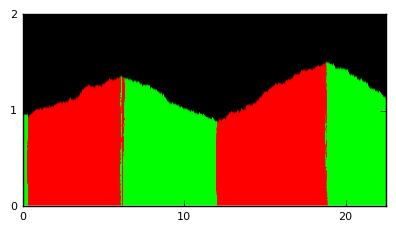

In [7]:
## from /Users/ashish/Downloads/wallmotion_figure/try2_compressed/N200/ch0.9/noise1/1/ca15.gz
import pandas as pd


fs=14 #fontsize

sfs=8#small fontsize
lw=2*2#linewidth
ms=3*2#markersize

mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
mpl.rcParams['axes.labelsize'] = sfs

fold="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/bulge_and_dip_image_and_soln/"
ca= pd.read_csv(fold+'ca15.gz',sep=' ').values
c= pd.read_csv(fold+'c15.gz',sep=' ').values
ca=np.array(ca)
c=np.array(c)  
cb=c-ca 
ca_zoom= ca[0:2250,5925:6125]
c_zoom= c[0:2250,5925:6125]
cb_zoom=c_zoom-ca_zoom






l= len(ca)
b=len(ca.T)
print (l)
print (b)

l= len(ca_zoom)
b=len(ca_zoom.T)
print (l)
print (b)

fig3, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,2.4))   
# img = np.zeros((l,b,3))
img = np.zeros((b,l,3))

img[:,:,0]=np.rot90(ca_zoom[:,:])
img[:,:,1]=np.rot90(cb_zoom[:,:])
img3 = ax.imshow(img,aspect="auto")  


ticks=[0,1000,2000]
labels=[0,1000,2000] 
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

ticks=[0,100,200]
labels=[200,100,0] ## oorder reversed 
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax.set_yticks(ticks)
ax.set_yticklabels(labels)
# ax.set_ylabel("position along the expansion, y")
# ax.set_xlabel("position along the expansion, y")



plt.tight_layout()
plt.savefig(fold+"zoomed_image.png") 

plt.show()



## Fig 4 colony image zoomed in from bulge dip figure

2399
2100
2399
100


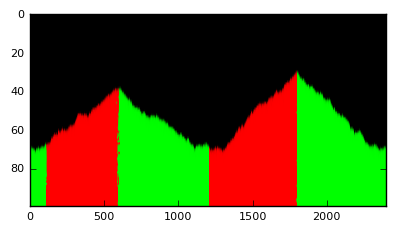

In [7]:
## from /Users/ashish/Downloads/try2_compressed/N600/ch0.9/noise1/1 or /3
import pandas as pd


fs=14 #fontsize

sfs=8#small fontsize
lw=2*2#linewidth
ms=3*2#markersize

mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
mpl.rcParams['axes.labelsize'] = sfs



fold="/Users/ashish/Downloads/try2_compressed/N600/ch0.9/noise1/3/"
ca= pd.read_csv(fold+'ca.gz',sep=' ').values
c= pd.read_csv(fold+'c.gz',sep=' ').values

ca=np.array(ca)
c=np.array(c)  
cb=c-ca 

ca_zoom= ca[:,1950:2050]
c_zoom= c[:,1950:2050]
cb_zoom=c_zoom-ca_zoom





l= len(ca)
b=len(ca.T)
print (l)
print (b)

l= len(ca_zoom)
b=len(ca_zoom.T)
print (l)
print (b)

fig3, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,2.4))   
# img = np.zeros((l,b,3))
img = np.zeros((b,l,3))

img[:,:,0]=np.rot90(ca_zoom[:,:])
img[:,:,1]=np.rot90(cb_zoom[:,:])
img3 = ax.imshow(img,aspect="auto")  


# ticks=[0,1000,2000]
# labels=[0,1000,2000] 
# labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
# ax.set_xticks(ticks)
# ax.set_xticklabels(labels)

# ticks=[0,100,200]
# labels=[200,100,0] ## oorder reversed 
# labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
# ax.set_yticks(ticks)
# ax.set_yticklabels(labels)
# ax.set_ylabel("position along the expansion, y")
# ax.set_xlabel("position along the expansion, y")



plt.tight_layout()
plt.savefig(fold+"zoomed_image.png") 

plt.show()




## fig4 together

In [2]:
## from /Users/ashish/Downloads/wallmotion_figure/try2_compressed/N200/ch0.9/noise1/1/ca15.gz
import pandas as pd
fs=12 #fontzize
sfs=11#small fontsize
lw=1#linewidth
ms=3#markersize

mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
# mpl.rcParams['axes.textweight'] = "bold"
mpl.rcParams['axes.labelsize'] = fs



fig = plt.figure(figsize=(8,2.75))
gs1 =GridSpec(1,1) 
gs2 =GridSpec(1,2)
gs1.update(left=0.12, right=0.4,bottom=0.25)
gs2.update(left=0.48, right=0.98, bottom=0.25)
ax=[]
ax.append([])
ax.append([])
ax.append([])
ax[0]=plt.subplot(gs1[0,0])
ax[1]=plt.subplot(gs2[0,0])
ax[2]=plt.subplot(gs2[0,1])






# fold="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/bulge_and_dip_image_and_soln/"
# ca= pd.read_csv(fold+'ca15.gz',sep=' ').values
# c= pd.read_csv(fold+'c15.gz',sep=' ').values
# ca=np.array(ca)
# c=np.array(c)  
# cb=c-ca 
# x1,x2,y1,y2=[0,2250,5950,6100]
# ca_zoom= ca[x1:x2,y1:y2]
# c_zoom= c[x1:x2,y1:y2]
# cb_zoom=c_zoom-ca_zoom



fold="/Users/ashish/Downloads/try2_compressed/N600/ch0.9/noise1/3/"
ca= pd.read_csv(fold+'ca.gz',sep=' ').values
c= pd.read_csv(fold+'c.gz',sep=' ').values
ca=np.array(ca)
c=np.array(c)  
cb=c-ca 
x1,x2,y1,y2=[0,2400,1950,2050]
ca_zoom= ca[x1:x2,y1:y2]
c_zoom= c[x1:x2,y1:y2]
cb_zoom=c_zoom-ca_zoom





l= len(ca_zoom)
b=len(ca_zoom.T)
img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(ca_zoom[:,:])
img[:,:,1]=np.rot90(cb_zoom[:,:])
img3 = ax[0].imshow(img,aspect="auto") 


ticks=[0,1000,2000]
labels=[x1+0,x1+1000,x1+2000] 
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)
ticks=[0,50,100,150]
labels=[y1+150,y1+100,y1+50,y1+0] ## order reversed
labels[:] = [x*1.0 / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels)
ax[0].xaxis.tick_top()
ax[0].set_ylabel("position along \n expansion, y")

 
ax[0].annotate('', xy=(0.26, 0.06), xytext=(0.12, 0.06),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none',width=2.5, headwidth=8))
ax[0].annotate('', xy=(0.83, 0.06), xytext=(0.69, 0.06),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', width=2.5, headwidth=8))    
ax[0].annotate('', xy=(0.27, 0.06), xytext=(0.41, 0.06),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', width=2.5, headwidth=8))    
ax[0].annotate('', xy=(0.84, 0.06), xytext=(0.98, 0.06),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', width=2.5, headwidth=8))    
######### plotting  bulge analytical    ####### 
lw=3#linewidth
mpl.rcParams['lines.linewidth'] = lw    
    
def h_x_t(x,t, k,d):
   return 2*d *math.log(math.exp ((k**2)*(t)/d - k*math.fabs(x)/d )*(1+math.erf(k*np.sqrt((t)/d)-math.fabs(x)/(2*math.sqrt(t*d))))  + math.erf(math.fabs(x)/(2*math.sqrt(t*d))))
  
def h_longtime_x_t(x,t, k,d):
   return 2*d *(((k**2)*(t)/d - k*math.fabs(x)/d )+math.log((1+math.erf(k*np.sqrt((t)/d)-math.fabs(x)/(2*math.sqrt(t*d))))))

def f_x_t(x,t,d,beta,a,b): ## a=1 b=0 or a=0 b=1, the concentrations at the domains basically.
    c=(a+b)/2   
    numerator=a*math.exp( (b-a)*x/(2*d) )*math.erfc( (x+ (c-b)*t)/(math.sqrt(4*d*t)) ) + b* math.erfc( (x+ (c-a)*t)/(math.sqrt(4*d*t)) ) 
    denominator=math.exp( (b-a)*x/(2*d) )*math.erfc( (x+ (c-b)*t)/(math.sqrt(4*d*t)) ) + math.erfc( (x+ (c-a)*t)/(math.sqrt(4*d*t)) ) 
    return (   numerator/denominator   )    


l=40
tval0=0
tval1=2
tval2=4
tval3=6
kval=1    #.1
dval=1   #.4
h=np.zeros(l) 
### for plotting bulge   ## 

h=np.zeros(l) 
ax[1].plot(h,'black', label="$t=$" +str(tval0))

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval1,kval,dval) 
ax[1].plot(h,'blue', label="$t=$" +str(tval1)) 
     
for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval2,kval,dval) 
ax[1].plot(h,'green', label="$t=$" +str(tval2)) 

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval3,kval,dval) 
ax[1].plot(h,'red', label="$t=$" +str(tval3)) 

# ax.set_xlabel('$\mathbf{x}$',fontsize = fs, fontweight='bold')
ax[1].set_ylabel('$\mathbf{h-v_0t}$',fontsize = fs*1.2, fontweight='bold') 


ax[1].set_xlim(0,l)
# ax.set_ylim(-np.max(h)/3,np.max(h)*1.1) 
ax[1].set_ylim(-6,16) 

# plt.legend(loc="best",fontsize = fs) 
ticks=[-5,0,5,10,15]
labels=[-5,0,5,10,15]
ax[1].set_yticks(ticks)
ax[1].set_yticklabels(labels)
ticks=[0,20,40]
labels=[-20,0,20]
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)

    



### for plotting dip   ##


h=np.zeros(l)
ax[2].plot(h,'black', label="$t=$" +str(tval0))

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval1,-kval,dval) 
ax[2].plot(h,'blue', label="$t=$" +str(tval1)) 

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval2,-kval,dval) 
ax[2].plot(h,'green', label="$t=$" +str(tval2)) 

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval3,-kval,dval) 
ax[2].plot(h,'red', label="$t=$" +str(tval3)) 
ax[2].legend(loc="best",fontsize = fs)   
# ax.set_xlabel('$\mathbf{x}$',fontsize = fs, fontweight='bold')
# ax.set_ylabel('$\mathbf{h-v_0t}$',fontsize = fs, fontweight='bold')    
ax[2].set_xlim(0,l)
ax[2].set_ylim(np.min(h)*1.5,-np.min(h)/3)


# ticks=[0,-2,-4]
# labels=[0,-2,-4]
ticks=[-5,0,5,10,15]
labels=[-5,0,5,10,15]
ax[2].set_ylim(-6,16)
ax[2].set_yticks(ticks)
ax[2].set_yticklabels(labels)
ticks=[0,20,40]
labels=[-20,0,20]
ax[2].set_xticks(ticks)
ax[2].set_xticklabels(labels)

fig.text(0.5, 0.05,'position along the front, x', ha='center', va='center',fontweight="bold",fontsize=fs)
# fig.text(0.035, 0.5, 'position along the expansion direction, y', ha='center', va='center',fontweight="bold", rotation='vertical')


ax[0].set_title('A',y=0.97,x=-0.25,color='black',fontsize = fs, fontweight='bold')    
ax[1].set_title('B',y=0.97,x=-0.17,color='black',fontsize = fs, fontweight='bold')
ax[2].set_title('C',y=0.97,x=-0.17,color='black',fontsize = fs, fontweight='bold')

ax[0].annotate('bulge', xy=(0.27, 0.70), xytext=(0.27, 0.87),xycoords='axes fraction',color='gold',fontsize=fs,fontweight="bold",
            arrowprops=dict(arrowstyle="->",facecolor='black',edgecolor='gold'))
ax[0].annotate('dip', xy=(0.52, 0.45), xytext=(0.52, 0.65),xycoords='axes fraction',color='gold',fontsize=fs,fontweight="bold",
            arrowprops=dict(arrowstyle="->",facecolor='black',edgecolor='gold'))
# ax[0].text(0.22, 0.05,'x',transform=ax[0].transAxes,color='black',fontweight='bold',ha='left')#,rotation='vertical',)
# ax[0].text(0.02, 0.15,'y',transform=ax[0].transAxes,color='black',fontweight='bold',ha='left')#,rotation='vertical',)

ax[0].annotate('inflow boundary', xy=(0.26, -0.01), xytext=(0.26, -0.14),xycoords='axes fraction',color='black',fontsize=fs-2, fontweight="bold"
               ,ha='center',
            arrowprops=dict(arrowstyle='-[, widthB=1.0, lengthB=0.1,angleB=0',edgecolor='black'))
ax[0].annotate('outflow boundary', xy=(0.55, -0.01), xytext=(0.55, -0.24),xycoords='axes fraction',color='black',fontsize=fs-2, fontweight="bold"
               ,ha='center',
            arrowprops=dict(arrowstyle='-[, widthB=1.0, lengthB=0.25,angleB=0',edgecolor='black'))


destfold='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/bulge_and_dip_image_and_soln/'
plt.savefig(destfold+"bulge_dip_3inrow.pdf")    
plt.show()


NameError: name 'x1' is not defined

## fig 4 version 2  from wall motion figure with first figure having xaxis label on top

In [1]:
## from /Users/ashish/Downloads/wallmotion_figure/try2_compressed/N200/ch0.9/noise1/1/ca15.gz
import pandas as pd
fs=12 #fontzize
sfs=11#small fontsize
lw=1#linewidth
ms=3#markersize

mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
# mpl.rcParams['axes.textweight'] = "bold"
mpl.rcParams['axes.labelsize'] = fs



fig = plt.figure(figsize=(8,2.75))
gs1 =GridSpec(1,1) 
gs2 =GridSpec(1,2)
gs1.update(left=0.12, right=0.4,bottom=0.2,top=0.8)
gs2.update(left=0.48, right=0.98, bottom=0.2)
ax=[]
ax.append([])
ax.append([])
ax.append([])
ax[0]=plt.subplot(gs1[0,0])
ax[1]=plt.subplot(gs2[0,0])
ax[2]=plt.subplot(gs2[0,1])






fold="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/bulge_and_dip_image_and_soln/"






#####the image is from wall motion, and the dip is just made by meeting point of two bulges
fold="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/bulge_and_dip_image_and_soln/"
ca= pd.read_csv(fold+'ca15.gz',sep=' ').values
c= pd.read_csv(fold+'c15.gz',sep=' ').values
ca=np.array(ca)
c=np.array(c)  
cb=c-ca 
x1,x2,y1,y2=[0,2250,5950,6100]
ca_zoom= ca[x1:x2,y1:y2]
c_zoom= c[x1:x2,y1:y2]
cb_zoom=c_zoom-ca_zoom


# #####the image is from bulge_dip figure, and the dip is not very visible
# fold="/Users/ashish/Downloads/try2_compressed/N600/ch0.9/noise1/3/"
# ca= pd.read_csv(fold+'ca.gz',sep=' ').values
# c= pd.read_csv(fold+'c.gz',sep=' ').values
# ca=np.array(ca)
# c=np.array(c)  
# cb=c-ca 
# x1,x2,y1,y2=[0,2400,1950,2050]
# ca_zoom= ca[x1:x2,y1:y2]
# c_zoom= c[x1:x2,y1:y2]
# cb_zoom=c_zoom-ca_zoom


l= len(ca_zoom)
b=len(ca_zoom.T)
img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(ca_zoom[:,:])
img[:,:,1]=np.rot90(cb_zoom[:,:])
img3 = ax[0].imshow(img,aspect="auto") 


ticks=[0,1000,2000]
labels=[x1+0,x1+1000,x1+2000] 
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)
ticks=[0,50,100,150]
labels=[y1+150,y1+100,y1+50,y1+0] ## order reversed
labels[:] = [x*1.0 / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels)
ax[0].xaxis.tick_top()
ax[0].set_ylabel("position along \n expansion, y")

 
ax[0].annotate('', xy=(0.26, 0.06), xytext=(0.12, 0.06),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none',width=2.5, headwidth=8))
ax[0].annotate('', xy=(0.83, 0.06), xytext=(0.69, 0.06),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', width=2.5, headwidth=8))    
ax[0].annotate('', xy=(0.27, 0.06), xytext=(0.41, 0.06),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', width=2.5, headwidth=8))    
ax[0].annotate('', xy=(0.84, 0.06), xytext=(0.98, 0.06),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', width=2.5, headwidth=8))    
######### plotting  bulge analytical    ####### 
lw=3#linewidth
mpl.rcParams['lines.linewidth'] = lw    
    
def h_x_t(x,t, k,d):
   return 2*d *math.log(math.exp ((k**2)*(t)/d - k*math.fabs(x)/d )*(1+math.erf(k*np.sqrt((t)/d)-math.fabs(x)/(2*math.sqrt(t*d))))  + math.erf(math.fabs(x)/(2*math.sqrt(t*d))))
  
def h_longtime_x_t(x,t, k,d):
   return 2*d *(((k**2)*(t)/d - k*math.fabs(x)/d )+math.log((1+math.erf(k*np.sqrt((t)/d)-math.fabs(x)/(2*math.sqrt(t*d))))))

def f_x_t(x,t,d,beta,a,b): ## a=1 b=0 or a=0 b=1, the concentrations at the domains basically.
    c=(a+b)/2   
    numerator=a*math.exp( (b-a)*x/(2*d) )*math.erfc( (x+ (c-b)*t)/(math.sqrt(4*d*t)) ) + b* math.erfc( (x+ (c-a)*t)/(math.sqrt(4*d*t)) ) 
    denominator=math.exp( (b-a)*x/(2*d) )*math.erfc( (x+ (c-b)*t)/(math.sqrt(4*d*t)) ) + math.erfc( (x+ (c-a)*t)/(math.sqrt(4*d*t)) ) 
    return (   numerator/denominator   )    


l=40
tval0=0
tval1=2
tval2=4
tval3=6
kval=1    #.1
dval=1   #.4
h=np.zeros(l) 
### for plotting bulge   ## 

h=np.zeros(l) 
ax[1].plot(h,'black', label="$t=$" +str(tval0))

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval1,kval,dval) 
ax[1].plot(h,'blue', label="$t=$" +str(tval1)) 
     
for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval2,kval,dval) 
ax[1].plot(h,'green', label="$t=$" +str(tval2)) 

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval3,kval,dval) 
ax[1].plot(h,'red', label="$t=$" +str(tval3)) 

# ax.set_xlabel('$\mathbf{x}$',fontsize = fs, fontweight='bold')
ax[1].set_ylabel('$\mathbf{h-v_0t}$',fontsize = fs*1.2, fontweight='bold') 


ax[1].set_xlim(0,l)
# ax.set_ylim(-np.max(h)/3,np.max(h)*1.1) 
ax[1].set_ylim(-6,16) 

# plt.legend(loc="best",fontsize = fs) 
ticks=[-5,0,5,10,15]
labels=[-5,0,5,10,15]
ax[1].set_yticks(ticks)
ax[1].set_yticklabels(labels)
ticks=[0,20,40]
labels=[-20,0,20]
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)

    



### for plotting dip   ##


h=np.zeros(l)
ax[2].plot(h,'black', label="$t=$" +str(tval0))

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval1,-kval,dval) 
ax[2].plot(h,'blue', label="$t=$" +str(tval1)) 

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval2,-kval,dval) 
ax[2].plot(h,'green', label="$t=$" +str(tval2)) 

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval3,-kval,dval) 
ax[2].plot(h,'red', label="$t=$" +str(tval3)) 
ax[2].legend(loc="best",fontsize = fs)   
# ax.set_xlabel('$\mathbf{x}$',fontsize = fs, fontweight='bold')
# ax.set_ylabel('$\mathbf{h-v_0t}$',fontsize = fs, fontweight='bold')    
ax[2].set_xlim(0,l)
ax[2].set_ylim(np.min(h)*1.5,-np.min(h)/3)


# ticks=[0,-2,-4]
# labels=[0,-2,-4]
ticks=[-5,0,5,10,15]
labels=[-5,0,5,10,15]
ax[2].set_ylim(-6,16)
ax[2].set_yticks(ticks)
ax[2].set_yticklabels(labels)
ticks=[0,20,40]
labels=[-20,0,20]
ax[2].set_xticks(ticks)
ax[2].set_xticklabels(labels)

ax[0].xaxis.set_label_position('top')
ax[0].set_xlabel("position along the front, x",fontweight="bold",fontsize=fs)
fig.text(0.75, 0.05,'position along the front, x', ha='center', va='center',fontweight="bold",fontsize=fs)
# fig.text(0.035, 0.5, 'position along the expansion direction, y', ha='center', va='center',fontweight="bold", rotation='vertical')


ax[0].set_title(x=-0.25,y=0.97,'A',color='black',fontsize = fs, fontweight='bold')    
ax[1].set_title(x=-0.17,y=0.97,'B',color='black',fontsize = fs, fontweight='bold')
ax[2].set_title(x=-0.17,y=0.97,'C',color='black',fontsize = fs, fontweight='bold')

ax[0].annotate('bulge', xy=(0.27, 0.70), xytext=(0.27, 0.87),xycoords='axes fraction',color='gold',fontsize=fs,fontweight="bold",
            arrowprops=dict(arrowstyle="->",facecolor='black',edgecolor='gold'))
ax[0].annotate('dip', xy=(0.52, 0.45), xytext=(0.52, 0.65),xycoords='axes fraction',color='gold',fontsize=fs,fontweight="bold",
            arrowprops=dict(arrowstyle="->",facecolor='black',edgecolor='gold'))
# ax[0].text(0.22, 0.05,'x',transform=ax[0].transAxes,color='black',fontweight='bold',ha='left')#,rotation='vertical',)
# ax[0].text(0.02, 0.15,'y',transform=ax[0].transAxes,color='black',fontweight='bold',ha='left')#,rotation='vertical',)

ax[0].annotate('inflow boundary', xy=(0.26, -0.01), xytext=(0.26, -0.14),xycoords='axes fraction',color='black',fontsize=fs-2, fontweight="bold"
               ,ha='center',
            arrowprops=dict(arrowstyle='-[, widthB=1.0, lengthB=0.1,angleB=0',edgecolor='black'))
ax[0].annotate('outflow boundary', xy=(0.55, -0.01), xytext=(0.55, -0.24),xycoords='axes fraction',color='black',fontsize=fs-2, fontweight="bold"
               ,ha='center',
            arrowprops=dict(arrowstyle='-[, widthB=1.0, lengthB=0.25,angleB=0',edgecolor='black'))


destfold='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/bulge_and_dip_image_and_soln/'
plt.savefig(destfold+"bulge_dip_3inrow_opt2.pdf")    
plt.show()



SyntaxError: non-keyword arg after keyword arg (<ipython-input-1-3f5efa03874f>, line 209)

## fig 4 version 2 from bulge dip fig

dimensions of c are 2399 2100


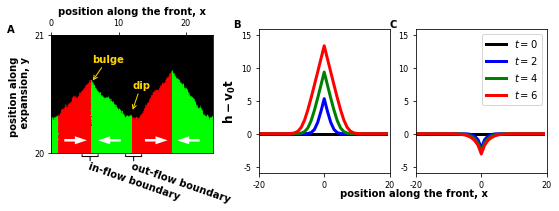

In [39]:
## from /Users/ashish/Downloads/wallmotion_figure/try2_compressed/N200/ch0.9/noise1/1/ca15.gz
import pandas as pd
fs=10 #fontzize
sfs=8#small fontsize
lw=1#linewidth
ms=3#markersize

mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
# mpl.rcParams['axes.textweight'] = "bold"
mpl.rcParams['axes.labelsize'] = sfs



fig = plt.figure(figsize=(8,2.75))
gs1 =GridSpec(1,1) 
gs2 =GridSpec(1,2)
gs1.update(left=0.12, right=0.4,bottom=0.25,top=0.85)
gs2.update(left=0.48, right=0.98, bottom=0.15)
ax=[]
ax.append([])
ax.append([])
ax.append([])
ax[0]=plt.subplot(gs1[0,0])
ax[1]=plt.subplot(gs2[0,0])
ax[2]=plt.subplot(gs2[0,1])






fold="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/bulge_and_dip_image_and_soln/"




#####the image is from bulge_dip figure, and the dip is not very visible
fold="/Users/ashish/Downloads/try2_compressed/N600/ch0.9/noise1/3/"
ca= pd.read_csv(fold+'ca.gz',sep=' ').values
c= pd.read_csv(fold+'c.gz',sep=' ').values
ca=np.array(ca)
c=np.array(c)  
print "dimensions of c are",len(c),len(c.T)
cb=c-ca 
x1,x2,y1,y2=[0,2400,1950,2050]
ca_zoom= ca[x1:x2,y1:y2]
c_zoom= c[x1:x2,y1:y2]
cb_zoom=c_zoom-ca_zoom


l= len(ca_zoom)
b=len(ca_zoom.T)
img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(ca_zoom[:,:])
img[:,:,1]=np.rot90(cb_zoom[:,:])
img3 = ax[0].imshow(img,aspect="auto") 


ticks=[0,1000,2000]
labels=[x1+0,x1+1000,x1+2000] 
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)
ticks=[0,100]
y1+=50 ## to make it whole number ticks
labels=[y1+100,y1+0] ## order reversed
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels)
ax[0].xaxis.tick_top()
ax[0].set_ylabel("position along \n expansion, y", fontsize=fs)

 
ax[0].annotate('', xy=(0.22, 0.11), xytext=(0.08, 0.11),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none',width=2.5, headwidth=8))
ax[0].annotate('', xy=(0.72, 0.11), xytext=(0.58, 0.11),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', width=2.5, headwidth=8))    
ax[0].annotate('', xy=(0.29, 0.11), xytext=(0.43, 0.11),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', width=2.5, headwidth=8))    
ax[0].annotate('', xy=(0.78, 0.11), xytext=(0.92, 0.11),xycoords='axes fraction',color='black',fontweight='bold',
            arrowprops=dict(facecolor='white',edgecolor='none', width=2.5, headwidth=8))    
######### plotting  bulge analytical    ####### 
lw=3#linewidth
mpl.rcParams['lines.linewidth'] = lw    
    
def h_x_t(x,t, k,d):
   return 2*d *math.log(math.exp ((k**2)*(t)/d - k*math.fabs(x)/d )*(1+math.erf(k*np.sqrt((t)/d)-math.fabs(x)/(2*math.sqrt(t*d))))  + math.erf(math.fabs(x)/(2*math.sqrt(t*d))))
  
def h_longtime_x_t(x,t, k,d):
   return 2*d *(((k**2)*(t)/d - k*math.fabs(x)/d )+math.log((1+math.erf(k*np.sqrt((t)/d)-math.fabs(x)/(2*math.sqrt(t*d))))))

def f_x_t(x,t,d,beta,a,b): ## a=1 b=0 or a=0 b=1, the concentrations at the domains basically.
    c=(a+b)/2   
    numerator=a*math.exp( (b-a)*x/(2*d) )*math.erfc( (x+ (c-b)*t)/(math.sqrt(4*d*t)) ) + b* math.erfc( (x+ (c-a)*t)/(math.sqrt(4*d*t)) ) 
    denominator=math.exp( (b-a)*x/(2*d) )*math.erfc( (x+ (c-b)*t)/(math.sqrt(4*d*t)) ) + math.erfc( (x+ (c-a)*t)/(math.sqrt(4*d*t)) ) 
    return (   numerator/denominator   )    


l=40
tval0=0
tval1=2
tval2=4
tval3=6
kval=1    #.1
dval=1   #.4
h=np.zeros(l) 
### for plotting bulge   ## 

h=np.zeros(l) 
ax[1].plot(h,'black', label="$t=$" +str(tval0))

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval1,kval,dval) 
ax[1].plot(h,'blue', label="$t=$" +str(tval1)) 
     
for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval2,kval,dval) 
ax[1].plot(h,'green', label="$t=$" +str(tval2)) 

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval3,kval,dval) 
ax[1].plot(h,'red', label="$t=$" +str(tval3)) 

# ax.set_xlabel('$\mathbf{x}$',fontsize = fs, fontweight='bold')
ax[1].set_ylabel('$\mathbf{h-v_0t}$',fontsize = fs*1.2, fontweight='bold') 


ax[1].set_xlim(0,l)
# ax.set_ylim(-np.max(h)/3,np.max(h)*1.1) 
ax[1].set_ylim(-6,16) 

# plt.legend(loc="best",fontsize = fs) 
ticks=[-5,0,5,10,15]
labels=[-5,0,5,10,15]
ax[1].set_yticks(ticks)
ax[1].set_yticklabels(labels)
ticks=[0,20,40]
labels=[-20,0,20]
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)

    



### for plotting dip   ##


h=np.zeros(l)
ax[2].plot(h,'black', label="$t=$" +str(tval0))

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval1,-kval,dval) 
ax[2].plot(h,'blue', label="$t=$" +str(tval1)) 

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval2,-kval,dval) 
ax[2].plot(h,'green', label="$t=$" +str(tval2)) 

for i in range(l):
    xval=l/2-i #centering     
    h[i]=  h_x_t(xval,tval3,-kval,dval) 
ax[2].plot(h,'red', label="$t=$" +str(tval3)) 
ax[2].legend(loc="best",fontsize = fs)   
# ax.set_xlabel('$\mathbf{x}$',fontsize = fs, fontweight='bold')
# ax.set_ylabel('$\mathbf{h-v_0t}$',fontsize = fs, fontweight='bold')    
ax[2].set_xlim(0,l)
ax[2].set_ylim(np.min(h)*1.5,-np.min(h)/3)


# ticks=[0,-2,-4]
# labels=[0,-2,-4]
ticks=[-5,0,5,10,15]
labels=[-5,0,5,10,15]
ax[2].set_ylim(-6,16)
ax[2].set_yticks(ticks)
ax[2].set_yticklabels(labels)
ticks=[0,20,40]
labels=[-20,0,20]
ax[2].set_xticks(ticks)
ax[2].set_xticklabels(labels)

ax[0].xaxis.set_label_position('top')
ax[0].set_xlabel("position along the front, x",fontweight="bold",fontsize=fs)
fig.text(0.75, 0.05,'position along the front, x', ha='center', va='center',fontweight="bold",fontsize=fs)
# fig.text(0.035, 0.5, 'position along the expansion direction, y', ha='center', va='center',fontweight="bold", rotation='vertical')


ax[0].set_title('A',y=0.97,x=-0.25,color='black',fontsize = fs, fontweight='bold')    
ax[1].set_title('B',y=0.97,x=-0.17,color='black',fontsize = fs, fontweight='bold')
ax[2].set_title('C',y=0.97,x=-0.17,color='black',fontsize = fs, fontweight='bold')

ax[0].annotate('bulge', xy=(0.25, 0.6), xytext=(0.25, 0.77),xycoords='axes fraction',color='gold',fontsize=fs,fontweight="bold",
            arrowprops=dict(arrowstyle="->",facecolor='black',edgecolor='gold'))
ax[0].annotate('dip', xy=(0.5, 0.35), xytext=(0.5, 0.55),xycoords='axes fraction',color='gold',fontsize=fs,fontweight="bold",
            arrowprops=dict(arrowstyle="->",facecolor='black',edgecolor='gold'))
# ax[0].text(0.22, 0.05,'x',transform=ax[0].transAxes,color='black',fontweight='bold',ha='left')#,rotation='vertical',)
# ax[0].text(0.02, 0.15,'y',transform=ax[0].transAxes,color='black',fontweight='bold',ha='left')#,rotation='vertical',)

ax[0].annotate('', xy=(0.24, -0.01), xytext=(0.24, -0.08),xycoords='axes fraction',color='black',fontsize=fs-2, fontweight="bold"
               ,ha='right', rotation=30,
            arrowprops=dict(arrowstyle='-[, widthB=1.0, lengthB=0.25,angleB=0',edgecolor='black'))
ax[0].annotate('', xy=(0.51, -0.01), xytext=(0.51, -0.08),xycoords='axes fraction',color='black',fontsize=fs-2, fontweight="bold"
               ,ha='center',
            arrowprops=dict(arrowstyle='-[, widthB=1.0, lengthB=0.25,angleB=0',edgecolor='black'))

ax[0].text(0.22, -0.065 ,'in-flow boundary',fontsize=fs, fontweight="bold",
        horizontalalignment='left',
        verticalalignment='top',
        rotation=-19,transform=ax[0].transAxes
        )
ax[0].text(0.49, -0.06 ,'out-flow boundary',fontsize=fs, fontweight="bold",
        horizontalalignment='left',
        verticalalignment='top',
        rotation=-19,transform=ax[0].transAxes
        ) 

destfold='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/bulge_and_dip_image_and_soln/'

plt.savefig(destfold+"bulge_dip_3inrow_opt2.pdf")    
plt.show()




## Fig 5 initial conditions for wall motion figure with rescaled ticks

In [3]:
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/wall_motion_figure/'
path='/Users/ashish/Downloads/gdnoise_paper_figure_boundary motion/try2_bigr_compressed/N200/ch0.9/noise1/2/'

import pandas as pd
fs=14 *6 #fontsize

lw=2*2 *6#linewidth



fold = path

filename="ca0"
filename_c="c0"
print("opening")
ca= pd.read_csv(fold+filename+'.gz',sep=' ').values
c= pd.read_csv(fold+filename_c+'.gz',sep=' ').values
print("opened")
ca=np.array(ca)
c=np.array(c) 
l= len(ca)
b=len(ca.T)
cb=c-ca

fig3, ax = plt.subplots(nrows=1, ncols=1, figsize=(l/1000,b/1000))   
img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img3 = ax.imshow(img,aspect="equal")  

ticks=[6400,4400,2400,400]
labels=[0,2000,4000,6000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax.set_yticks(ticks)
ax.set_yticklabels(labels,fontsize=fs)
ticks=[0,1000,2000]
labels=[0,1000,2000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax.set_xticks(ticks)
ax.set_xticklabels(labels,fontsize=fs)
ax.tick_params(axis='y', pad=15)
ax.tick_params(axis='x', pad=15)
if not os.path.isdir(destpath): os.makedirs(destpath)
plt.savefig(destpath+'initial_conditions.png')
plt.show()

opening


KeyboardInterrupt: 

### Fig 6 Fstar-Fbar

0.9926718530029982


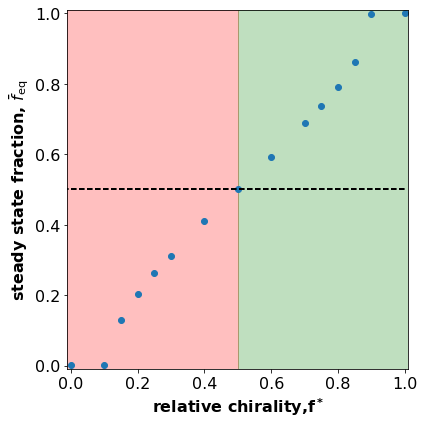

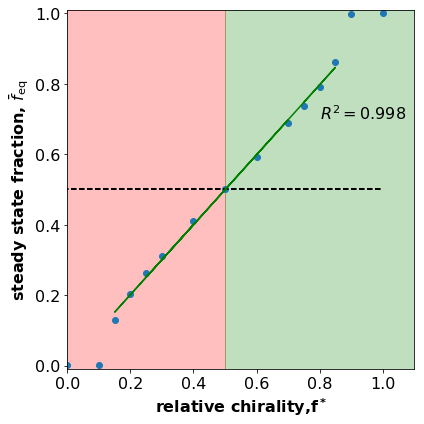

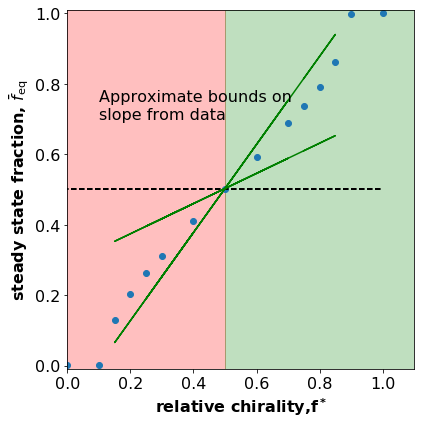

In [18]:
destpath="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/fstar_fbar/"
path='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/fbar_fstar_coexistence/fstar_avg/gdnoise9/'
from scipy import stats
ms=8
fs=16
lw=2
if not os.path.exists(destpath): os.makedirs(destpath) 
fbar=np.loadtxt(path+'fbar_fstar.txt')
xaxis=np.loadtxt(path+'fbar_fstar_xaxis.txt')


fig = plt.figure(figsize=(6,6))  
ax = fig.add_subplot(111)
plt.plot(xaxis,fbar,'o')
#ax.fill_between(0, 0.0, 1.0, facecolor='yellow', alpha=0.5,label='1 sigma range')
ax.axvspan(-0.01, 0.5, alpha=0.25, color='red')
ax.axvspan(0.5, np.max(xaxis)*1.1, alpha=0.25, color='green')
ax.set_ylim(-0.01,1.01)
ax.set_xlim(-0.01,1.01)
ax.plot([-1, 1], [0.5, 0.50],'black', linestyle='--',linewidth =lw)
#ax.plot([-1, 1], [1.0, 1.0],'black', linestyle='-',linewidth =lw)
#ax.plot([-1,1], [0.0, 0.0],'black', linestyle='-',linewidth =lw)
#plt.xlabel('chirality difference, $\\frac{\\chi_a}{\\chi_a-\\chi_b}$',fontsize = fs,fontweight='bold')
plt.xlabel('relative chirality,$ \\mathbf{f^*}$',fontsize = fs, fontweight='bold')
plt.ylabel('steady state fraction, $\\bar{f}_{\\mathrm{eq}}$',fontsize = fs, fontweight='bold') 
plt.tick_params(axis='both', which='major', labelsize=fs) 
plt.tight_layout()
plt.savefig(destpath+'fbar_fstar_vs_chirality.pdf')
plt.savefig(destpath+'fbar_fstar_vs_chirality.png')


idx_subset=np.intersect1d(np.where(fbar>0.01)[0],np.where(fbar<.99)[0])
x_subset=xaxis[idx_subset]
y_subset=fbar[idx_subset]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_subset, y_subset)


fig = plt.figure(figsize=(6,6))  
ax = fig.add_subplot(111)
plt.plot(xaxis,fbar,'o')
ax.axvspan(np.min(xaxis)*1.1, 0.5, alpha=0.25, color='red')
ax.axvspan(0.5, np.max(xaxis)*1.1, alpha=0.25, color='green')
ax.set_ylim(-0.01,1.01)
ax.set_xlim(np.min(xaxis)*1.1,np.max(xaxis)*1.1)
ax.plot([-1, 1], [0.5, 0.50],'black', linestyle='--',linewidth =lw)
ax.plot(x_subset, intercept+slope*x_subset,'g-')
ax.text(0.8, 0.7,"$R^2 =$" +"{:.3f}".format(r_value**2),fontsize = fs)
plt.xlabel('relative chirality,$\\mathbf{f^*}$',fontsize = fs, fontweight='bold')
plt.ylabel('steady state fraction, $\\bar{f}_{\\mathrm{eq}}$',fontsize = fs, fontweight='bold') 
plt.tick_params(axis='both', which='major', labelsize=fs) 
plt.tight_layout()
plt.savefig(destpath+'fbar_fstar_subset_vs_chirality.pdf')
print slope

alphaD_UB=0.35
alphaD_LB=0.12
betaV=0.15
slope_UB=betaV/alphaD_LB
slope_LB=betaV/alphaD_UB
fig = plt.figure(figsize=(6,6))  
ax = fig.add_subplot(111)
plt.plot(xaxis,fbar,'o')
ax.axvspan(np.min(xaxis)*1.1, 0.5, alpha=0.25, color='red')
ax.axvspan(0.5, np.max(xaxis)*1.1, alpha=0.25, color='green')
ax.set_ylim(-0.01,1.01)
ax.set_xlim(np.min(xaxis)*1.1,np.max(xaxis)*1.1)
ax.plot([-1, 1], [0.5, 0.50],'black', linestyle='--',linewidth =lw)
ax.plot(x_subset, 0.5+intercept+slope_UB*(x_subset-0.5),'g-')
ax.plot(x_subset,0.5+  intercept+slope_LB*(x_subset-0.5),'g-')
ax.text(0.1, 0.7,"Approximate bounds on\nslope from data",fontsize = fs)
plt.xlabel('relative chirality,$ \\mathbf{f^*}$',fontsize = fs, fontweight='bold')
plt.ylabel('steady state fraction, $\\bar{f}_{\\mathrm{eq}}$',fontsize = fs, fontweight='bold') 
plt.tick_params(axis='both', which='major', labelsize=fs) 
plt.tight_layout()
plt.savefig(destpath+'fbar_fstar_Prediction_vs_chirality.pdf')

plt.show()

## Fig 7 mixing transition and selection exists when mixing doesn't  w.r.t. N

blahahaa


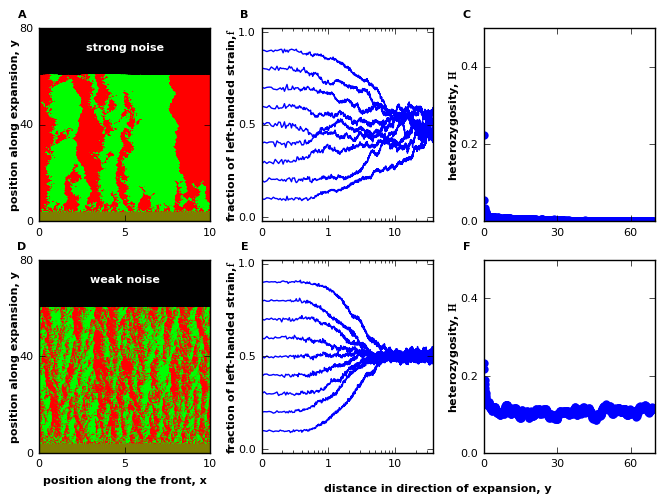

In [4]:
import pandas as pd
import matplotlib as mpl
fs=8 #fontzize
sfs=4#small fontsize
lw=1#linewidth
ms=3#markersize
mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
mpl.rcParams['axes.labelsize'] = fs

destpath="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/selection_and_mixing_wrt_N/"

# image_demixed="/Volumes/Ashish_backup/research data/new_figures/neutralHdecay/images/gdnoise/try3/h0.5/N40/ch0.075/2/"
# image_mixed="/Volumes/Ashish_backup/research data/new_figures/neutralHdecay/images/gdnoise/try3/h0.5/N320/ch0.075/2/"
image_demixed="/Volumes/Ashish_backup/research data/new_figures/neutralHdecay/images/gdnoise/try4/h0.5/N40/ch0.075/2/"
image_mixed="/Volumes/Ashish_backup/research data/new_figures/neutralHdecay/images/gdnoise/try4/h0.5/N320/ch0.075/2/"




#### ftime curves require ftime files made by new_fstar_avg_cluster_conditional.py in the fstar folder on the cluster
    ## these ftime files are made separately for each different N
    ## for compiling them into one array that is used in this code, and a quick way to plot them is new_fstar_fbar_fig.py run on neutral hdecay runs starting at different fractions
ftime_fold="/Volumes/Ashish_backup/research data/new_figures/neutralHdecay/N/gdnoise/ftime_4_avg/"
het_time_fold="/Volumes/Ashish_backup/research data/new_figures/neutralHdecay/N/gdnoise/try2_avg/"
# het_time_fold="/Volumes/Ashish_backup/research data/new_figures/neutralHdecay/N/gdnoise/try2_singlerun_avg/"


# semilog_scale_flag=1
# if semilog_scale_flag==1:
#     fig_name="semilog_selection_and_mixing_wrt_N_nwm.pdf"
# else:
#     fig_name="selection_and_mixing_wrt_N_nwm.pdf"


fig_name="s_mix_wrt_N"
ftime_axis_scaling="A"
## "" is no rescaling, A is log on x axis, B is sqrt on xaxis "

het_time_axis_scaling=""
## "" is no rescaling, A is log y axis, B is ^het_power on y axis ,C is ^het_power on y and log on x "
het_power=0.5
fig_name=fig_name+"_"+ftime_axis_scaling+"_"+het_time_axis_scaling+".pdf"

    


fig = plt.figure(figsize=(7,5))
gs1 =GridSpec(2,3 ) 
# gs2 =GridSpec(1,1)
# gs2.update(left=0.7, right=0.98,top=0.96,bottom =0.16, wspace=0.1)
gs1.update(left=0.1, right=0.98,bottom=0.1,top=0.95,wspace=0.3)
ax=[]
ax.append([])
ax.append([])
ax.append([])
ax.append([])
ax.append([])
ax.append([])
ax[0]=plt.subplot(gs1[0,0])
ax[1]=plt.subplot(gs1[0,1])
ax[2]=plt.subplot(gs1[0,2])
ax[3]=plt.subplot(gs1[1,0])
ax[4]=plt.subplot(gs1[1,1])
ax[5]=plt.subplot(gs1[1,2])

print ("blahahaa")
####### plotting images #######
ca=np.array(pd.read_csv(image_demixed+'ca3.txt',sep=' ').values)
c= np.array(pd.read_csv(image_demixed+'c3.txt',sep=' ').values)
cb=c-ca

l= len(ca)
b=len(ca.T)
img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img3 = ax[0].imshow(img,aspect="auto")
ca=np.array(pd.read_csv(image_mixed+'ca3.txt',sep=' ').values)
c= np.array(pd.read_csv(image_mixed+'c3.txt',sep=' ').values)
cb=c-ca

l= len(ca)
b=len(ca.T)
img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img3 = ax[3].imshow(img,aspect="auto")

ticks=[0,4000,8000]
labels=[8000,4000,0]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels,fontsize=fs)
ax[3].set_yticks(ticks)
ax[3].set_yticklabels(labels,fontsize=fs)

ticks=[0,500,1000]
labels=[0,500,1000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels,fontsize=fs)
ax[3].set_xticks(ticks)
ax[3].set_xticklabels(labels,fontsize=fs)

ax[0].set_ylabel("position along expansion, y",fontsize = fs,fontweight='bold',labelpad=-0.5)
ax[3].set_ylabel("position along expansion, y",fontsize = fs,fontweight='bold',labelpad=-0.5)
ax[3].set_xlabel("position along the front, x",fontsize = fs,fontweight='bold')


####### plotting ftime curves #######
cutoff_ftime=6000

f_time=np.loadtxt(ftime_fold+"fraction_ch40.0.txt")

xaxis=np.arange(len(np.asarray(f_time[0])))+10
for i in range(len(np.asarray(f_time))):
    cutoff_ftime=len(f_time[i])
    if ftime_axis_scaling=="":
        ax[1].plot(xaxis[:cutoff_ftime],f_time[i][:cutoff_ftime],'b-')
    elif ftime_axis_scaling=="A":
        ax[1].semilogx(xaxis[:cutoff_ftime],f_time[i][:cutoff_ftime],'b-')
    elif ftime_axis_scaling=="B":
        ax[1].plot(np.sqrt(xaxis[:cutoff_ftime]),f_time[i][:cutoff_ftime],'b-')

f_time=np.loadtxt(ftime_fold+"fraction_ch320.0.txt")

xaxis=np.arange(len(np.asarray(f_time[0])))+10
for i in range(len(np.asarray(f_time))):
    cutoff_ftime=len(f_time[i])
    if ftime_axis_scaling=="":
        ax[4].plot(xaxis[:cutoff_ftime],f_time[i][:cutoff_ftime],'b-')
    elif ftime_axis_scaling=="A":
        ax[4].semilogx(xaxis[:cutoff_ftime],f_time[i][:cutoff_ftime],'b-')
    elif ftime_axis_scaling=="B":
        ax[4].plot(np.sqrt(xaxis[:cutoff_ftime]),f_time[i][:cutoff_ftime],'b-')


        
if ftime_axis_scaling=="":
    ticks=[0,1000,2000,3000]
    labels=[0,1000,2000,3000]
    labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
    ax[1].set_xlim(0.0,30.)
    ax[4].set_xlim(0.0,30.)
    ax[1].set_xticks(ticks)
    ax[1].set_xticklabels(labels,fontsize=fs)
    ax[4].set_xticks(ticks)
    ax[4].set_xticklabels(labels,fontsize=fs)
elif ftime_axis_scaling=="A":
    ticks=[10,100,1000]
    labels=[10,100,1000]
    labels[:] = [x / unit_conversion for x in labels]
    ax[1].set_xticks(ticks)
    ax[1].set_xticklabels(labels,fontsize=fs)
    ax[4].set_xticks(ticks)
    ax[4].set_xticklabels(labels,fontsize=fs)  
    ax[4].set_xlim(0.0,3600)
    ax[1].set_xlim(0.0,3600)
elif ftime_axis_scaling=="B":
#     ticks=[10,100,1000]
#     labels=[10,100,1000]
#     labels[:] = [x / unit_conversion for x in labels]
    sqrt_xtick_labels=[0,1,4,9,16,25,36]
    ax[1].set_xticks( np.sqrt(sqrt_xtick_labels)*math.sqrt(unit_conversion) )
    ax[1].set_xticklabels(sqrt_xtick_labels)
    ax[4].set_xticks( np.sqrt(sqrt_xtick_labels)*math.sqrt(unit_conversion) )
    ax[4].set_xticklabels(sqrt_xtick_labels)
    ax[4].set_xlim(0.0,60)
    ax[1].set_xlim(0.0,60)

#     ax[1].set_xticks(ticks)
#     ax[1].set_xticklabels(labels,fontsize=fs)
#     ax[4].set_xticks(ticks)
#     ax[4].set_xticklabels(labels,fontsize=fs)        
        

ax[1].set_ylim(-0.02,1.02)
ax[1].set_yticks([0,0.5,1.0])
# ax[1].set_xticks([0,300,600])
# ax[1].set_xlabel("distance in direction of expansion,$\\mathbf{y}$",fontsize = fs,fontweight='bold')
ax[1].set_ylabel("fraction of left-handed strain,$\\mathbf{f}$",fontsize = fs,fontweight='bold',labelpad=-0.5)
ax[1].tick_params(axis='both', which='major', labelsize=fs)
ax[4].set_ylim(-0.02,1.02)
ax[4].set_yticks([0,0.5,1.0])
# ax[4].set_xticks([0,300,600])
# ax[4].set_xlabel("distance in direction of expansion,$\\mathbf{y}$",fontsize = fs,fontweight='bold')
ax[4].set_ylabel("fraction of left-handed strain,$\\mathbf{f}$",fontsize = fs,fontweight='bold',labelpad=-0.5)
ax[4].tick_params(axis='both', which='major', labelsize=fs)




###### het time plots ######
cutoff_hettime=80000

lexp=len( np.loadtxt(het_time_fold+"h0.5/N40/ch0.075/HET_spatial_time.txt") )
het_time=np.loadtxt(het_time_fold+"h0.5/N40/ch0.075/HET_time.txt")

xaxis=np.linspace(10.0,lexp,num=len(het_time))
sqrt_ytick_labels=[0.0,0.01,0.04,0.09,0.16,0.25,0.36]
if het_time_axis_scaling=="A":
    ax[2].semilogy(xaxis[:cutoff_hettime],het_time[:cutoff_hettime],'bo',markeredgecolor="none",markevery=100)
    ax[2].set_ylim(0.001,1.0)
elif het_time_axis_scaling=="":
    ax[2].plot(xaxis[:cutoff_hettime],het_time[:cutoff_hettime],'bo',markeredgecolor="none",markevery=100)
    ax[2].set_yticks([0,0.2,0.4])
    ax[2].set_ylim(0,0.5)
elif het_time_axis_scaling=="B":
    ax[2].plot(xaxis[:cutoff_hettime],np.power(het_time[:cutoff_hettime],het_power),'bo',markeredgecolor="none",markevery=100)    
    ax[2].set_yticks( np.sqrt(sqrt_ytick_labels) )
    ax[2].set_yticklabels(sqrt_ytick_labels)
    ax[2].set_ylim(0,0.7)
elif het_time_axis_scaling=="C":
    ax[2].semilogx(xaxis[:cutoff_hettime],np.power(het_time[:cutoff_hettime],het_power),'bo',markeredgecolor="none",markevery=100)
    ax[2].set_yticks( np.sqrt(sqrt_ytick_labels) )
    ax[2].set_yticklabels(sqrt_ytick_labels)
    ax[2].set_ylim(0,0.7)
    
    
lexp=len( np.loadtxt(het_time_fold+"h0.5/N40/ch0.075/HET_spatial_time.txt") )
het_time=np.loadtxt(het_time_fold+"h0.5/N320/ch0.075/HET_time.txt")

xaxis=np.linspace(10.0,lexp,num=len(het_time))

if het_time_axis_scaling=="A":
    ax[5].semilogy(xaxis[:cutoff_hettime],het_time[:cutoff_hettime],'bo',markeredgecolor="none",markevery=100)
    ax[5].set_ylim(0.001,1.0)
elif het_time_axis_scaling=="":
    ax[5].plot(xaxis[:cutoff_hettime],het_time[:cutoff_hettime],'bo',markeredgecolor="none",markevery=100)
    ax[5].set_yticks([0,0.2,0.4])
    ax[5].set_ylim(0,0.5)
elif het_time_axis_scaling=="B":
    ax[5].plot(xaxis[:cutoff_hettime],np.power(het_time[:cutoff_hettime],het_power),'bo',markeredgecolor="none",markevery=100)
    ax[5].set_yticks( np.sqrt(sqrt_ytick_labels) )
    ax[5].set_yticklabels(sqrt_ytick_labels)
    ax[5].set_ylim(0,0.7)
elif het_time_axis_scaling=="C":
    ax[5].semilogx(xaxis[:cutoff_hettime],np.power(het_time[:cutoff_hettime],het_power),'bo',markeredgecolor="none",markevery=100)
#     ax[5].set_yticks([0,0.2,0.4,0.6])    
    ax[5].set_yticks( np.sqrt(sqrt_ytick_labels) )
    ax[5].set_yticklabels(sqrt_ytick_labels)
    ax[5].set_ylim(0,0.7)

    
# ax[2].set_xlabel("$\\mathbf{t}$",fontsize = fs,fontweight='bold')
ax[2].set_ylabel("heterozygosity, $\\mathbf{H}$",fontsize = fs,fontweight='bold',labelpad=-0.5)
# ax[5].set_xlabel("$\\mathbf{t}$",fontsize = fs,fontweight='bold')
ax[5].set_ylabel("heterozygosity, $\\mathbf{H}$",fontsize = fs,fontweight='bold',labelpad=-0.5)
ax[5].tick_params(axis='both', which='major', labelsize=fs)
ax[2].tick_params(axis='both', which='major', labelsize=fs)
if het_time_axis_scaling!="C" and het_time_axis_scaling!="D" :
    ticks=[0,3000,6000]
    labels=[0,3000,6000]
    labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
    ax[2].set_xticks(ticks)
    ax[2].set_xticklabels(labels,fontsize=fs)
    ax[5].set_xticks(ticks)
    ax[5].set_xticklabels(labels,fontsize=fs)




# ax[0].text(0.22, -0.065 ,'in-flow boundary',fontsize=fs, fontweight="bold",
#         horizontalalignment='left',
#         verticalalignment='top',
#         rotation=-19,transform=ax[0].transAxes
#         )

# ax[0].text(-0.5, 0.0 ,'strong noise',horizontalalignment='center',verticalalignment='center',rotation='vertical',fontsize=fs, fontweight="bold")


fig.text(0.67, 0.03,"distance in direction of expansion, y",fontsize = fs,fontweight='bold', ha='center', va='center')

# ax[1].set_title('fraction of left-handed strain, $\\mathbf{f(t)}$',y=1.05,x=0.5,fontsize = fs,weight='bold')
# ax[2].set_title('heterozygosity, $\\mathbf{H(t)}$',y=1.05,x=0.5,fontsize = fs,weight='bold')


ax[0].text(0.5, 0.9 ,'strong noise',horizontalalignment='center',verticalalignment='center',fontsize=fs,color="white", fontweight="bold",transform=ax[0].transAxes)
ax[3].text(0.5, 0.9 ,'weak noise',horizontalalignment='center',verticalalignment='center',fontsize=fs,color="white", fontweight="bold",transform=ax[3].transAxes)



ax[0].set_title('A',y=1.02,x=-0.1,fontsize = fs,weight='bold')
ax[1].set_title('B',y=1.02,x=-0.1,fontsize = fs,weight='bold')
ax[2].set_title('C',y=1.02,x=-0.1,fontsize = fs,weight='bold')
ax[3].set_title('D',y=1.02,x=-0.1,fontsize = fs,weight='bold')
ax[4].set_title('E',y=1.02,x=-0.1,fontsize = fs,weight='bold')
ax[5].set_title('F',y=1.02,x=-0.1,fontsize = fs,weight='bold')

plt.savefig(destpath+fig_name)

plt.show()

## Fig 7 Selection exists when mixing doesnt: Mixing and sel images wrt N, het wrt N and \chi 

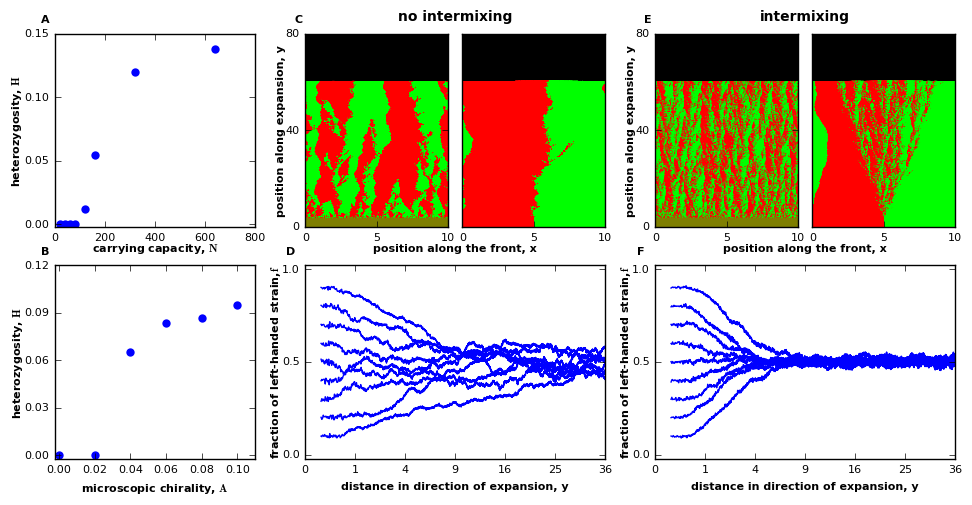

In [5]:
import pandas as pd
import matplotlib as mpl
fs=8 #fontzize
sfs=4#small fontsize
lw=1#linewidth
ms=3#markersize
mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
mpl.rcParams['axes.labelsize'] = fs


destpath="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/selection_N_and_mixing_N_ch/"

image_demixed_from_wm="/Volumes/Ashish_backup/research data/new_figures/neutralHdecay/images/gdnoise/try4/h0.5/N40/ch0.075/3/"
image_mixed_from_wm="/Volumes/Ashish_backup/research data/new_figures/neutralHdecay/images/gdnoise/try4/h0.5/N320/ch0.075/2/"
image_demixed_from_nwm="/Volumes/Ashish_backup/research data/new_figures/neutralHdecay/images/gdnoise/try4_nwm/h0.5/N40/ch0.075/1/"
image_mixed_from_nwm="/Volumes/Ashish_backup/research data/new_figures/neutralHdecay/images/gdnoise/try4_nwm/h0.5/N320/ch0.075/1/"
#### ftime curves require ftime files made by new_fstar_avg_cluster_conditional.py in the fstar folder on the cluster
    ## these ftime files are made separately for each different N
    ## for compiling them into one array that is used in this code, and a quick way to plot them is new_fstar_fbar_fig.py run on neutral hdecay runs starting at different fractions
ftime_fold="/Volumes/Ashish_backup/research data/new_figures/neutralHdecay/N/gdnoise/ftime_4_avg/"

het_ch_fold="/Volumes/Ashish_backup/research data/new_figures/neutralHdecay/ch/gdnoise/try1/h0.5/"
het_N_fold="/Volumes/Ashish_backup/research data/new_figures/neutralHdecay/N/gdnoise/try2_avg_withLonger runs for 80 and 120/h0.5/"

fig_name="sel_N_mixing_chN"
image_order=1 ##### 0 for demixed images, het figures, mixed images
              ##### 1 for het figures, demixed images,  mixed images
              ##### 2 for  demixed images,  mixed images,het figures,
ftime_axis_scaling="B"
## "" is no rescaling (linear), A is log on x axis, B is sqrt on xaxis "
fig_name=fig_name+"_"+str(image_order)+"_"+ftime_axis_scaling+".pdf"

    


fig = plt.figure(figsize=(10,5))
if image_order==0:
    gs1 =GridSpec(2,2 ) 
    gs1.update(left=0.05, right=0.35,bottom=0.1,top=0.95,wspace=0.1,hspace=0.2)
    gs2 =GridSpec(2,1 ) 
    gs2.update(left=0.4, right=0.6,bottom=0.1,top=0.95,wspace=0.1,hspace=0.2)
    gs3 =GridSpec(2,2 ) 
    gs3.update(left=0.65, right=0.95,bottom=0.1,top=0.95,wspace=0.1,hspace=0.2)
elif image_order==1:
    gs1 =GridSpec(2,2 ) 
    gs1.update(left=0.3, right=0.6,bottom=0.1,top=0.95,wspace=0.1,hspace=0.2)
    gs2 =GridSpec(2,1 ) 
    gs2.update(left=0.05, right=0.25,bottom=0.1,top=0.95,wspace=0.1,hspace=0.2)
    gs3 =GridSpec(2,2 ) 
    gs3.update(left=0.65, right=0.95,bottom=0.1,top=0.95,wspace=0.1,hspace=0.2)
elif image_order==2:
    gs1 =GridSpec(2,2 ) 
    gs1.update(left=0.05, right=0.35,bottom=0.1,top=0.95,wspace=0.1,hspace=0.2)
    gs2 =GridSpec(2,1 ) 
    gs2.update(left=0.75, right=0.95,bottom=0.1,top=0.95,wspace=0.1,hspace=0.2)
    gs3 =GridSpec(2,2 ) 
    gs3.update(left=0.4, right=0.7,bottom=0.1,top=0.95,wspace=0.1,hspace=0.2)

ax1_wm=plt.subplot(gs1[0,0])
ax1_nwm=plt.subplot(gs1[0,1])
ax1_f=plt.subplot(gs1[1,:])
ax2_N=plt.subplot(gs2[0,0])
ax2_ch=plt.subplot(gs2[1,0])
ax3_wm=plt.subplot(gs3[0,0])
ax3_nwm=plt.subplot(gs3[0,1])
ax3_f=plt.subplot(gs3[1,:])
#########################################

########## colony images   ##################
ca=np.array(pd.read_csv(image_demixed_from_wm+'ca3.txt',sep=' ').values)
c= np.array(pd.read_csv(image_demixed_from_wm+'c3.txt',sep=' ').values)
cb=c-ca

l= len(ca)
b=len(ca.T)

################ for image from folder /3/ rolling makes it look nicer, from /2/ you dont need to roll
ca=np.roll(ca,-l/5,axis=0)
cb=np.roll(cb,-l/5,axis=0)



img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img3 = ax1_wm.imshow(img,aspect="auto")


ca=np.array(pd.read_csv(image_mixed_from_wm+'ca3.txt',sep=' ').values)
c= np.array(pd.read_csv(image_mixed_from_wm+'c3.txt',sep=' ').values)
cb=c-ca

l= len(ca)
b=len(ca.T)
img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img3 = ax3_wm.imshow(img,aspect="auto")

ticks=[0,4000,8000]
labels=[8000,4000,0]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax1_wm.set_yticks(ticks)
ax1_wm.set_yticklabels(labels,fontsize=fs)
ax3_wm.set_yticks(ticks)
ax3_wm.set_yticklabels(labels,fontsize=fs)

ticks=[0,500,1000]
labels=[0,500,1000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax1_wm.set_xticks(ticks)
ax1_wm.set_xticklabels(labels,fontsize=fs)
ax3_wm.set_xticks(ticks)
ax3_wm.set_xticklabels(labels,fontsize=fs)


ca=np.array(pd.read_csv(image_demixed_from_nwm+'ca3.txt',sep=' ').values)
c= np.array(pd.read_csv(image_demixed_from_nwm+'c3.txt',sep=' ').values)
cb=c-ca

l= len(ca)
b=len(ca.T)
img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img3 = ax1_nwm.imshow(img,aspect="auto")
ca=np.array(pd.read_csv(image_mixed_from_nwm+'ca3.txt',sep=' ').values)
c= np.array(pd.read_csv(image_mixed_from_nwm+'c3.txt',sep=' ').values)
cb=c-ca

l= len(ca)
b=len(ca.T)
img = np.zeros((b,l,3))
img[:,:,0]=np.rot90(ca[:,:])
img[:,:,1]=np.rot90(cb[:,:])
img3 = ax3_nwm.imshow(img,aspect="auto")

# ticks=[0,4000,8000]
# labels=[8000,4000,0]
# labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
# ax1_nwm.set_yticks(ticks)
# ax1_nwm.set_yticklabels(labels,fontsize=fs)
# ax3_nwm.set_yticks(ticks)
# ax3_nwm.set_yticklabels(labels,fontsize=fs)
ax1_nwm.set_yticks([])
ax3_nwm.set_yticks([])


ticks=[0,500,1000]
labels=[0,500,1000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax1_nwm.set_xticks(ticks)
ax1_nwm.set_xticklabels(labels,fontsize=fs)
ax3_nwm.set_xticks(ticks)
ax3_nwm.set_xticklabels(labels,fontsize=fs)


####### plotting ftime curves #######
cutoff_ftime=6000
f_time=np.loadtxt(ftime_fold+"fraction_ch40.0.txt")
xaxis=np.arange(len(np.asarray(f_time[0])))+10
for i in range(len(np.asarray(f_time))):
    cutoff_ftime=len(f_time[i])
    if ftime_axis_scaling=="":
        ax1_f.plot(xaxis[:cutoff_ftime],f_time[i][:cutoff_ftime],'b-')
    elif ftime_axis_scaling=="A":
        ax1_f.semilogx(xaxis[:cutoff_ftime],f_time[i][:cutoff_ftime],'b-')
    elif ftime_axis_scaling=="B":
        ax1_f.plot(np.sqrt(xaxis[:cutoff_ftime]),f_time[i][:cutoff_ftime],'b-')

f_time=np.loadtxt(ftime_fold+"fraction_ch320.0.txt")

xaxis=np.arange(len(np.asarray(f_time[0])))+10
for i in range(len(np.asarray(f_time))):
    cutoff_ftime=len(f_time[i])
    if ftime_axis_scaling=="":
        ax3_f.plot(xaxis[:cutoff_ftime],f_time[i][:cutoff_ftime],'b-')
    elif ftime_axis_scaling=="A":
        ax3_f.semilogx(xaxis[:cutoff_ftime],f_time[i][:cutoff_ftime],'b-')
    elif ftime_axis_scaling=="B":
        ax3_f.plot(np.sqrt(xaxis[:cutoff_ftime]),f_time[i][:cutoff_ftime],'b-')

if ftime_axis_scaling=="":
    ticks=[0,1000,2000,3000]
    labels=[0,1000,2000,3000]
    labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
    ax1_f.set_xlim(0.0,30.)
    ax3_f.set_xlim(0.0,30.)
    ax1_f.set_xticks(ticks)
    ax1_f.set_xticklabels(labels,fontsize=fs)
    ax3_f.set_xticks(ticks)
    ax3_f.set_xticklabels(labels,fontsize=fs)
elif ftime_axis_scaling=="A":
    ticks=[10,100,1000]
    labels=[10,100,1000]
    labels[:] = [x / unit_conversion for x in labels]
    ax1_f.set_xticks(ticks)
    ax1_f.set_xticklabels(labels,fontsize=fs)
    ax3_f.set_xticks(ticks)
    ax3_f.set_xticklabels(labels,fontsize=fs)  
    ax3_f.set_xlim(0.0,3600)
    ax1_f.set_xlim(0.0,3600)
elif ftime_axis_scaling=="B":
#     ticks=[10,100,1000]
#     labels=[10,100,1000]
#     labels[:] = [x / unit_conversion for x in labels]
    sqrt_xtick_labels=[0,1,4,9,16,25,36]
    ax1_f.set_xticks( np.sqrt(sqrt_xtick_labels)*math.sqrt(unit_conversion) )
    ax1_f.set_xticklabels(sqrt_xtick_labels)
    ax3_f.set_xticks( np.sqrt(sqrt_xtick_labels)*math.sqrt(unit_conversion) )
    ax3_f.set_xticklabels(sqrt_xtick_labels)
    ax3_f.set_xlim(0.0,60)
    ax1_f.set_xlim(0.0,60)

#     ax1_f.set_xticks(ticks)
#     ax1_f.set_xticklabels(labels,fontsize=fs)
#     ax3_f.set_xticks(ticks)
#     ax3_f.set_xticklabels(labels,fontsize=fs)        
        
ax1_f.set_ylim(-0.02,1.02)
ax1_f.set_yticks([0,0.5,1.0])
# ax1_f.set_xticks([0,300,600])
# ax1_f.set_xlabel("distance in direction of expansion,$\\mathbf{y}$",fontsize = fs,fontweight='bold')
ax1_f.set_ylabel("fraction of left-handed strain,$\\mathbf{f}$",fontsize = fs,fontweight='bold',labelpad=-0.5)
ax1_f.tick_params(axis='both', which='major', labelsize=fs)
ax3_f.set_ylim(-0.02,1.02)
ax3_f.set_yticks([0,0.5,1.0])
# ax3_f.set_xticks([0,300,600])
# ax3_f.set_xlabel("distance in direction of expansion,$\\mathbf{y}$",fontsize = fs,fontweight='bold')
ax3_f.set_ylabel("fraction of left-handed strain,$\\mathbf{f}$",fontsize = fs,fontweight='bold',labelpad=-0.5)
ax3_f.tick_params(axis='both', which='major', labelsize=fs)
#######################################################


######## Het _ch and Het_N #########


het_N=np.loadtxt(het_N_fold+"het_ss.txt")
N_list=np.loadtxt(het_N_fold+"chirality.txt")
ax2_N.plot(N_list,het_N,'bo',markeredgecolor="none")
ax2_N.set_ylim(-0.002,0.15)
ax2_N.set_yticks([0.00,0.05,0.10,0.15 ])
ax2_N.set_xticks([0,200,400,600,800 ])
ax2_N.tick_params(axis='both', which='major', labelsize=fs)
ax2_ch.set_xlim(0,900)

het_ch=np.loadtxt(het_ch_fold+"het_ss.txt")
ch_list=np.loadtxt(het_ch_fold+"chirality.txt")
ax2_ch.plot(ch_list,het_ch,'bo',markeredgecolor="none")
ax2_ch.set_ylim(-0.002,0.12)
ax2_ch.set_xlim(-0.002,0.11)
ax2_ch.set_yticks([0.00,0.03,0.06,0.09,0.12])
ax2_ch.set_xticks([0.00,0.02,0.04, 0.06,0.08,0.1 ])
ax2_ch.tick_params(axis='both', which='major', labelsize=fs)


######## axes labels and things   #########
ax2_N.set_ylabel("heterozygosity, $\\mathbf{H}$",fontsize = fs,fontweight='bold',labelpad=0.5)
ax2_N.set_xlabel("carrying capacity, $\\mathbf{N}$",fontsize = fs,fontweight='bold',labelpad=-0.2)
ax2_ch.set_ylabel("heterozygosity, $\\mathbf{H}$",fontsize = fs,fontweight='bold',labelpad=-0.5)
ax2_ch.set_xlabel("microscopic chirality, $\\mathbf{A}$",fontsize = fs,fontweight='bold')


ax3_f.set_ylabel("fraction of left-handed strain,$\\mathbf{f}$",fontsize = fs,fontweight='bold',labelpad=-0.5)
ax1_f.set_ylabel("fraction of left-handed strain,$\\mathbf{f}$",fontsize = fs,fontweight='bold',labelpad=-0.5)
ax1_wm.set_ylabel("position along expansion, y",fontsize = fs,fontweight='bold',labelpad=-0.5)
ax3_wm.set_ylabel("position along expansion, y",fontsize = fs,fontweight='bold',labelpad=-0.5)
ax1_f.set_xlabel("distance in direction of expansion, y",fontsize = fs,fontweight='bold')
ax3_f.set_xlabel("distance in direction of expansion, y",fontsize = fs,fontweight='bold')



if image_order==0:
    ax1_wm.set_title('A',y=1.02,x=-0.05,fontsize = fs,weight='bold')
    ax1_f.set_title('B',y=1.02,x=-0.05,fontsize = fs,weight='bold')
    ax2_N.set_title('C',y=1.02,x=-0.05,fontsize = fs,weight='bold')
    ax2_ch.set_title('D',y=1.02,x=-0.05,fontsize = fs,weight='bold')
    ax3_wm.set_title('E',y=1.02,x=-0.05,fontsize = fs,weight='bold')
    ax3_f.set_title('F',y=1.02,x=-0.05,fontsize = fs,weight='bold')
elif image_order==1:
    ax1_wm.set_title('C',y=1.02,x=-0.05,fontsize = fs,weight='bold')
    ax1_f.set_title('D',y=1.02,x=-0.05,fontsize = fs,weight='bold')
    ax2_N.set_title('A',y=1.02,x=-0.05,fontsize = fs,weight='bold')
    ax2_ch.set_title('B',y=1.02,x=-0.05,fontsize = fs,weight='bold')
    ax3_wm.set_title('E',y=1.02,x=-0.05,fontsize = fs,weight='bold')
    ax3_f.set_title('F',y=1.02,x=-0.05,fontsize = fs,weight='bold')
elif image_order==2:
    ax1_wm.set_title('A',y=1.02,x=-0.05,fontsize = fs,weight='bold')
    ax1_f.set_title('B',y=1.02,x=-0.05,fontsize = fs,weight='bold')
    ax2_N.set_title('E',y=1.02,x=-0.05,fontsize = fs,weight='bold')
    ax2_ch.set_title('F',y=1.02,x=-0.05,fontsize = fs,weight='bold')
    ax3_wm.set_title('C',y=1.02,x=-0.05,fontsize = fs,weight='bold')
    ax3_f.set_title('D',y=1.02,x=-0.05,fontsize = fs,weight='bold')




if image_order==0:
    fig.text(0.2, 0.51,"position along the front, x",fontsize = fs,fontweight='bold', ha='center', va='bottom')
    fig.text(0.8, 0.51,"position along the front, x",fontsize = fs,fontweight='bold', ha='center', va='bottom')
    fig.text(0.2, 0.97,"no intermixing",fontsize = fs+2,fontweight='bold', ha='center', va='bottom')
    fig.text(0.8, 0.97,"intermixing",fontsize = fs+2,fontweight='bold', ha='center', va='bottom')
    
elif image_order==1:
    fig.text(0.45, 0.51,"position along the front, x",fontsize = fs,fontweight='bold', ha='center', va='bottom')
    fig.text(0.8, 0.51,"position along the front, x",fontsize = fs,fontweight='bold', ha='center', va='bottom')
    fig.text(0.45, 0.97,"no intermixing",fontsize = fs+2,fontweight='bold', ha='center', va='bottom')
    fig.text(0.8, 0.97,"intermixing",fontsize = fs+2,fontweight='bold', ha='center', va='bottom')
    
elif image_order==2:
    fig.text(0.2, 0.51,"position along the front, x",fontsize = fs,fontweight='bold', ha='center', va='bottom')
    fig.text(0.55, 0.51,"position along the front, x",fontsize = fs,fontweight='bold', ha='center', va='bottom')
    fig.text(0.2, 0.97,"no intermixing",fontsize = fs+2,fontweight='bold', ha='center', va='bottom')
    fig.text(0.55, 0.97,"intermixing",fontsize = fs+2,fontweight='bold', ha='center', va='bottom')
    

plt.savefig(destpath+fig_name)

plt.show()

# Fig 7 selection exists when mixing doesnt


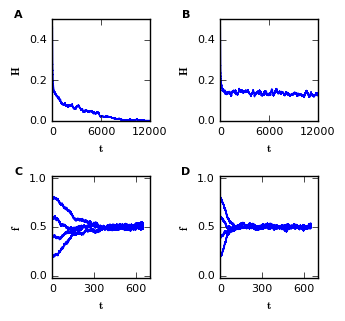

In [3]:
destpath= '/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/selection_exists_when_mixing_doesnt/'
path= '/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/selection_exists_when_mixing_doesnt/'

chirality=[]
slopes=[]
velocities=[]
foldertype='ch'
#Figure parameters
fs=8 #fontzize
sfs=4#small fontsize
lw=1#linewidth
ms=3#markersize

## THE HETEROZYGOSITY PLOT IS BEING RESCALED, APPROPRIATE RESCALING VALUES NEED TO BE GIVEN!



import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
mpl.rcParams['axes.labelsize'] = fs


#where the runs are stored onto dropbox folder
#het_time=np.loadtxt(path+"HET_time.txt")
#np.savetxt(destpath+"het_time_weakchirality.txt",het_time)


#plots from dropbox folder
het_time=np.loadtxt(path+"het_time_weakchirality.txt")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(3.42,3.2))


scalingval=0.1
xaxis=np.arange(len(np.asarray(het_time)))*scalingval
ax[0][0].plot(xaxis,het_time*2,'b-')
ax[0][0].set_xlabel("$\\mathbf{t}$",fontsize = fs,fontweight='bold')
ax[0][0].set_ylabel("$\\mathbf{H}$",fontsize = fs,fontweight='bold')
ax[0][0].set_xticks([0,6000,12000])
ax[0][0].set_yticks([0,0.2,0.4])
ax[0][0].tick_params(axis='both', which='major', labelsize=fs)
ax[0][0].set_title('A',y=0.95,x=-0.35,fontsize = fs,weight='bold')


## only required to copy the required files from where the runs are stored onto dropbox folder
#path = '/Volumes/Ashish_backup/research data/to be backed up/new_figures/neutralHdecay/ch/gdnoise/try1/h0.5/ch0.07/N200/'
#het_time=np.loadtxt(path+"HET_time.txt")
#np.savetxt(destpath+"het_time_strongchirality.txt",het_time)

#plots from dropbox folder
het_time=np.loadtxt(path+"het_time_strongchirality.txt")
xaxis=np.arange(len(np.asarray(het_time)))*scalingval
ax[0][1].plot(xaxis,het_time*2,'b-')
ax[0][1].set_xlabel("$\\mathbf{t}$",fontsize = fs,fontweight='bold')
ax[0][1].set_ylabel("$\\mathbf{H}$",fontsize = fs,fontweight='bold')
ax[0][1].set_xticks([0,6000,12000])
ax[0][1].set_yticks([0,0.2,0.4])
ax[0][1].set_ylim(0,0.5)
ax[0][1].tick_params(axis='both', which='major', labelsize=fs)
ax[0][1].set_title('B',y=0.95,x=-0.35,fontsize = fs,weight='bold')

# print np.shape(np.array(f_time))

f_time=np.loadtxt(path+"ftime0.02.txt")
xaxis=np.arange(len(np.asarray(f_time[0])))*scalingval
for i in range(len(np.asarray(f_time))):
    ax[1][0].plot(xaxis,f_time[i],'b-')
ax[1][0].set_xlabel("$\\mathbf{t}$",fontsize = fs,fontweight='bold')
ax[1][0].set_ylabel("$\\mathbf{f}$",fontsize = fs,fontweight='bold')
ax[1][0].set_ylim(-0.02,1.02)
ax[1][0].set_yticks([0,0.5,1.0])
ax[1][0].tick_params(axis='both', which='major', labelsize=fs)
ax[1][0].set_title('C',y=0.95,x=-0.35,fontsize = fs,weight='bold')
ax[1][0].set_xticks([0,300,600])

f_time=np.loadtxt(path+"ftime0.04.txt")
xaxis=np.arange(len(np.asarray(f_time[0])))*scalingval
for i in range(len(np.asarray(f_time))):
    ax[1][1].plot(xaxis,f_time[i],'b-')
ax[1][1].set_xlabel("$\\mathbf{t}$",fontsize = fs,fontweight='bold')
ax[1][1].set_ylabel("$\\mathbf{f}$",fontsize = fs,fontweight='bold')
ax[1][1].set_ylim(-0.02,1.02)
ax[1][1].set_yticks([0,0.5,1.0])
ax[1][1].tick_params(axis='both', which='major', labelsize=fs)
ax[1][1].set_title('D',y=0.95,x=-0.35,fontsize = fs,weight='bold')
ax[1][1].set_xticks([0,300,600])
plt.tight_layout()
plt.savefig(destpath+'selection_without_mixing.pdf')
plt.show()

## Fig 9 Off-lattice simulations: component figures

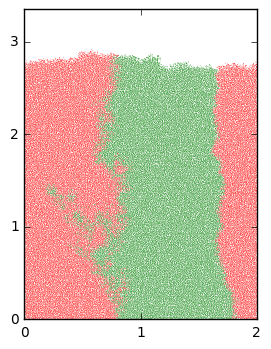

In [3]:
import sys
sys.path.append('/Users/ashish/Dropbox/research/off lattice simulations/python codes/')
from off_lattice_population_class import population_Cpp
from matplotlib import colors
#Figure parameters
fs=10 #fontzize
sfs=4#small fontsize
lw=1#linewidth
ms=3#markersize

cmap = colors.ListedColormap(['green', 'red'])
bounds=[0,0.5,1.0]
norm = colors.BoundaryNorm(bounds, cmap.N)

which_fig_flag=1 #0 for inv_image,1 for bulge _image, 2 for ftime

######## for ftime files, run "/off lattice simulations/python codes/off_lattice_ftime_compiled_plot.py" 
####on the ftime path at "/Users/ashish/Downloads/off_lattice_cluster/systematic_analysis/oppch_inv_wm/F0_6try4smallerK_msp5Additional_analysis/"
####### where this is created by the code "off_lattice_parameter_analysis.py" on the cluster
##### for the selection image files, the plots were from "/Users/ashish/Downloads/off_lattice_cluster/systematic_analysis/oppch_inv/6try2smallerK_analysis/Mfunc6/ms0.5/ch10.0/3/scatter_labelled.png"

destfold="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/off_lattice_verification/"

############################ invasion_image ########################
if which_fig_flag==0:
    selection_image_path="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/off_lattice_verification/image_selection/option1/"
    # selection_image_file="option2/pos_7.txt or option1/pos_10.txt"
    pop1=population_Cpp()
    filename="pos_10.txt"
    pop1.read_data(selection_image_path,filename)
    roll_fraction=0.5       
    domain_width=pop1.params.loc["domain_width"].values[0]
    fig3, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))   
    # plt.scatter((pop1.xpos+roll_fraction*domain_width)%domain_width, pop1.ypos, c=pop1.species_label,s=2, cmap='Accent',edgecolor="none")
    plt.scatter((pop1.xpos+roll_fraction*domain_width)%domain_width, pop1.ypos, c=pop1.species_label,s=2, cmap=cmap,edgecolor="none")
    # ax.set_xlabel("$\\mathbf{t}$",fontsize = fs,fontweight='bold')
    # ax.set_ylabel("$\\mathbf{f}$",fontsize = fs,fontweight='bold')
    ax.set_ylim(0.0,np.max(pop1.ypos)*1.15)
    ax.set_xlim(0.0,domain_width)
    ax.set_yticks([0,100,200])
    ax.set_xticks([0,100,200])
    ax.tick_params(axis='both', which='major', labelsize=fs)
    plt.savefig(destfold+"invasion_image.png")

############################ bulge_image ########################
if which_fig_flag==1:
    bulge_image_path="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/off_lattice_verification/image_bulge/option1/"
    pop1=population_Cpp()
    filename="pos_5.txt"
    pop1.read_data(bulge_image_path,filename)
    roll_fraction=-0.1       
    domain_width=pop1.params.loc["domain_width"].values[0]
    fig3, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,4))   
    plt.scatter((pop1.xpos+roll_fraction*domain_width)%domain_width, pop1.ypos, c=pop1.species_label,s=0.2, cmap=cmap,edgecolor="none")
    ax.set_ylim(0.0,np.max(pop1.ypos)*1.15)
    ax.set_xlim(0.0,domain_width)
#     ax.set_yticks([0,100,200,300])
#     ax.set_yticks([0,100,200])
    ticks=[0,100,200,300]
    labels=[0,100,200,300]
    labels[:] = [x / unit_conversion for x in labels]
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels,fontsize=fs)
    ticks=[0,100,200]
    labels=[0,100,200]
    labels[:] = [x / unit_conversion for x in labels]
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels,fontsize=fs)
    ax.tick_params(axis='both', which='major', labelsize=fs)
    plt.savefig(destfold+"bulge_image1.png")

############################ ftime figure ########################  
# ftime_fold="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/off_lattice_verification/sel_ftime/F0_6try4smallerK_msp5Additional_analysis_plots/Mfunc6_ch10.0_/"
#     f_time=np.loadtxt(ftime_fold+"ftime_list.txt")
#     time=np.loadtxt(ftime_fold+"time_list.txt") 
ftime_fold="/Users/ashish/Downloads/off_lattice_cluster/systematic_analysis/oppch_inv_wm/F0_6try4smallerK_msp5Additional_Fplots/Mfunc6_ch10.0_/"

if which_fig_flag==2:    
    f_ypos=np.loadtxt(ftime_fold+"fypos_list.txt")
    ypos=np.loadtxt(ftime_fold+"ypos_list.txt")
    fig3, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4)) 
    for i in range(len(np.asarray(f_time))):
        ax.plot(ypos[i],f_ypos[i],'bo',markeredgecolor="none")
#     ax.set_xlabel("$\\mathbf{t}$",fontsize = fs,fontweight='bold')
    ax.set_ylim(-0.02,1.02)
    ax.set_yticks([0,0.5,1.0])
    ax.tick_params(axis='both', which='major', labelsize=fs)
#     ax[.set_title('C',y=0.95,x=-0.35,fontsize = fs,weight='bold')
#     ax.set_xticks([0,1000,2000,3000])
    ticks=[0,100,200]
    labels=[0,100,200]
    labels[:] = [x / unit_conversion for x in labels]
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels,fontsize=fs)
    
    plt.savefig(destfold+"fypos.png")
plt.show()


### Figure SI showing velocity with chirality for mixed & single strain expansion

In [21]:
#### path on the cluster is /new_sim/velocity with oppch/try3/
## on this run "velocity_of_expansion_with_ch.py" to get the required files
fs=10 #fontzize
sfs=8#small fontsize
lw=2#linewidth
ms=3#markersize

path="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/velocity with oppch/try3_vplots/"
destpath="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/velocity_with_oppch/"
v_single=np.loadtxt(path+"velocity_ch_h0.0.txt")
v_mixed=np.loadtxt(path+"velocity_ch_h0.5.txt")
chirality=np.loadtxt(path+"chirality_of_strain1.txt")

v_single_stderr=np.loadtxt(path+"velocity_stderr_ch_h0.0.txt")
v_mixed_stderr=np.loadtxt(path+"velocity_stderr_ch_h0.5.txt")
print v_mixed







fig, ax = plt.subplots(1, 2, figsize=(6,3))
ax[0].errorbar(chirality,v_single,yerr=  v_single_stderr , fmt='o',markersize=ms)
ax[0].set_ylim(0.09,0.0932)
ax[0].set_xlim(-0.11,0.11)
ax[0].set_yticks([0.09,0.091,0.092,0.093])
ax[0].set_xticks([-0.1, 0.0,0.1])
ax[0].tick_params(axis='both', which='major', labelsize=fs)
ax[0].set_xlabel("microscopic chirality, $A$",fontsize = fs,fontweight='bold')
ax[0].set_ylabel("velocity, $v$",fontsize = fs,fontweight='bold')


ax[1].errorbar(chirality,v_mixed,yerr=  v_mixed_stderr , fmt='o',markersize=ms)
ax[1].set_ylim(0.09,0.0932)
ax[1].set_xlim(-0.11,0.11)
ax[1].set_yticks([0.09,0.091,0.092,0.093])
# ax[1].set_xticks([-0.1, -0.05,0.0,0.05,0.1])
ax[1].set_xticks([-0.1,0.0,0.1])
ax[1].tick_params(axis='both', which='major', labelsize=fs)
ax[1].set_xlabel("microscopic chirality, $A$",fontsize = fs,fontweight='bold')
ax[1].set_ylabel("velocity, $v$",fontsize = fs,fontweight='bold')


ax[0].set_title('A',y=0.97,x=-0.35,color='black',fontsize = fs, fontweight='bold')
ax[1].set_title('B',y=0.97,x=-0.35,color='black',fontsize = fs, fontweight='bold')
plt.tight_layout()

plt.savefig(destpath+"velocity_with_chirality.eps")


       

[0.09297955 0.09290398 0.09212244 0.09030197 0.09138011 0.0904619
 0.09085155 0.09081201 0.09045108 0.09143772 0.09212119]


##### sample figure to show unequal domain sizes in the presence of selection is at:
/Users/ashish/Downloads/oppch_with_fitness_avg/try2SmallD_plots/s0.01/ch0.009/h0.2/2/fig.png

### New fig4 oppch and ch0 with selection 3 across

0.0
0.0
0.0
0.0
0.0
0.03
0.03
0.03
0.03
0.03
-0.03
-0.03
-0.03
-0.03
-0.03


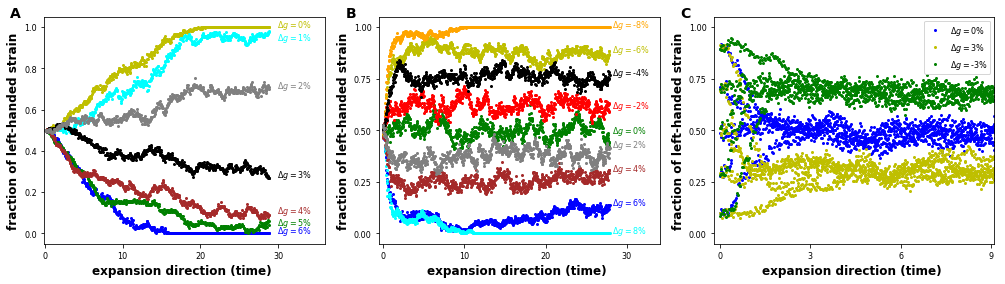

In [96]:
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/ch0_oppch_with_fitness_advantage/gdnoise/'
path_ch0='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/ch0_oppch_with_fitness_advantage/ch0/try3_plots/'
path_oppch='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/ch0_oppch_with_fitness_advantage/oppch/try3_plots/'
path_oppch3='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/ch0_oppch_with_fitness_advantage/oppch/Fig2try3_plots/'



#### figures from:
##/Users/ashish/Downloads/oppch_with_fitness_avg/try3_plots
##/Users/ashish/Downloads/ch0_with_fitness_avg/try3BigN_plots

color_cycler=['b','y','g','r','cyan','brown','orange','black','grey']
fs=14 #fontsize
fs_coexistence_label=12
sfs=8#small fontsize
lw=2*2#linewidth
ms=3*2#markersize

mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
# mpl.rcParams['axes.facecolor'] = "none"
# mpl.rcParams['axes.edgecolor'] = "black"
# mpl.rcParams['font.weight'] = "medium"
mpl.rcParams['axes.labelsize'] = fs




fig, ax = plt.subplots(1, 3, figsize=(14,4))

######### ch0 ##################
hlist=np.loadtxt(path_ch0+"hlist.txt")
slist=np.loadtxt(path_ch0+"slist.txt")
ftime_list=[] 
for i in range (len(hlist)):
    ftime_list.append([])
    for j in range (len(hlist[0])):
        ftime_list[i].append( np.loadtxt(path_ch0+"ftime_"+str(i)+"_"+str(j) +".txt" )  ) 
    


##### plotting only for j=0, as we need just h=0.5
for i in range(len(ftime_list)): 
    sval=slist[i][0]
    yval=ftime_list[i][0]
    xval=np.arange(len(yval))

    if sval in np.arange(7)*0.01:
        ax[0].plot(xval,yval,'o',markersize=2,color=color_cycler[i%len(color_cycler)],label="$\\Delta g =$"+str(int(sval*100)) +"%",markevery=5)
        if sval !=0.01:
            ax[0].text(xval[-1]+100,yval[-1],"$\\Delta g =$"+str(int(sval*100)) +"%",color=color_cycler[i%len(color_cycler)], fontsize =sfs) 
        else:
            ax[0].text(xval[-1]+100,yval[-1]-0.05,"$\\Delta g =$"+str(int(sval*100)) +"%",color=color_cycler[i%len(color_cycler)], fontsize =sfs) 

######### oppch ##################
hlist=np.loadtxt(path_oppch+"hlist.txt")
slist=np.loadtxt(path_oppch+"slist.txt")
ftime_list=[] 

for i in range (len(hlist)):
    ftime_list.append(np.loadtxt(path_oppch+"ftime_"+str(i)+"_"+str(0)+".txt" ))
    

ctr=0
for i in range(len(ftime_list)): 

    sval=slist[i]
    yval=ftime_list[i]
    xval=np.arange(len(yval))
    if sval in (  (np.arange(17)-8) *0.01) :
        ax[1].plot(np.arange(len(yval)),yval,'o',markersize=2,color=color_cycler[ctr%len(color_cycler)],label="$\\Delta g =$"+str(int(sval*100)) +"%",markevery=3)
    
        if sval !=0.0:
            ax[1].text(xval[-1]+30,yval[-1],"$\\Delta g =$"+str(int(sval*100)) +"%",color=color_cycler[ctr%len(color_cycler)], fontsize =sfs) 
        else:
            ax[1].text(xval[-1]+30,yval[-1]+0.05,"$\\Delta g =$"+str(int(sval*100)) +"%",color=color_cycler[ctr%len(color_cycler)], fontsize =sfs) 
        ctr+=1



######### oppch3 ##################
hlist=np.loadtxt(path_oppch3+"hlist.txt")
slist=np.loadtxt(path_oppch3+"slist.txt")
ftime_list=[] 

for i in range (len(hlist)):
    ftime_list.append([])
    for j in range (len(hlist[0])):
        ftime_list[i].append(np.loadtxt(path_oppch3+"ftime_"+str(i)+"_"+str(j)+".txt" ))
    
ctr=0

xlimit3=910
for i in range(len(hlist)): 
    for j in range (len(hlist[0])):
        hval=hlist[i][j]
        sval=slist[i][j]
        print sval
        yval=ftime_list[i][j]
        xval=np.arange(len(yval))
        if sval in (  (np.arange(17)-8) *0.01) :
            if j==0:
                ax[2].plot(np.arange(len(yval)),yval,'o',markersize=2,color=color_cycler[i%len(color_cycler)],label="$\\Delta g =$"+str(int(sval*100)) +"%",markevery=3)
            else:
                ax[2].plot(np.arange(len(yval)),yval,'o',markersize=2,color=color_cycler[i%len(color_cycler)],markevery=3)
#             if j==0:
#                 ax[2].text(xlimit3-30,yval[-1]+0.05,"$\\Delta g =$"+str(int(sval*100)) +"%",color=color_cycler[i%len(color_cycler)], fontsize =sfs) 
        ax[2].legend(loc=1,fontsize=sfs)    

ax[0].set_title('A',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')    
ax[1].set_title('B',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')
ax[2].set_title('C',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')

ax[0].set_ylim(-0.05,1.05)
plt.tick_params(labelsize=sfs)
ax[0].set_xlabel("expansion direction (time) ", fontsize =fs_coexistence_label)
ax[0].set_ylabel("fraction of left-handed strain", fontsize =fs_coexistence_label)


ax[1].set_ylim(-0.05,1.05)
plt.tick_params(labelsize=sfs)
ax[1].set_xlabel("expansion direction (time) ", fontsize =fs_coexistence_label)
ax[1].set_ylabel("fraction of left-handed strain", fontsize =fs_coexistence_label)

ax[2].set_ylim(-0.05,1.05)
plt.tick_params(labelsize=sfs)
ax[2].set_xlabel("expansion direction (time) ", fontsize =fs_coexistence_label)
ax[2].set_ylabel("fraction of left-handed strain", fontsize =fs_coexistence_label)


## for plotting against y position
ticks=[0,1000,2000,3000]
labels=[0,1000,2000,3000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)

ax[1].set_yticks([0.0,0.25,0.5,0.75,1.0])
ticks=[0,1000,2000,3000]
labels=[0,1000,2000,3000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)


ax[2].set_yticks([0.0,0.25,0.5,0.75,1.0])
ticks=[0,300,600,900]
labels=[0,300,600,900]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[2].set_xticks(ticks)
ax[2].set_xticklabels(labels)


ax[0].set_xlim(-10,3600)
ax[1].set_xlim(-50,3400)
ax[2].set_xlim(-20,xlimit3)
if not os.path.isdir(destpath): os.makedirs(destpath)
plt.tight_layout()
plt.savefig(destpath+'ch0_oppch_sel3.eps')
plt.show()

### New fig4 oppch and ch0 with selection 2 across

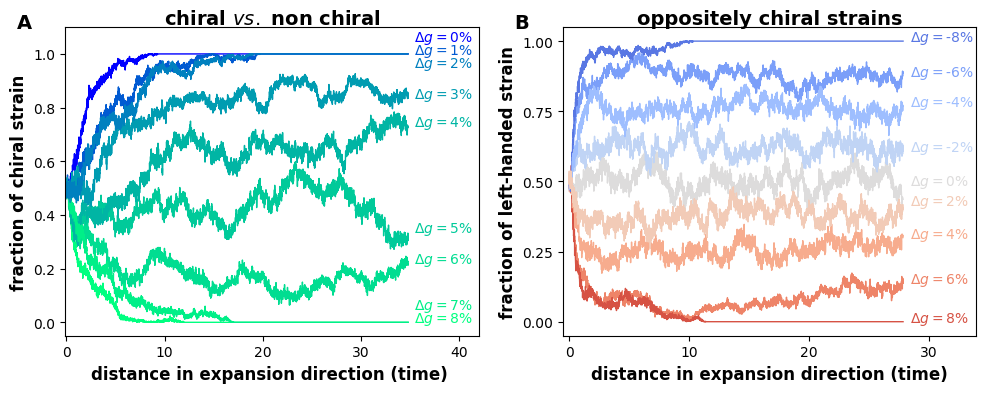

In [24]:
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/ch0_oppch_with_fitness_advantage/gdnoise/'
path_ch0='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/ch0_oppch_with_fitness_advantage/ch0/try4WMSmallgBigger_plots/'
path_oppch='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/ch0_oppch_with_fitness_advantage/oppch/try3_plots/'

from matplotlib import cm
#### figures from:
##/Users/ashish/Downloads/oppch_with_fitness_avg/try3_plots
##/Users/ashish/Downloads/ch0_with_fitness_avg/try3BigN_plots

# color_cycler=['b','y','g','r','cyan','brown','orange','black','grey']
fs=14 #fontsize
fs_coexistence_label=12
sfs=10#small fontsize
lw=1#linewidth
ms=3*2#markersize



mpl.rcParams['axes.labelweight'] = "bold"
mpl.rcParams['axes.labelsize'] = fs


fig, ax = plt.subplots(1, 2, figsize=(10,4))

hlist=np.loadtxt(path_ch0+"hlist.txt")
slist=np.loadtxt(path_ch0+"slist.txt")
ftime_list=[] 
# for i in range (len(hlist)):
#     ftime_list.append([])
#     for j in range (len(hlist[0])):
#         ftime_list[i].append( np.loadtxt(path_ch0+"ftime_"+str(i)+"_"+str(j) +".txt" )  ) 
##### plotting only for j=0, as we need just h=0.5
# for i in range(len(ftime_list)): 
# #     hval=hlist[i][j]
#     sval=slist[i][0]
#     yval=ftime_list[i][0]
#     xval=np.arange(len(yval))

######## try4 only starts from one hvalue   
for i in range (len(hlist)):
    ftime_list.append(np.loadtxt(path_ch0+"ftime_"+str(i)+"_"+str(0)+".txt" ))        

normalized_arr=np.sqrt(np.array(slist)/np.max(slist))
line_colors = cm.winter(normalized_arr)
for i in range(len(ftime_list)): 
    sval=slist[i]  
    yval=ftime_list[i]
    xval=np.arange(len(yval))
#     if sval in np.arange(7)*0.01:
    if sval <0.1 :
        ax[0].plot(xval,yval,'-',color=line_colors[i],label="$\\Delta g =$"+str(int(sval*100)) +"%",linewidth=lw)
        if sval ==0.0:
            ax[0].text(xval[-1]+60,yval[-1]+0.05,"$\\Delta g =$"+str(int(sval*100)) +"%",color=line_colors[i], fontsize =sfs) 
        elif sval ==0.01:
            ax[0].text(xval[-1]+60,yval[-1],"$\\Delta g =$"+str(int(sval*100)) +"%",color=line_colors[i], fontsize =sfs) 
        elif sval==0.02:
            ax[0].text(xval[-1]+60,yval[-1]-0.05,"$\\Delta g =$"+str(int(sval*100)) +"%",color=line_colors[i], fontsize =sfs) 
        elif sval==0.07:
            ax[0].text(xval[-1]+60,yval[-1]+0.05,"$\\Delta g =$"+str(int(sval*100)) +"%",color=line_colors[i], fontsize =sfs) 
        elif sval==0.05:
            ax[0].text(xval[-1]+60,yval[-1]+0.03,"$\\Delta g =$"+str(int(sval*100)) +"%",color=line_colors[i], fontsize =sfs) 
        else:
            ax[0].text(xval[-1]+60,yval[-1],"$\\Delta g =$"+str(int(sval*100)) +"%",color=line_colors[i], fontsize =sfs) 
          
        # ax[0].legend(loc=2 ,fontsize =sfs)
ax[0].set_ylim(-0.05,1.1)
plt.tick_params(labelsize=sfs)
ax[0].set_xlabel("distance in expansion direction (time) ", fontsize =fs_coexistence_label)
ax[0].set_ylabel("fraction of chiral strain", fontsize =fs_coexistence_label)

        
        
######### oppch
hlist=np.loadtxt(path_oppch+"hlist.txt")
slist=np.loadtxt(path_oppch+"slist.txt")
ftime_list=[] 

for i in range (len(hlist)):
    ftime_list.append(np.loadtxt(path_oppch+"ftime_"+str(i)+"_"+str(0)+".txt" ))
    
ax[1].set_ylim(-0.05,1.05)
plt.tick_params(labelsize=sfs)
ax[1].set_xlabel("distance in expansion direction (time)", fontsize =fs_coexistence_label)
ax[1].set_ylabel("fraction of left-handed strain", fontsize =fs_coexistence_label)
ctr=0
normalized_arr=np.array(slist+np.max(slist))/(np.max(slist)*2.)
line_colors = cm.coolwarm(normalized_arr)
for i in range(len(ftime_list)): 
#     hval=hlist[i][j]
    sval=slist[i]
    yval=ftime_list[i]
    xval=np.arange(len(yval))
#     if sval in (  (np.arange(17)-8) *0.01) :
    if np.abs(sval) <0.09 :
        ax[1].plot(np.arange(len(yval)),yval,'-',color=line_colors[i],label="$\\Delta g =$"+str(int(sval*100)) +"%",linewidth=lw)
    
        if sval !=0.0:
            ax[1].text(xval[-1]+60,yval[-1],"$\\Delta g =$"+str(int(sval*100)) +"%",color=line_colors[i], fontsize =sfs) 
        else:
            ax[1].text(xval[-1]+60,yval[-1]+0.05,"$\\Delta g =$"+str(int(sval*100)) +"%",color=line_colors[i], fontsize =sfs) 
        ctr+=1
    

ax[0].set_title('A',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')    
ax[1].set_title('B',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')
# mpl.rcParams['mathtext.bf'] = 'STIXGeneral:italic:bold'
ax[0].text(0.5,1.01,r'chiral $\mathbf{\mathit{vs.}}$ non chiral',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[0].transAxes) 
# mpl.rcParams.update(mpl.rcParamsDefault)
# mpl.rcParams['axes.labelweight'] = "bold"
# mpl.rcParams['axes.labelsize'] = fs
ax[1].text(0.5,1.01,'oppositely chiral strains',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[1].transAxes) 



## for plotting against y position
ticks=[0,1000,2000,3000,4000]
labels=[0,1000,2000,3000,4000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)

ax[1].set_yticks([0.0,0.25,0.5,0.75,1.0])
ticks=[0,1000,2000,3000]
labels=[0,1000,2000,3000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)

ax[0].set_xlim(-10,4200)
ax[1].set_xlim(-50,3400)
if not os.path.isdir(destpath): os.makedirs(destpath)
plt.tight_layout()
plt.savefig(destpath+'ch0_oppch_sel.eps')
plt.savefig(destpath+'ch0_oppch_sel.pdf')
plt.show()

### SI fig r(t) in mixed expansions 2 panel

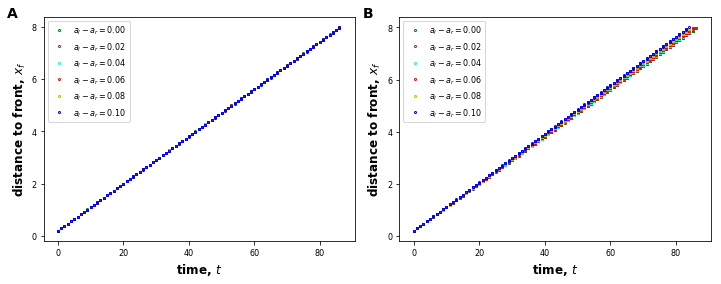

In [32]:
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/velocity_in_mixed_expasions/'
path='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/velocity_in_mixed_expasions/try1_vplots/'



#### figures from:
##//projectnb/qedksk/ashishge/data/new_sim/velocity_with_oppch/gdnoise/try1/


color_cycler=['b','y','g','r','cyan','brown','orange','black','grey']
fs=14 #fontsize
fs_coexistence_label=12
sfs=8#small fontsize
lw=2*2#linewidth
ms=3*2#markersize

mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
# mpl.rcParams['axes.facecolor'] = "none"
# mpl.rcParams['axes.edgecolor'] = "black"
# mpl.rcParams['font.weight'] = "medium"
mpl.rcParams['axes.labelsize'] = fs



suffix1="h0.0"
suffix2="h0.5"
fig, ax = plt.subplots(1, 2, figsize=(10,4))



chirality_list=np.loadtxt(path+"chirality_of_strain1"+suffix1+".txt")
runlist=np.loadtxt(path+"runlist"+suffix1+".txt")
xbtime_list=[]
time_list=[]
for i in range (len(chirality_list)):
    xbtime_list.append([])
    time_list.append([])
    for j in range (len(runlist)):
        xbtime_list[i].append( np.loadtxt(path+"xbtime"+suffix1+"_"+str(i)+"_"+str(j) +".txt" )  ) 
        time_list[i].append( np.loadtxt(path+"timeArr"+suffix1+"_"+str(i)+"_"+str(j) +".txt" )  ) 
    

plt.tick_params(labelsize=sfs)
ax[0].set_xlabel("time, $t$ ", fontsize =fs_coexistence_label)
ax[0].set_ylabel("distance to front, $x_f$", fontsize =fs_coexistence_label)

order_array=np.argsort(chirality_list)
#for i,ch in enumerate(chirality_list): 
for i in (order_array): 
    ch=chirality_list[i]
    for j,run in enumerate(runlist):

        yval=xbtime_list[i][j]
        xval=time_list[i][j]
        if j==0 :
            ax[0].plot(xval,yval,'o',markersize=2,markeredgecolor=color_cycler[i%len(color_cycler)],markerfacecolor="None",label="$a_l - a_r =$"+str("{0:.2f}".format(ch)),markevery=100)
        else:
            ax[0].plot(xval,yval,'o',markersize=2,markeredgecolor=color_cycler[i%len(color_cycler)],markerfacecolor="None",markevery=100)
            
ax[0].legend(loc=2 ,fontsize =sfs)


######### mixed expansions oppch
chirality_list=np.loadtxt(path+"chirality_of_strain1"+suffix2+".txt")
runlist=np.loadtxt(path+"runlist"+suffix2+".txt")
xbtime_list=[]
time_list=[]
for i in range (len(chirality_list)):
    xbtime_list.append([])
    time_list.append([])
    for j in range (len(runlist)):
        xbtime_list[i].append( np.loadtxt(path+"xbtime"+suffix2+"_"+str(i)+"_"+str(j) +".txt" )  ) 
        time_list[i].append( np.loadtxt(path+"timeArr"+suffix2+"_"+str(i)+"_"+str(j) +".txt" )  ) 
    

plt.tick_params(labelsize=sfs)
ax[1].set_xlabel("time, $t$ ", fontsize =fs_coexistence_label)
ax[1].set_ylabel("distance to front, $x_f$", fontsize =fs_coexistence_label)

order_array=np.argsort(chirality_list)
#for i,ch in enumerate(chirality_list): 

for i in (order_array): 
    ch=chirality_list[i]
    for j,run in enumerate(runlist):
        yval=xbtime_list[i][j]
        xval=time_list[i][j]
        if j==0 :
            ax[1].plot(xval,yval,'o',markersize=2,markeredgecolor=color_cycler[i%len(color_cycler)],markerfacecolor="None",label="$a_l - a_r =$"+str("{0:.2f}".format(ch)),markevery=100)
        else:
            ax[1].plot(xval,yval,'o',markersize=2,markeredgecolor=color_cycler[i%len(color_cycler)],markerfacecolor="None",markevery=100)

            
# handles, labels = plt.gca().get_legend_handles_labels()
# order = np.argsort(chirality_list)
# ax[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=2,fontsize =sfs)          
            
ax[1].legend(loc=2 ,fontsize =sfs)









ax[0].set_title('A',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')    
ax[1].set_title('B',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')




## for plotting against time
ticks=[0,2000,4000,6000,8000]
labels=[0,2000,4000, 6000,8000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)

ticks=[0,200,400,600,800]
labels=[0,200,400,600,800]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels)


ticks=[0,2000,4000,6000,8000]
labels=[0,2000,4000, 6000,8000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)

ticks=[0,200,400,600,800]
labels=[0,200,400,600,800]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[1].set_yticks(ticks)
ax[1].set_yticklabels(labels)


if not os.path.isdir(destpath): os.makedirs(destpath)
plt.tight_layout()
plt.savefig(destpath+'r_t_mixed.eps')
plt.show()

## SI fig, velocity in mixed expansion and single expansion 2 panel

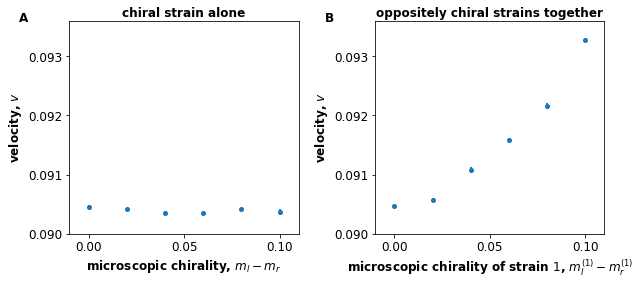

In [8]:
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/velocity_in_mixed_expasions/'
path='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/velocity_in_mixed_expasions/try1_vplots/'

fs=12 #fontsize

sfs=8#small fontsize
lw=2#linewidth
ms=4#markersize


suffix1="h0.0"
suffix2="h0.5"

fig, ax = plt.subplots(1, 2, figsize=(9,4))
velocity=np.loadtxt(path+"velocity_ch_"+suffix1+".txt")
velocity_stderr=np.loadtxt(path+"velocity_stderr_ch_"+suffix1+".txt")
chirality_list=np.loadtxt(path+"chirality_of_strain1"+suffix1+".txt")
ax[0].errorbar(chirality_list,velocity,yerr=  velocity_stderr , fmt='o',markersize=ms,linewidth=lw)      


velocity=np.loadtxt(path+"velocity_ch_"+suffix2+".txt")
velocity_stderr=np.loadtxt(path+"velocity_stderr_ch_"+suffix2+".txt")
chirality_list=np.loadtxt(path+"chirality_of_strain1"+suffix2+".txt")
ax[1].errorbar(chirality_list,velocity,yerr=  velocity_stderr , fmt='o',markersize=ms,linewidth=lw)      


ax[0].set_ylim(0.09,0.0936)
# ax[0].set_ylim(0.09,0.091)
ax[0].set_xlim(-0.01,0.11)
ax[0].set_yticks([0.09,0.091,0.092,0.093])
ax[0].set_xticks([ 0.0,0.05,0.1])
ax[0].tick_params(axis='both', which='major', labelsize=fs)
ax[0].set_xlabel("microscopic chirality, $m_l-m_r$",fontsize = fs,fontweight='bold')
ax[0].set_ylabel("velocity, $v$",fontsize = fs,fontweight='bold')


ax[1].set_ylim(0.09,0.0936)
ax[1].set_xlim(-0.01,0.11)
ax[1].set_yticks([0.09,0.091,0.092,0.093])
ax[1].set_xticks([0.0,0.05,0.1])
ax[1].tick_params(axis='both', which='major', labelsize=fs)
ax[1].set_xlabel("microscopic chirality of strain $1$, $m_l^{(1)}-m_r^{(1)}$",fontsize = fs,fontweight='bold')
ax[1].set_ylabel("velocity, $v$",fontsize = fs,fontweight='bold')
ax[0].set_title('A',y=0.97,x=-0.2,fontsize = fs, fontweight='bold')    
ax[1].set_title('B',y=0.97,x=-0.2,fontsize = fs, fontweight='bold')


ax[0].text(0.5,1.02,'chiral strain alone',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[0].transAxes) 
ax[1].text(0.5,1.02,'oppositely chiral strains together',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[1].transAxes) 


if not os.path.isdir(destpath): os.makedirs(destpath)
plt.tight_layout()
plt.savefig(destpath+'v_mixed_2panel.eps')
plt.show()

### SI fig r(t) & velocity in mixed expansions 4 panel

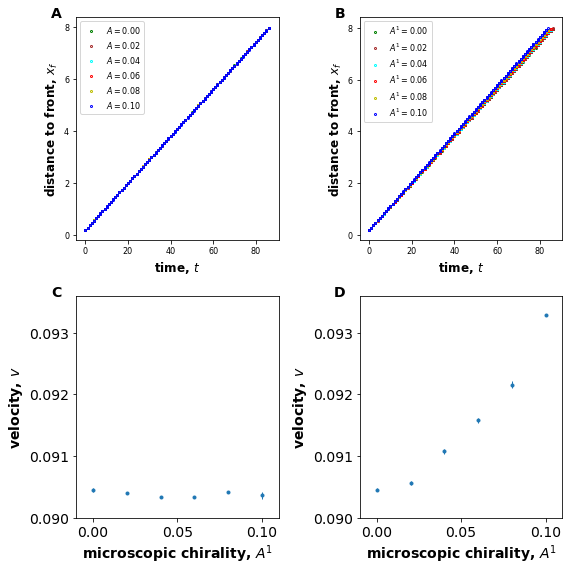

In [31]:
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/velocity_in_mixed_expasions/'
path='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/velocity_in_mixed_expasions/try1_vplots/'



#### figures from:
##//projectnb/qedksk/ashishge/data/new_sim/velocity_with_oppch/gdnoise/try1/


color_cycler=['b','y','g','r','cyan','brown','orange','black','grey']
fs=14 #fontsize
fs_coexistence_label=12
sfs=8#small fontsize
lw=2#linewidth
ms=3#markersize

# mpl.rcParams['lines.linewidth'] = lw
# mpl.rcParams['font.size'] = sfs
# mpl.rcParams['axes.labelweight'] = "bold"
# # mpl.rcParams['axes.facecolor'] = "none"
# # mpl.rcParams['axes.edgecolor'] = "black"
# # mpl.rcParams['font.weight'] = "medium"
# mpl.rcParams['axes.labelsize'] = fs



suffix1="h0.0"
suffix2="h0.5"
fig, ax = plt.subplots(2, 2, figsize=(8,8))



chirality_list=np.loadtxt(path+"chirality_of_strain1"+suffix1+".txt")
runlist=np.loadtxt(path+"runlist"+suffix1+".txt")

######### alone expansions  r(t) #######
xbtime_list=[]
time_list=[]
for i in range (len(chirality_list)):
    xbtime_list.append([])
    time_list.append([])
    for j in range (len(runlist)):
        xbtime_list[i].append( np.loadtxt(path+"xbtime"+suffix1+"_"+str(i)+"_"+str(j) +".txt" )  ) 
        time_list[i].append( np.loadtxt(path+"timeArr"+suffix1+"_"+str(i)+"_"+str(j) +".txt" )  ) 
    

plt.tick_params(labelsize=sfs)
ax[0][0].set_xlabel("time, $t$ ", fontsize =fs_coexistence_label)
ax[0][0].set_ylabel("distance to front, $x_f$", fontsize =fs_coexistence_label)

order_array=np.argsort(chirality_list)
#for i,ch in enumerate(chirality_list): 
for i in (order_array): 
    ch=chirality_list[i]
    for j,run in enumerate(runlist):

        yval=xbtime_list[i][j]
        xval=time_list[i][j]
        if j==0 :
            ax[0][0].plot(xval,yval,'o',markersize=2,markeredgecolor=color_cycler[i%len(color_cycler)],markerfacecolor="None",label="$A =$"+str("{0:.2f}".format(ch)),markevery=100)
        else:
            ax[0][0].plot(xval,yval,'o',markersize=2,markeredgecolor=color_cycler[i%len(color_cycler)],markerfacecolor="None",markevery=100)
            
ax[0][0].legend(loc=2 ,fontsize =sfs)


######### mixed expansions r(t) #######
chirality_list=np.loadtxt(path+"chirality_of_strain1"+suffix2+".txt")
runlist=np.loadtxt(path+"runlist"+suffix2+".txt")
xbtime_list=[]
time_list=[]
for i in range (len(chirality_list)):
    xbtime_list.append([])
    time_list.append([])
    for j in range (len(runlist)):
        xbtime_list[i].append( np.loadtxt(path+"xbtime"+suffix2+"_"+str(i)+"_"+str(j) +".txt" )  ) 
        time_list[i].append( np.loadtxt(path+"timeArr"+suffix2+"_"+str(i)+"_"+str(j) +".txt" )  ) 
    

plt.tick_params(labelsize=sfs)
ax[0][1].set_xlabel("time, $t$ ", fontsize =fs_coexistence_label)
ax[0][1].set_ylabel("distance to front, $x_f$", fontsize =fs_coexistence_label)

order_array=np.argsort(chirality_list)
#for i,ch in enumerate(chirality_list): 
for i in (order_array): 
    ch=chirality_list[i]
    for j,run in enumerate(runlist):
        yval=xbtime_list[i][j]
        xval=time_list[i][j]
        if j==0 :
            ax[0][1].plot(xval,yval,'o',markersize=2,markeredgecolor=color_cycler[i%len(color_cycler)],markerfacecolor="None",label="$A^1 =$"+str("{0:.2f}".format(ch)),markevery=100)
        else:
            ax[0][1].plot(xval,yval,'o',markersize=2,markeredgecolor=color_cycler[i%len(color_cycler)],markerfacecolor="None",markevery=100)

ax[0][1].legend(loc=2 ,fontsize =sfs)            
# handles, labels = plt.gca().get_legend_handles_labels()
# order = np.argsort(chirality_list)
# ax[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=2,fontsize =sfs)          


velocity=np.loadtxt(path+"velocity_ch_"+suffix1+".txt")
velocity_stderr=np.loadtxt(path+"velocity_stderr_ch_"+suffix1+".txt")
chirality_list=np.loadtxt(path+"chirality_of_strain1"+suffix1+".txt")
ax[1][0].errorbar(chirality_list,velocity,yerr=  velocity_stderr , fmt='o',markersize=ms,linewidth=1)      


velocity=np.loadtxt(path+"velocity_ch_"+suffix2+".txt")
velocity_stderr=np.loadtxt(path+"velocity_stderr_ch_"+suffix2+".txt")
chirality_list=np.loadtxt(path+"chirality_of_strain1"+suffix2+".txt")
ax[1][1].errorbar(chirality_list,velocity,yerr=  velocity_stderr , fmt='o',markersize=ms,linewidth=1)      


ax[1][0].set_ylim(0.09,0.0936)
ax[1][0].set_xlim(-0.01,0.11)
ax[1][0].set_yticks([0.09,0.091,0.092,0.093])
ax[1][0].set_xticks([ 0.0,0.05,0.1])
ax[1][0].tick_params(axis='both', which='major', labelsize=fs)
ax[1][0].set_xlabel("microscopic chirality, $A^1$",fontsize = fs,fontweight='bold')
ax[1][0].set_ylabel("velocity, $v$",fontsize = fs,fontweight='bold')


ax[1][1].set_ylim(0.09,0.0936)
ax[1][1].set_xlim(-0.01,0.11)
ax[1][1].set_yticks([0.09,0.091,0.092,0.093])
ax[1][1].set_xticks([0.0,0.05,0.1])
ax[1][1].tick_params(axis='both', which='major', labelsize=fs)
ax[1][1].set_xlabel("microscopic chirality, $A^1$",fontsize = fs,fontweight='bold')
ax[1][1].set_ylabel("velocity, $v$",fontsize = fs,fontweight='bold')



ax[0][0].set_title('A',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')    
ax[0][1].set_title('B',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')
ax[1][0].set_title('C',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')    
ax[1][1].set_title('D',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')





## for plotting against time
ticks=[0,2000,4000,6000,8000]
labels=[0,2000,4000, 6000,8000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0][0].set_xticks(ticks)
ax[0][0].set_xticklabels(labels)

ticks=[0,200,400,600,800]
labels=[0,200,400,600,800]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0][0].set_yticks(ticks)
ax[0][0].set_yticklabels(labels)


ticks=[0,2000,4000,6000,8000]
labels=[0,2000,4000, 6000,8000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0][1].set_xticks(ticks)
ax[0][1].set_xticklabels(labels)

ticks=[0,200,400,600,800]
labels=[0,200,400,600,800]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0][1].set_yticks(ticks)
ax[0][1].set_yticklabels(labels)


if not os.path.isdir(destpath): os.makedirs(destpath)
plt.tight_layout()
plt.savefig(destpath+'v_mixed_4panel.eps')
plt.show()

### Selection with N 2 panel

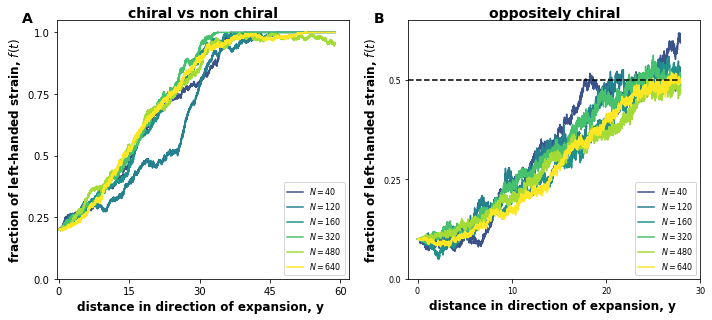

In [4]:
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/selection_with_N/'
path_ch0='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/selection with N/ch0 with N/try8Longer_plots/'
path_oppch='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/selection with N/oppch with N/try8NWM_Largech_plots/'


#import matplotlib.pylab as plab
from matplotlib import cm



#### figures from:
##//projectnb/qedksk/ashishge/data/new_sim/velocity_with_oppch/gdnoise/try1/


# color_cycler=['b','y','g','r','cyan','brown','orange','black','grey']
fs=14 #fontsize
fs_coexistence_label=12
sfs=8#small fontsize
lw=2#linewidth
ms=3#markersize

# mpl.rcParams['lines.linewidth'] = lw
# mpl.rcParams['font.size'] = sfs
mpl.rcParams['axes.labelweight'] = "bold"
# # mpl.rcParams['axes.facecolor'] = "none"
# # mpl.rcParams['axes.edgecolor'] = "black"
# # mpl.rcParams['font.weight'] = "medium"
# mpl.rcParams['axes.labelsize'] = fs



## for try7 : but mn >l for the large N values here, so we cant present this
###N_to_show_list=[160,640,5120,20480,81920, 327680, 1310720] ## N values to show to reduce crowding

N_to_show_list=[40,60,120,160,320, 480,640]

fig, ax = plt.subplots(1, 2, figsize=(10,4.5))

Nlist=np.loadtxt(path_ch0+"Nlist.txt")

ftime_list=[]
time_list=[]
for i in range (len(Nlist)):
    ftime_list.append(np.loadtxt(path_ch0+"ftime"+str(i) +".txt" )  ) 
plt.tick_params(labelsize=sfs)
ax[0].set_xlabel("distance in direction of expansion, y ", fontsize =fs_coexistence_label)
ax[0].set_ylabel("fraction of left-handed strain, $f(t)$", fontsize =fs_coexistence_label)
order_array=np.argsort(Nlist)
normalized_arr=np.sqrt(np.array(Nlist)/np.max(Nlist))
### for try 7:
#normalized_arr=np.power( np.array(Nlist)/np.max(Nlist), 0.2)  ## normalisation to make distinguishable colors
line_colors = cm.viridis(normalized_arr)
# line_colors = cm.jet(arr)
for i in (order_array): 
    N=Nlist[i]

    if N in N_to_show_list:
        yval=ftime_list[i]
        xval=np.arange(len(yval))
        #ax[0].plot(xval,yval,'o',markersize=2,color=line_colors[i],markerfacecolor="None",label="$N =$"+str(N),markevery=10)            
        ax[0].plot(xval,yval,'-',color=line_colors[i],label="$N =$"+str(int(N)),markevery=10)            
ax[0].legend(loc=4 ,fontsize =sfs)
ax[0].set_xlim(-50,np.max(xval)*1.05)

######### oppch
Nlist=np.loadtxt(path_oppch+"Nlist.txt")

ftime_list=[]
time_list=[]
for i in range (len(Nlist)):
    ftime_list.append(np.loadtxt(path_oppch+"ftime"+str(i) +".txt" )  ) 
plt.tick_params(labelsize=sfs)
ax[1].set_xlabel("distance in direction of expansion, y ", fontsize =fs_coexistence_label)
ax[1].set_ylabel("fraction of left-handed strain, $f(t)$", fontsize =fs_coexistence_label)
order_array=np.argsort(Nlist)

normalized_arr=np.sqrt(np.array(Nlist)/np.max(Nlist))

### for try 7:
#normalized_arr=np.power( np.array(Nlist)/np.max(Nlist), 0.2) 
line_colors = cm.viridis(normalized_arr)
for i in (order_array): 
    N=Nlist[i]
#     if N in [40,160,5120]:
    if N in N_to_show_list:
        yval=ftime_list[i]
        xval=np.arange(len(yval))
        ax[1].plot(xval,yval,'-',markersize=2,color=line_colors[i],markerfacecolor="None",label="$N =$"+str(int(N)),markevery=10)            
ax[1].legend(loc=4 ,fontsize =sfs)

ax[1].plot([-100.0,np.max(xval)],[0.5,0.5],'--',color="black")

ax[1].set_xlim(-100,np.max(xval)*1.05)


ax[0].set_title('A',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')    
ax[1].set_title('B',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')




## for plotting against time
ticks=[0,1500,3000,4500,6000]
labels=[0,1500,3000,4500,6000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)

ticks=[0.0,0.25,0.5,0.75,1.0 ]
labels=[0.0,0.25,0.5,0.75,1.0  ]
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels)
ax[0].set_ylim(0.0,1.05)

ticks=[0,1000,2000,3000]
labels=[0,1000,2000,3000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)

ticks=[0.0,0.25,0.5 ]
labels=ticks
ax[1].set_yticks(ticks)
ax[1].set_yticklabels(labels)
ax[1].set_ylim(0.0,0.65)
ax[0].text(0.5,1.01,'chiral vs non chiral',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[0].transAxes) 
ax[1].text(0.5,1.01,'oppositely chiral',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[1].transAxes) 


if not os.path.isdir(destpath): os.makedirs(destpath)
plt.tight_layout()
plt.savefig(destpath+'ftime_N.eps')
plt.show()

### selection with ch

[0.1  0.08 0.   0.06 0.04 0.02]
[0.1  0.08 0.   0.06 0.04 0.02]
[0.1  0.08 0.   0.06 0.04 0.02]


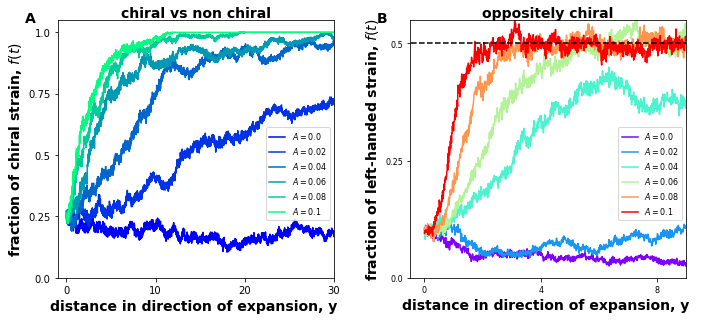

In [10]:
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/selection_with_ch/'
path_ch0='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/selection with ch/ch0 with ch/try1_plots/'
path_oppch='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/selection with ch/oppch with ch/try3_plots/'


#import matplotlib.pylab as plab
from matplotlib import cm



#### figures from:
##//projectnb/qedksk/ashishge/data/new_sim/oppch with ch
## and /ch0with ch



fs=14 #fontsize
fs_coexistence_label=12
sfs=8#small fontsize
lw=2#linewidth
ms=3#markersize




fig, ax = plt.subplots(1, 2, figsize=(10,4.5))

chlist=2* ( np.loadtxt(path_ch0+"chlist.txt")-0.05)
ch_to_show_list=chlist
print chlist
ftime_list=[]
time_list=[]
for i in range (len(chlist)):
    ftime_list.append(np.loadtxt(path_ch0+"ftime"+str(i) +".txt" )  ) 
plt.tick_params(labelsize=sfs)
ax[0].set_xlabel("distance in direction of expansion, y ", fontsize =fs, fontweight='bold')
ax[0].set_ylabel("fraction of chiral strain, $f(t)$", fontsize =fs, fontweight='bold')
order_array=np.argsort(chlist)
normalized_arr=(np.array(chlist)-np.min(ch_to_show_list) )/ (np.max(ch_to_show_list)-np.min(ch_to_show_list))


line_colors = cm.winter(normalized_arr)
# line_colors = cm.jet(arr)
for i in (order_array): 
    ch=chlist[i]

    if ch in ch_to_show_list:
        yval=ftime_list[i]
        xval=np.arange(len(yval))
        #ax[0].plot(xval,yval,'o',markersize=2,color=line_colors[i],markerfacecolor="None",label="$N =$"+str(N),markevery=10)            
        ax[0].plot(xval,yval,'-',color=line_colors[i],label="$A = $"+str(round(ch,2)),markevery=10)            
ax[0].legend(loc='upper right', bbox_to_anchor=(1.0, 0.6) ,fontsize =sfs)
ax[0].set_xlim(-50,np.max(xval)*1.05)

######### oppch

chlist=2* (np.loadtxt(path_oppch+"chlist.txt")-0.05)
ch_to_show_list=chlist
print ch_to_show_list
print chlist
ftime_list=[]
time_list=[]
for i in range (len(chlist)):
    ftime_list.append(np.loadtxt(path_oppch+"ftime"+str(i) +".txt" )  ) 
plt.tick_params(labelsize=sfs)
ax[1].set_xlabel("distance in direction of expansion, y ", fontsize =fs, fontweight='bold')
ax[1].set_ylabel("fraction of left-handed strain, $f(t)$", fontsize =fs, fontweight='bold')
order_array=np.argsort(chlist)

normalized_arr=(np.array(chlist)-np.min(ch_to_show_list) )/ (np.max(ch_to_show_list)-np.min(ch_to_show_list))
line_colors = cm.rainbow(normalized_arr)
for i in (order_array): 
    ch=chlist[i]
#     if round(ch,2) in ch_to_show_list:
    yval=ftime_list[i]
    xval=np.arange(len(yval))
    ax[1].plot(xval,yval,'-',markersize=2,color=line_colors[i],markerfacecolor="None",label="$A = $"+str(round(ch,2) ),markevery=10)            
ax[1].legend(loc='upper right', bbox_to_anchor=(1.0, 0.6) ,fontsize =sfs)

ax[1].plot([-100.0,np.max(xval)],[0.5,0.5],'--',color="black")



ax[0].set_title('A',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')    
ax[1].set_title('B',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')


ax[0].set_ylim(0.0,1.05)
ax[1].set_ylim(0.0,0.55)

ax[0].set_xlim(-100,3000)
ax[1].set_xlim(-50,900)
# for plotting against time
ticks=[0,1000,2000,3000]
labels=[0,1000,2000,3000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)

ticks=[0.0,0.25,0.5,0.75,1.0 ]
labels=[0.0,0.25,0.5,0.75,1.0  ]
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels)


ticks=[0,400,800]
labels=[0,400,800]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)

ticks=[0.0,0.25,0.5 ]
labels=ticks
ax[1].set_yticks(ticks)
ax[1].set_yticklabels(labels)

ax[0].text(0.5,1.01,'chiral vs non chiral',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[0].transAxes) 
ax[1].text(0.5,1.01,'oppositely chiral',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[1].transAxes) 


if not os.path.isdir(destpath): os.makedirs(destpath)
plt.tight_layout()
plt.savefig(destpath+'ftime_ch.eps')
plt.show()

### SI figure of selection with ch and N 4 panel

[0.1  0.08 0.   0.06 0.04 0.02]
[0.1  0.08 0.   0.06 0.04 0.02]
[0.1  0.08 0.   0.06 0.04 0.02]


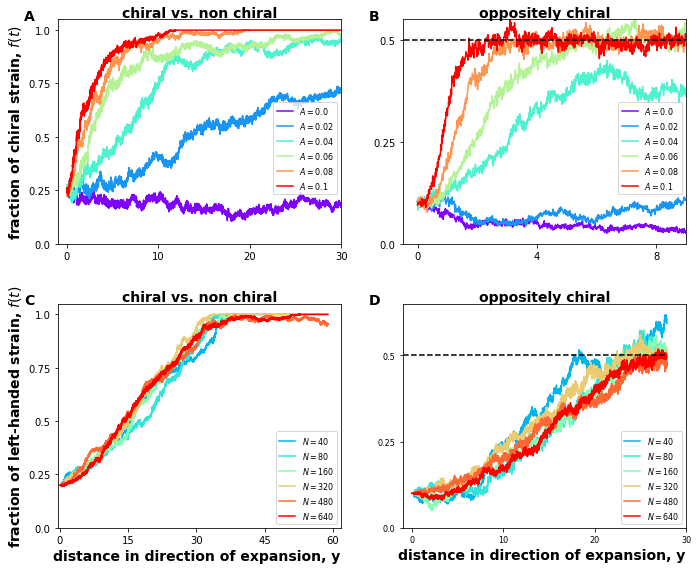

In [5]:
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/selection_with_chN/'
path_ch0_ch='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/selection with ch/ch0 with ch/try1_plots/'
path_oppch_ch='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/selection with ch/oppch with ch/try3_plots/'

path_ch0_N='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/selection with N/ch0 with N/try8Longer_plots/'
path_oppch_N='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/selection with N/oppch with N/try8NWM_Largech_plots/'


#import matplotlib.pylab as plab
from matplotlib import cm



#### figures from:
##//projectnb/qedksk/ashishge/data/new_sim/oppch with ch
## and /ch0with ch



fs=14 #fontsize
sfs=8#small fontsize
lw=2#linewidth
ms=3#markersize




fig, ax = plt.subplots(2, 2, figsize=(10,8))

################## with ch plots :ch0 ##################
chlist=2* ( np.loadtxt(path_ch0_ch+"chlist.txt")-0.05)
ch_to_show_list=chlist
print chlist
ftime_list=[]
time_list=[]
for i in range (len(chlist)):
    ftime_list.append(np.loadtxt(path_ch0_ch+"ftime"+str(i) +".txt" )  ) 
plt.tick_params(labelsize=sfs)
# ax[0][0].set_xlabel("distance in direction of expansion, y ", fontsize =fs, fontweight='bold')
ax[0][0].set_ylabel("fraction of chiral strain, $f(t)$", fontsize =fs, fontweight='bold')
order_array=np.argsort(chlist)
normalized_arr=(np.array(chlist)-np.min(ch_to_show_list) )/ (np.max(ch_to_show_list)-np.min(ch_to_show_list))


line_colors = cm.rainbow(normalized_arr)
# line_colors = cm.jet(arr)
for i in (order_array): 
    ch=chlist[i]
    if ch in ch_to_show_list:
        yval=ftime_list[i]
        xval=np.arange(len(yval))
        #ax[0][0].plot(xval,yval,'o',markersize=2,color=line_colors[i],markerfacecolor="None",label="$N =$"+str(N),markevery=10)            
        ax[0][0].plot(xval,yval,'-',color=line_colors[i],label="$A = $"+str(round(ch,2)),markevery=10)            
ax[0][0].legend(loc='upper right', bbox_to_anchor=(1.0, 0.65) ,fontsize =sfs)
ax[0][0].set_xlim(-50,np.max(xval)*1.05)

################## with ch plots :oppch ##################

chlist=2* (np.loadtxt(path_oppch_ch+"chlist.txt")-0.05)
ch_to_show_list=chlist
print ch_to_show_list
print chlist
ftime_list=[]
time_list=[]
for i in range (len(chlist)):
    ftime_list.append(np.loadtxt(path_oppch_ch+"ftime"+str(i) +".txt" )  ) 
plt.tick_params(labelsize=sfs)
# ax[0][1].set_xlabel("distance in direction of expansion, y ", fontsize =fs, fontweight='bold')
# ax[0][1].set_ylabel("fraction of left-handed strain, $f(t)$", fontsize =fs, fontweight='bold')
order_array=np.argsort(chlist)

normalized_arr=(np.array(chlist)-np.min(ch_to_show_list) )/ (np.max(ch_to_show_list)-np.min(ch_to_show_list))
line_colors = cm.rainbow(normalized_arr)
for i in (order_array): 
    ch=chlist[i]
#     if round(ch,2) in ch_to_show_list:
    yval=ftime_list[i]
    xval=np.arange(len(yval))
    ax[0][1].plot(xval,yval,'-',markersize=2,color=line_colors[i],markerfacecolor="None",label="$A = $"+str(round(ch,2) ),markevery=10)            
ax[0][1].legend(loc='upper right', bbox_to_anchor=(1.0, 0.65) ,fontsize =sfs)

ax[0][1].plot([-100.0,np.max(xval)],[0.5,0.5],'--',color="black")



ax[0][0].set_title('A',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')    
ax[0][1].set_title('B',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')


ax[0][0].set_ylim(0.0,1.05)
ax[0][1].set_ylim(0.0,0.55)

ax[0][0].set_xlim(-100,3000)
ax[0][1].set_xlim(-50,900)
# for plotting against time
ticks=[0,1000,2000,3000]
labels=[0,1000,2000,3000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0][0].set_xticks(ticks)
ax[0][0].set_xticklabels(labels)

ticks=[0.0,0.25,0.5,0.75,1.0 ]
labels=[0.0,0.25,0.5,0.75,1.0  ]
ax[0][0].set_yticks(ticks)
ax[0][0].set_yticklabels(labels)


ticks=[0,400,800]
labels=[0,400,800]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0][1].set_xticks(ticks)
ax[0][1].set_xticklabels(labels)

ticks=[0.0,0.25,0.5 ]
labels=ticks
ax[0][1].set_yticks(ticks)
ax[0][1].set_yticklabels(labels)

ax[0][0].text(0.5,1.01,'chiral vs. non chiral',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[0][0].transAxes) 
ax[0][1].text(0.5,1.01,'oppositely chiral',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[0][1].transAxes) 



################## with N plots :ch0 ##################


N_to_show_list=[40,80,160,320, 480,640]

Nlist=np.loadtxt(path_ch0_N+"Nlist.txt")
ftime_list=[]
time_list=[]
for i in range (len(Nlist)):
    ftime_list.append(np.loadtxt(path_ch0_N+"ftime"+str(i) +".txt" )  ) 
plt.tick_params(labelsize=sfs)
ax[1][0].set_xlabel("distance in direction of expansion, y ", fontsize =fs,fontweight='bold')
ax[1][0].set_ylabel("fraction of left-handed strain, $f(t)$", fontsize =fs,fontweight='bold')
order_array=np.argsort(Nlist)
normalized_arr=np.sqrt(np.array(Nlist)/np.max(Nlist))
### for try 7:
#normalized_arr=np.power( np.array(Nlist)/np.max(Nlist), 0.2)  ## normalisation to make distinguishable colors
line_colors = cm.rainbow(normalized_arr)
# line_colors = cm.jet(arr)
for i in (order_array): 
    N=Nlist[i]

    if N in N_to_show_list:
        yval=ftime_list[i]
        xval=np.arange(len(yval))
        #ax[1][0].plot(xval,yval,'o',markersize=2,color=line_colors[i],markerfacecolor="None",label="$N =$"+str(N),markevery=10)            
        ax[1][0].plot(xval,yval,'-',color=line_colors[i],label="$N =$"+str(int(N)),markevery=10)            
ax[1][0].legend(loc=4 ,fontsize =sfs)
ax[1][0].set_xlim(-50,np.max(xval)*1.05)

################## with N plots :oppch ##################
Nlist=np.loadtxt(path_oppch_N+"Nlist.txt")

ftime_list=[]
time_list=[]
for i in range (len(Nlist)):
    ftime_list.append(np.loadtxt(path_oppch_N+"ftime"+str(i) +".txt" )  ) 
plt.tick_params(labelsize=sfs)
ax[1][1].set_xlabel("distance in direction of expansion, y ", fontsize =fs,fontweight='bold')
# ax[1][1].set_ylabel("fraction of left-handed strain, $f(t)$", fontsize =fs)
order_array=np.argsort(Nlist)

normalized_arr=np.sqrt(np.array(Nlist)/np.max(Nlist))

### for try 7:
#normalized_arr=np.power( np.array(Nlist)/np.max(Nlist), 0.2) 
line_colors = cm.rainbow(normalized_arr)
for i in (order_array): 
    N=Nlist[i]
#     if N in [40,160,5120]:
    if N in N_to_show_list:
        yval=ftime_list[i]
        xval=np.arange(len(yval))
        ax[1][1].plot(xval,yval,'-',color=line_colors[i],markerfacecolor="None",label="$N =$"+str(int(N)),markevery=10)            
ax[1][1].legend(loc=4 ,fontsize =sfs)

ax[1][1].plot([-100.0,np.max(xval)],[0.5,0.5],'--',color="black")

ax[1][1].set_xlim(-100,np.max(xval)*1.05)


ax[1][0].set_title('C',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')    
ax[1][1].set_title('D',y=0.97,x=-0.1,fontsize = fs, fontweight='bold')




## for plotting against time
ticks=[0,1500,3000,4500,6000]
labels=[0,1500,3000,4500,6000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[1][0].set_xticks(ticks)
ax[1][0].set_xticklabels(labels)

ticks=[0.0,0.25,0.5,0.75,1.0 ]
labels=[0.0,0.25,0.5,0.75,1.0  ]
ax[1][0].set_yticks(ticks)
ax[1][0].set_yticklabels(labels)
ax[1][0].set_ylim(0.0,1.05)

ticks=[0,1000,2000,3000]
labels=[0,1000,2000,3000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[1][1].set_xticks(ticks)
ax[1][1].set_xticklabels(labels)

ticks=[0.0,0.25,0.5 ]
labels=ticks
ax[1][1].set_yticks(ticks)
ax[1][1].set_yticklabels(labels)
ax[1][1].set_ylim(0.0,0.65)
ax[1][0].text(0.5,1.01,'chiral vs. non chiral',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[1][0].transAxes) 
ax[1][1].text(0.5,1.01,'oppositely chiral',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[1][1].transAxes) 







if not os.path.isdir(destpath): os.makedirs(destpath)
plt.tight_layout()
plt.savefig(destpath+'ftime_chN.eps')
plt.show()

### SI figure same ch with N, shows width

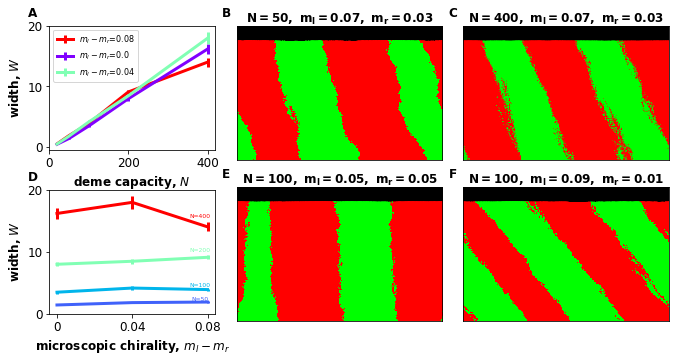

In [36]:
path ='/Users/ashish/Downloads/effect_of_N/samech_gdnoise/try6_compressed/'
path_width ='/Users/ashish/Downloads/effect_of_N/samech_gdnoise/try6_Hplots/'
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/same_ch_Nch/'


#### figures from:
##//projectnb/qedksk/ashishge/data/new_sim/effect_of_N/samech_gdnoise/try2/

import pandas as pd
from matplotlib import cm

fs=12 #fontsize

sfs=6#small fontsize
lw=2#linewidth
ms=3#markersize

if not os.path.isdir(destpath): os.makedirs(destpath)
    
    
    
    
    
    
# fig, ax = plt.subplots(2, 3, figsize=(10,5))


fig = plt.figure(figsize=(10,5))

ax=[]
ax.append([])
ax.append([])
ax[0].append([])
ax[0].append([])
ax[0].append([])
ax[1].append([])
ax[1].append([])
ax[1].append([])

gs1 =GridSpec(2,1 ) 
gs1.update(left=0.1, right=0.33,bottom=0.12,top=0.92,wspace=0.1,hspace=0.32)
gs2 =GridSpec(2,2 ) 
gs2.update(left=0.36, right=0.96,bottom=0.1,top=0.92,wspace=0.1,hspace=0.2)    
    
ax[0][0]=plt.subplot(gs1[0,0])
ax[1][0]=plt.subplot(gs1[1,0])
ax[0][1]=plt.subplot(gs2[0,0])
ax[0][2]=plt.subplot(gs2[0,1])
ax[1][1]=plt.subplot(gs2[1,0])
ax[1][2]=plt.subplot(gs2[1,1])


l_simulation=1000
chlist=2*np.loadtxt(path_width+'chlist.txt')-0.1
Nlist=np.loadtxt(path_width+'Nlist.txt')
width_mean=np.loadtxt(path_width+'het_mean1.txt')*l_simulation
width_stderr=np.loadtxt(path_width+'het_stderr1.txt')*l_simulation




N_to_show_list=[20,50,100,200,400]
normalized_arr=np.array(chlist.T[0])/np.max(chlist.T[0])
line_colors = cm.rainbow(normalized_arr)
for i,ch in enumerate(chlist.T[0]):
    
    in_Nlist=np.in1d(Nlist[i,:], N_to_show_list)
    

    xval=Nlist[i,in_Nlist]
    yval=width_mean[i,in_Nlist]
    errval=width_stderr[i,in_Nlist]

    yval=yval[np.argsort(xval)]
    errval=errval[np.argsort(xval)]
    xval=xval[np.argsort(xval)] 

  
    ax[0][0].errorbar(xval,yval,color=line_colors[i], yerr=  errval, label="$m_l-m_r$="+str(round(ch,2)))
ax[0][0].legend(loc="best")



N_to_show_list=[50,100,200,400]
normalized_arr=np.array(Nlist[0])/np.max(Nlist[0])
line_colors = cm.rainbow(normalized_arr)
for i,N in enumerate(Nlist[0]):
    if N in N_to_show_list:
        xval=chlist[np.argsort(chlist[:,i]),i]
        yval=width_mean[np.argsort(chlist[:,i]),i]
        errval=width_stderr[np.argsort(chlist[:,i]),i]
        ax[1][0].errorbar(xval,yval,color=line_colors[i], yerr=  errval, label="N="+str(N))        
        ax[1][0].text(xval[-1]*0.95,yval[-1]*1.1,"N="+str(int(N)),horizontalalignment='center',fontsize = sfs, color=line_colors[i])

        #         ax[1][0].legend(loc=2)
fold =path+"/ch0.07/N40/2/"
ca=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c= np.array( pd.read_csv(fold+'c.gz',sep=' ').values)
cb=c-ca
l= len(ca)
b=len(ca.T)
beg=int(b/2)
end=int(b)
black_space=int( (end-beg)*0.1 )
b_img=end-beg +black_space
img = np.zeros((b_img,l,3))
img[black_space:,:,0]=np.rot90(ca[:,beg:end])
img[black_space:,:,1]=np.rot90(cb[:,beg:end])
img3 = ax[0][1].imshow(img,aspect="auto")  

# print np.shape(np.rot90(ca[:,beg:end])), np.shape(img[black_space:,:,0])





fold =path+"/ch0.07/N400/1/"
ca=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c= np.array( pd.read_csv(fold+'c.gz',sep=' ').values)
cb=c-ca
img = np.zeros((b_img,l,3))
img[black_space:,:,0]=np.rot90(ca[:,beg:end])
img[black_space:,:,1]=np.rot90(cb[:,beg:end])
img3 = ax[0][2].imshow(img,aspect="auto")  


fold =path+"/ch0.05/N100/3/"
ca=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c= np.array( pd.read_csv(fold+'c.gz',sep=' ').values)
cb=c-ca
img = np.zeros((b_img,l,3))
img[black_space:,:,0]=np.rot90(ca[:,beg:end])
img[black_space:,:,1]=np.rot90(cb[:,beg:end])
img3 = ax[1][1].imshow(img,aspect="auto")



fold =path+"/ch0.09/N100/4/"
ca=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c= np.array( pd.read_csv(fold+'c.gz',sep=' ').values)
cb=c-ca
img = np.zeros((b_img,l,3))
img[black_space:,:,0]=np.rot90(ca[:,beg:end])
img[black_space:,:,1]=np.rot90(cb[:,beg:end])
img3 = ax[1][2].imshow(img,aspect="auto")







ax[0][1].set_xticks([])
ax[0][2].set_xticks([])
ax[1][1].set_xticks([])
ax[1][2].set_xticks([])


ax[0][1].set_yticks([])
ax[0][2].set_yticks([])
ax[1][1].set_yticks([])
ax[1][2].set_yticks([])


ax[0][1].text(0.5,1.02,'$\\mathbf{N=50,}$ $\\mathbf{m_l= 0.07,}$ $\\mathbf{m_r= 0.03}$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[0][1].transAxes) 
ax[0][2].text(0.5,1.02,'$\\mathbf{N=400,}$ $\\mathbf{m_l= 0.07,}$ $\\mathbf{m_r= 0.03}$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[0][2].transAxes) 

ax[1][1].text(0.5,1.02,'$\\mathbf{N=100,}$ $\\mathbf{m_l= 0.05,}$ $\\mathbf{m_r= 0.05}$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[1][1].transAxes) 
ax[1][2].text(0.5,1.02,'$\\mathbf{N=100,}$ $\\mathbf{m_l= 0.09,}$ $\\mathbf{m_r= 0.01}$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[1][2].transAxes)




ticks=[0,10,20]
labels=[0,10,20]
ax[0][0].set_yticks(ticks)
ax[0][0].set_yticklabels(labels)
ax[1][0].set_yticks(ticks)
ax[1][0].set_yticklabels(labels)

ticks=[0,0.04,0.08]
labels=[0,0.04,0.08]
ax[1][0].set_xticks(ticks)
ax[1][0].set_xticklabels(labels)

ax[0][0].set_title('A',y=1.02,x=-0.1,fontsize = fs, fontweight='bold') 
ax[0][1].set_title('B',y=1.02,x=-0.05,fontsize = fs, fontweight='bold') 
ax[0][2].set_title('C',y=1.02,x=-0.05,fontsize = fs, fontweight='bold') 

ax[1][0].set_title('D',y=1.02,x=-0.1,fontsize = fs, fontweight='bold') 
ax[1][1].set_title('E',y=1.02,x=-0.05,fontsize = fs, fontweight='bold') 
ax[1][2].set_title('F',y=1.02,x=-0.05,fontsize = fs, fontweight='bold') 

ax[0][0].tick_params(axis='both', which='major', labelsize=fs)
ax[1][0].tick_params(axis='both', which='major', labelsize=fs)
ax[0][0].set_ylabel("width, $W$", fontsize =fs,weight="bold")
ax[1][0].set_ylabel("width, $W$", fontsize =fs,weight="bold")
ax[0][0].set_xlabel("deme capacity, $N$", fontsize =fs,weight="bold")
ax[1][0].set_xlabel("microscopic chirality, $m_l -m_r$", fontsize =fs,weight="bold")


plt.savefig(destpath+'samech_Nch.pdf')
plt.show()

### Fig same ch with N without  widthimage

(2000, 999) (2000, 999)


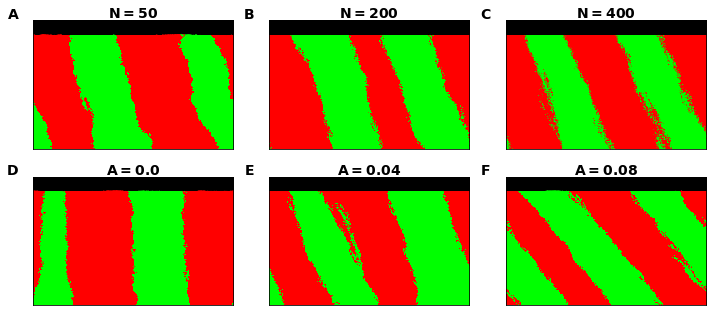

In [3]:
path ='/Users/ashish/Downloads/effect_of_N/samech_gdnoise/try6_compressed/'
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/same_ch_Nch/'


#### figures from:
##//projectnb/qedksk/ashishge/data/new_sim/effect_of_N/samech_gdnoise/try2/

import pandas as pd


fs=14 #fontsize

sfs=8#small fontsize
lw=2*2#linewidth
ms=3*2#markersize

if not os.path.isdir(destpath): os.makedirs(destpath)
fig, ax = plt.subplots(2, 3, figsize=(10,4.5))


fold =path+"/ch0.07/N40/2/"
ca=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c= np.array( pd.read_csv(fold+'c.gz',sep=' ').values)
cb=c-ca
l= len(ca)
b=len(ca.T)
beg=int(b/2)
end=int(b)
black_space=int( (end-beg)*0.1 )
b_img=end-beg +black_space
img = np.zeros((b_img,l,3))
img[black_space:,:,0]=np.rot90(ca[:,beg:end])
img[black_space:,:,1]=np.rot90(cb[:,beg:end])
img3 = ax[0][0].imshow(img,aspect="auto")  

print np.shape(np.rot90(ca[:,beg:end])), np.shape(img[black_space:,:,0])



fold =path+"/ch0.07/N200/1/"
ca=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c= np.array( pd.read_csv(fold+'c.gz',sep=' ').values) 
cb=c-ca

img = np.zeros((b_img,l,3))
img[black_space:,:,0]=np.rot90(ca[:,beg:end])
img[black_space:,:,1]=np.rot90(cb[:,beg:end])
img3 = ax[0][1].imshow(img,aspect="auto")  

fold =path+"/ch0.07/N400/1/"
ca=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c= np.array( pd.read_csv(fold+'c.gz',sep=' ').values)
cb=c-ca
img = np.zeros((b_img,l,3))
img[black_space:,:,0]=np.rot90(ca[:,beg:end])
img[black_space:,:,1]=np.rot90(cb[:,beg:end])
img3 = ax[0][2].imshow(img,aspect="auto")  


fold =path+"/ch0.05/N100/3/"
ca=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c= np.array( pd.read_csv(fold+'c.gz',sep=' ').values)
cb=c-ca
img = np.zeros((b_img,l,3))
img[black_space:,:,0]=np.rot90(ca[:,beg:end])
img[black_space:,:,1]=np.rot90(cb[:,beg:end])
img3 = ax[1][0].imshow(img,aspect="auto")

fold =path+"/ch0.07/N100/3/"
ca=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c= np.array( pd.read_csv(fold+'c.gz',sep=' ').values)
cb=c-ca
img = np.zeros((b_img,l,3))
img[black_space:,:,0]=np.rot90(ca[:,beg:end])
img[black_space:,:,1]=np.rot90(cb[:,beg:end])
img3 = ax[1][1].imshow(img,aspect="auto")

fold =path+"/ch0.09/N100/4/"
ca=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c= np.array( pd.read_csv(fold+'c.gz',sep=' ').values)
cb=c-ca
img = np.zeros((b_img,l,3))
img[black_space:,:,0]=np.rot90(ca[:,beg:end])
img[black_space:,:,1]=np.rot90(cb[:,beg:end])
img3 = ax[1][2].imshow(img,aspect="auto")




# ticks=[0,100,200]
# labels=[200,100,0] ## oorder reversed 
# labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
# ax[0][0].set_yticks(ticks)
# ax[0][0].set_yticklabels(labels)

ax[0][0].set_xticks([])
ax[0][1].set_xticks([])
ax[0][2].set_xticks([])
ax[1][0].set_xticks([])
ax[1][1].set_xticks([])
ax[1][2].set_xticks([])

ax[0][0].set_yticks([])
ax[0][1].set_yticks([])
ax[0][2].set_yticks([])
ax[1][0].set_yticks([])
ax[1][1].set_yticks([])
ax[1][2].set_yticks([])


ax[0][0].text(0.5,1.02,'$\\mathbf{N=50}$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[0][0].transAxes) 
ax[0][1].text(0.5,1.02,'$\\mathbf{N=200}$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[0][1].transAxes) 
ax[0][2].text(0.5,1.02,'$\\mathbf{N=400}$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[0][2].transAxes) 

ax[1][0].text(0.5,1.02,'$\\mathbf{A=0.0}$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[1][0].transAxes) 
ax[1][1].text(0.5,1.02,'$\\mathbf{A=0.04}$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[1][1].transAxes) 
ax[1][2].text(0.5,1.02,'$\\mathbf{A=0.08}$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[1][2].transAxes)

# ticks=[0,600,1200]
# labels=[0,600,1200]
# labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
# ax[1][0].set_xticks(ticks)
# ax[1][0].set_xticklabels(labels)
# ax[1][1].set_xticks(ticks)
# ax[1][1].set_xticklabels(labels)
# ax[1][2].set_xticks(ticks)
# ax[1][2].set_xticklabels(labels)

# ticks=[2200,1200,200]
# labels=[0,1000,2000]
# labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
# ax[0][0].set_yticks(ticks)
# ax[0][0].set_yticklabels(labels)
# ax[1][0].set_yticks(ticks)
# ax[1][0].set_yticklabels(labels)



ax[0][0].set_title('A',y=0.97,x=-0.1,fontsize = fs, fontweight='bold') 
ax[0][1].set_title('B',y=0.97,x=-0.1,fontsize = fs, fontweight='bold') 
ax[0][2].set_title('C',y=0.97,x=-0.1,fontsize = fs, fontweight='bold') 

ax[1][0].set_title('D',y=0.97,x=-0.1,fontsize = fs, fontweight='bold') 
ax[1][1].set_title('E',y=0.97,x=-0.1,fontsize = fs, fontweight='bold') 
ax[1][2].set_title('F',y=0.97,x=-0.1,fontsize = fs, fontweight='bold') 


plt.tight_layout()
plt.savefig(destpath+'samech_Nch_ver2.eps')
plt.show()

### effect of N for different f* - 0.5, 0.675, 1.

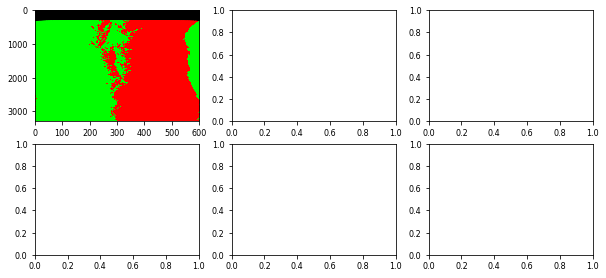

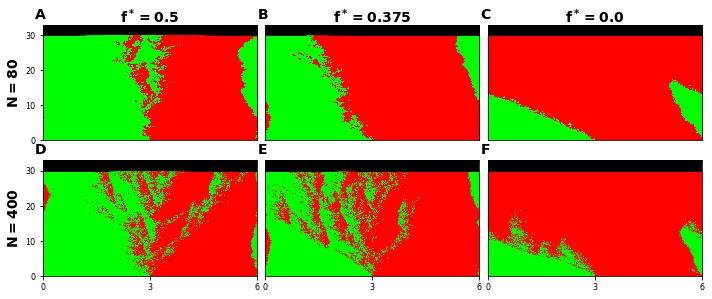

In [25]:
path_nwm ='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/H mixing at other fstar SI/try2NWM_compressed/'
path_wm ='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/H mixing at other fstar SI/try2WM_compressed/'
destpath='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/mixing_fstar/'



############### for path_wm:
#####replace wm0 with wm0, find and replace path_nwm with path_wm(path_nwm=path_wm), 



#### figures from:
##/projectnb/qedksk/ashishge/data/new_sim/Hdecay_fstar/gdnoise/try2NWM/ and /try2WM/

import pandas as pd


fs=14 #fontsize

sfs=8#small fontsize
lw=2*2#linewidth
ms=3*2#markersize

if not os.path.isdir(destpath): os.makedirs(destpath)
fig, ax = plt.subplots(2, 3, figsize=(10,4.5))


fold =path_nwm+"/N80/chsum1./wm0/1/"
ca=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c= np.array( pd.read_csv(fold+'c.gz',sep=' ').values)
# cb=c-ca
l= len(ca)
b=len(ca.T)
b_cutoff=int(b*1.1)
##### to pad the arrays with extra black space.
temp=np.zeros((l,b_cutoff))
temp[:,:b]=ca
ca=deepcopy(temp)
temp[:,:b]=c
c=deepcopy(temp)
cb=c-ca

img = np.zeros((b_cutoff,l,3))
img[:,:,0]=np.rot90(ca[:,:b_cutoff])
img[:,:,1]=np.rot90(cb[:,:b_cutoff])
img3 = ax[0][0].imshow(np.roll(img,l/2,axis=1),aspect="auto")  


fold =path_nwm+"/N80/chsum1.25/wm0/1/"
ca[:,:b]=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c[:,:b]= np.array( pd.read_csv(fold+'c.gz',sep=' ').values) 
cb=c-ca
# l= len(ca)
# b=len(ca.T)
# b_cutoff=b
img = np.zeros((b_cutoff,l,3))
img[:,:,0]=np.rot90(ca[:,:b_cutoff])
img[:,:,1]=np.rot90(cb[:,:b_cutoff])
img3 = ax[0][1].imshow(np.roll(img,l/2,axis=1),aspect="auto")  

fold =path_nwm+"/N80/chsum2.0/wm0/1/"
ca[:,:b]=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c[:,:b]= np.array( pd.read_csv(fold+'c.gz',sep=' ').values)
cb=c-ca
img = np.zeros((b_cutoff,l,3))
img[:,:,0]=np.rot90(ca[:,:b_cutoff])
img[:,:,1]=np.rot90(cb[:,:b_cutoff])
img3 = ax[0][2].imshow(np.roll(img,l/2,axis=1),aspect="auto")  


fold =path_nwm+"/N400/chsum1./wm0/1/"
ca[:,:b]=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c[:,:b]= np.array( pd.read_csv(fold+'c.gz',sep=' ').values)
cb=c-ca
img = np.zeros((b_cutoff,l,3))
img[:,:,0]=np.rot90(ca[:,:b_cutoff])
img[:,:,1]=np.rot90(cb[:,:b_cutoff])
img3 = ax[1][0].imshow(np.roll(img,l/2,axis=1),aspect="auto")

fold =path_nwm+"/N400/chsum1.25/wm0/1/"
ca[:,:b]=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c[:,:b]= np.array( pd.read_csv(fold+'c.gz',sep=' ').values)
cb=c-ca
img = np.zeros((b_cutoff,l,3))
img[:,:,0]=np.rot90(ca[:,:b_cutoff])
img[:,:,1]=np.rot90(cb[:,:b_cutoff])
img3 = ax[1][1].imshow(np.roll(img,l/2,axis=1),aspect="auto")

fold =path_nwm+"/N400/chsum2.0/wm0/1/"
ca[:,:b]=np.array( pd.read_csv(fold+'ca.gz',sep=' ').values)
c[:,:b]= np.array( pd.read_csv(fold+'c.gz',sep=' ').values)
cb=c-ca
img = np.zeros((b_cutoff,l,3))
img[:,:,0]=np.rot90(ca[:,:b_cutoff])
img[:,:,1]=np.rot90(cb[:,:b_cutoff])
img3 = ax[1][2].imshow(np.roll(img,l/2,axis=1),aspect="auto")




# ticks=[0,100,200]
# labels=[200,100,0] ## oorder reversed 
# labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
# ax[0][0].set_yticks(ticks)
# ax[0][0].set_yticklabels(labels)

ax[0][0].set_xticks([])
ax[0][1].set_xticks([])
ax[0][2].set_xticks([])
ax[1][0].set_xticks([])
ax[1][1].set_xticks([])
ax[1][2].set_xticks([])

ax[0][0].set_yticks([])
ax[0][1].set_yticks([])
ax[0][2].set_yticks([])
ax[1][0].set_yticks([])
ax[1][1].set_yticks([])
ax[1][2].set_yticks([])


ax[0][0].text(0.5,1.02,'$\\mathbf{f^*=0.5}$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[0][0].transAxes) 
ax[0][1].text(0.5,1.02,'$\\mathbf{f^*=0.375}$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[0][1].transAxes) 
ax[0][2].text(0.5,1.02,'$\\mathbf{f^*=0.0}$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[0][2].transAxes) 

ax[0][0].text(-0.1,0.5,'$\\mathbf{N=80}$',rotation=90,verticalalignment='center',horizontalalignment='right',fontsize = fs, fontweight='bold',transform=ax[0][0].transAxes) 
ax[1][0].text(-0.1,0.5,'$\\mathbf{N=400}$',rotation=90,verticalalignment='center',horizontalalignment='right',fontsize = fs, fontweight='bold',transform=ax[1][0].transAxes) 


# ax[1][0].text(0.5,1.02,'$A=0.0$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[1][0].transAxes) 
# ax[1][1].text(0.5,1.02,'$A=0.04$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[1][1].transAxes) 
# ax[1][2].text(0.5,1.02,'$A=0.08$',horizontalalignment='center',fontsize = fs, fontweight='bold',transform=ax[1][2].transAxes)


plt.tick_params(labelsize=sfs)
ticks=[0,300,600]
labels=[0,300,600]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[1][0].set_xticks(ticks)
ax[1][0].set_xticklabels(labels)
ax[1][1].set_xticks(ticks)
ax[1][1].set_xticklabels(labels)
ax[1][2].set_xticks(ticks)
ax[1][2].set_xticklabels(labels)

ticks=[3300,2300,1300,300]
labels=[0,1000,2000,3000]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0][0].set_yticks(ticks)
ax[0][0].set_yticklabels(labels)
ax[1][0].set_yticks(ticks)
ax[1][0].set_yticklabels(labels)



ax[0][0].set_title('A',y=1.0,x=-0.01,fontsize = fs, fontweight='bold') 
ax[0][1].set_title('B',y=1.0,x=-0.01,fontsize = fs, fontweight='bold') 
ax[0][2].set_title('C',y=1.0,x=-0.01,fontsize = fs, fontweight='bold') 

ax[1][0].set_title('D',y=1.0,x=-0.01,fontsize = fs, fontweight='bold') 
ax[1][1].set_title('E',y=1.0,x=-0.01,fontsize = fs, fontweight='bold') 
ax[1][2].set_title('F',y=1.0,x=-0.01,fontsize = fs, fontweight='bold') 


plt.tight_layout(pad=2.5,w_pad=-0.3,h_pad=-0.35)
plt.savefig(destpath+'mixing_fstar.pdf')
plt.show()

### SI Fig Fstar-Fbar with slope $\neq$ 1

[0.55  0.5   0.45  0.625 0.325 0.675 0.375]
1.447956134982324
[0.55  0.5   0.125 0.45  0.625 0.875 0.    0.325 0.675 1.    0.2   0.375
 0.8  ]


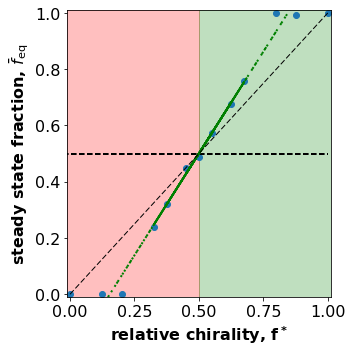

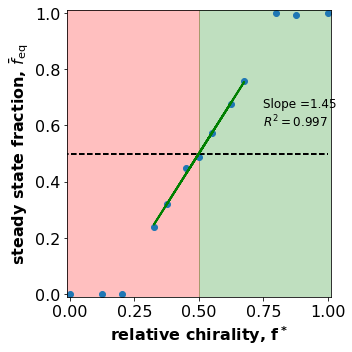

In [10]:
import scipy
from scipy import stats
destpath="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/fstar_fbar/SteepSlope/"
path='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/fbar_fstar_coexistence/fstar_avg/gdnoise10Steep/'

ms=8
fs=16
sfs=12
lw=2
if not os.path.exists(destpath): os.makedirs(destpath) 
fbar=np.loadtxt(path+'fbar_fstar.txt')
xaxis=np.loadtxt(path+'fbar_fstar_xaxis.txt')

######## 0.25 and 1.75 havent reached steady state! So we should remove them!

indices_to_delete=[]
indices_to_delete.append(np.where(xaxis==0.25))
indices_to_delete.append(np.where(xaxis==0.75))

fbar=np.delete(fbar,indices_to_delete)
xaxis=np.delete(xaxis,indices_to_delete)





# fig = plt.figure(figsize=(9,9))  
# ax = fig.add_subplot(111)
# plt.plot(xaxis,fbar,'o')
# #ax.fill_between(0, 0.0, 1.0, facecolor='yellow', alpha=0.5,label='1 sigma range')
# ax.axvspan(-0.01, 0.5, alpha=0.25, color='red')
# ax.axvspan(0.5, 1.01, alpha=0.25, color='green')
# ax.set_ylim(-0.01,1.01)
# ax.set_xlim(-0.01,1.01)
# ax.plot([-1, 1], [0.5, 0.50],'black', linestyle='--',linewidth =lw)
# #ax.plot([-1, 1], [1.0, 1.0]H,'black', linestyle='-',linewidth =lw)
# #ax.plot([-1,1], [0.0, 0.0],'black', linestyle='-',linewidth =lw)
# #plt.xlabel('chirality difference, $\\frac{\\chi_a}{\\chi_a-\\chi_b}$',fontsize = fs,fontweight='bold')
# plt.xlabel('$\\mathbf{f^*}$, $\\mathbf{ \\frac{A^{(1)} }{A^{(1)}-A^{(2)}}  }$',fontsize = fs)
# plt.ylabel('steady state fraction, $\\bar{f}$',fontsize = fs, fontweight='bold') 
# plt.tick_params(axis='both', which='major', labelsize=fs) 
# plt.tight_layout()
# plt.savefig(destpath+'fbar_fstar_steep_vs_chirality.pdf')


idx_subset=np.intersect1d(np.where(xaxis>0.3)[0],np.where(xaxis<0.7)[0])
x_subset=xaxis[idx_subset]
y_subset=fbar[idx_subset]
print x_subset

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_subset, y_subset)


fig = plt.figure(figsize=(5,5))  
ax = fig.add_subplot(111)
plt.plot(xaxis,fbar,'o')
ax.axvspan(-0.01, 0.5, alpha=0.25, color='red')
ax.axvspan(0.5, 1.01, alpha=0.25, color='green')
ax.set_ylim(-0.01,1.01)
ax.set_xlim(-0.01,1.01)
ax.plot([-1, 1], [0.5, 0.50],'black', linestyle='--',linewidth =lw)
ax.plot(x_subset, intercept+slope*x_subset,'g-',linewidth =lw)
ax.plot(xaxis, intercept+slope*xaxis,'--',color='g', dashes=(1, 8),linewidth =lw)
ax.plot([0,1], [0,1],'--',color='black',linewidth =1)
# ax.text(0.8, 0.7,"$R^2 =$" +"{:.3f}".format(r_value**2),fontsize = fs)
# ax.text(0.8, 0.75,"Slope =" +"{:.2f}".format(slope)+"\n$R^2 =$" +"{:.3f}".format(r_value**2),fontsize = fs)
plt.xlabel('relative chirality, $\\mathbf{f^*}$',fontsize = fs, fontweight='bold')
plt.ylabel('steady state fraction, $\\bar{f}_{\\mathrm{eq}}$',fontsize = fs, fontweight='bold') 
plt.tick_params(axis='both', which='major', labelsize=fs) 
plt.tight_layout()
plt.savefig(destpath+'fbar_fstar_steepfit_vs_chirality.pdf')





fig = plt.figure(figsize=(5,5))  
ax = fig.add_subplot(111)
plt.plot(xaxis,fbar,'o')
ax.axvspan(-0.01, 0.5, alpha=0.25, color='red')
ax.axvspan(0.5, 1.01, alpha=0.25, color='green')
ax.set_ylim(-0.01,1.01)
ax.set_xlim(-0.01,1.01)
ax.plot([-1, 1], [0.5, 0.50],'black', linestyle='--',linewidth =lw)
ax.plot(x_subset, intercept+slope*x_subset,'g-',linewidth =lw)
# ax.text(0.8, 0.7,"$R^2 =$" +"{:.3f}".format(r_value**2),fontsize = fs)
ax.text(0.75, 0.6,"Slope =" +"{:.2f}".format(slope)+"\n$R^2 =$" +"{:.3f}".format(r_value**2),fontsize = sfs)
plt.xlabel('relative chirality, $\\mathbf{f^*}$',fontsize = fs, fontweight='bold')
plt.ylabel('steady state fraction, $\\bar{f}_{\\mathrm{eq}}$',fontsize = fs, fontweight='bold') 
plt.tick_params(axis='both', which='major', labelsize=fs) 
plt.tight_layout()
plt.savefig(destpath+'fbar_fstar_steepfit_vs_chirality2.pdf')







print slope


print xaxis
plt.show()

### SI fig: Fbar prediction from bulge slopes

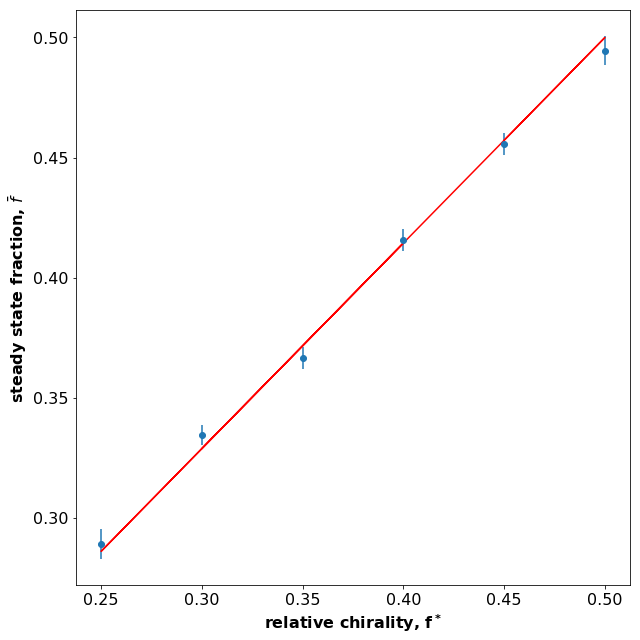

In [4]:
import scipy
from scipy import stats
destpath="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/fstar_fbar_from_bulge_slope/"
path_fbar='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/fstar fbar from bulge slopes/try3_wallExtract_plots/'
path_bulgeSlope='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/fstar fbar from bulge slopes/try3_slope_analysis_plots/'


ms=8
fs=16
lw=2
if not os.path.exists(destpath): os.makedirs(destpath) 
fbar=np.loadtxt(path_fbar+'fbar.txt')
fbar_stderr=np.loadtxt(path_fbar+'fbar_stderr.txt')
chlist=np.loadtxt(path_fbar+'chlist.txt')
fstar=np.array(1.0-chlist/2 )[:,0]

chlist_bulge=np.loadtxt(path_bulgeSlope+'chlist.txt')
alphaD=np.loadtxt(path_bulgeSlope+'alphaD.txt')
vParallel=np.loadtxt(path_bulgeSlope+'vParallel.txt')

charr=np.array(chlist_bulge)[:,0]
fstar_bulge=1.0-charr[np.where(charr!=1.)]/2  
beta= vParallel[np.where(charr!=1.)] /(0.5-fstar_bulge)


alphaD_avg=np.mean(alphaD)
beta_avg=np.mean(beta)

theory_prediction= 0.5+ (beta_avg/alphaD_avg )*(fstar-0.5)

fbar_bulge=0.5+ (  beta/ np.array(alphaD)[np.where(charr!=1.) ]  ) *  (fstar_bulge-0.5)



fig = plt.figure(figsize=(9,9))  
ax = fig.add_subplot(111)
plt.errorbar(fstar,fbar,yerr=fbar_stderr,fmt='o')
plt.plot(fstar,theory_prediction,'r-')
plt.xlabel('relative chirality, $\\mathbf{f^*}$',fontsize = fs, fontweight='bold')
plt.ylabel('steady state fraction, $\\bar{f}$',fontsize = fs, fontweight='bold') 
plt.tick_params(axis='both', which='major', labelsize=fs) 
plt.tight_layout()
plt.savefig(destpath+'fbar_fstar_Predicted_from_BulgeSlope.pdf')

plt.show()

### SI Fig fbar prediciton from bulge slope 2 panel

0.07577947313405808 -0.022690036210251962
 beta/v , alpha/D=  0.06816858109323963 0.0796087335118585
 (beta *D/v alpha)=  0.8562952591512494
sqrt ((theory_prediction- fbar)**2)= 0.010069755655586187
slope, intercept, r_value, p_value, std_err  0.8234867952382917 0.09271312759030204 0.9990987464021834 1.2180210461220868e-06 0.017492780997638936
0.8059940142406528 0.8562952591512494 0.8409795762359307


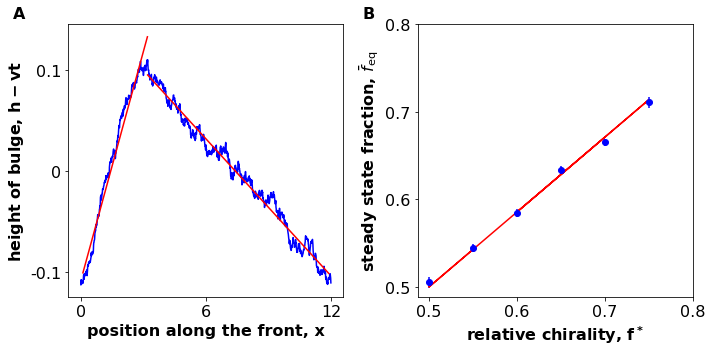

In [7]:
import scipy
from scipy import stats
destpath="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/fstar_fbar_from_bulge_slope/"
path_fbar='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/fstar fbar from bulge slopes/try3_wallExtract_plots/'
path_bulgeSlope='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/fstar fbar from bulge slopes/try3_slope_analysis_plots/'
### heigh from /Downloads/bulge_slope_from_track_height/try3_slope_analysis 1/chsum1.5/h0.25/2/height_x.txt

ms=8
fs=16
lw=2


if not os.path.exists(destpath): os.makedirs(destpath) 
fig, ax = plt.subplots( 1,2, figsize=(10,5))

###### A
def plot_height_and_fit(h,fit1,x1,fit2,x2,destfile_name):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.set_title('h(x) ')
    plt.plot(h,'b-')
    plt.plot(x1,fit1,'r-')
    plt.plot(x2,fit2,'r-')
    plt.savefig(destfile_name)

### plotting H_x   
harr=np.loadtxt(path_bulgeSlope+'height_x.txt') ## from /bulge_slope_from_track_height/try3_slope_analysis 1/chsum1.5/h0.25/2/height_x.txt
l=len(harr)    
xmin=np.argmin(harr)       
harr=np.roll(harr,-xmin)       
xmax=np.argmax(harr)
xval1=np.arange(10,xmax)
xval2=np.arange(xmax,l-10)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress( xval1,harr[xval1]  )
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress( xval2,harr[xval2]   )
print slope1,slope2
fit1=slope1*xval1+intercept1
fit2=slope2*xval2+intercept2
ax[0].plot(harr,'b-')
ax[0].plot(xval1,fit1,'r-')
ax[0].plot(xval2,fit2,'r-')




ticks=[0,600,1200]
labels=[0,600,1200]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)
h_mean=np.mean(harr)
#ticks=[13900,13910,13920]
# labels=[0,10.,20.]
ticks=[h_mean-10,h_mean,h_mean+10]
labels=[-10.,0,10.]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels)
ax[0].tick_params(axis='both', which='major', labelsize=fs) 
ax[0].set_ylabel('height of bulge, $ \\mathbf{h-vt}$ ',fontsize = fs, fontweight='bold')
ax[0].set_xlabel("position along the front, x",fontsize = fs, fontweight='bold') 


##### B
fbar=1.0-np.loadtxt(path_fbar+'fbar.txt')
fbar_stderr=np.loadtxt(path_fbar+'fbar_stderr.txt')
chlist=np.loadtxt(path_fbar+'chlist.txt')
#fstar=np.array(1.0-chlist/2 )[:,0]
fstar=np.array(chlist/2 )[:,0]

chlist_bulge=np.loadtxt(path_bulgeSlope+'chlist.txt')
alphaD=np.loadtxt(path_bulgeSlope+'alphaD.txt')
vParallel=np.loadtxt(path_bulgeSlope+'vParallel.txt')

charr=np.array(chlist_bulge)[:,0]
# fstar_bulge=1.0-charr[np.where(charr!=1.)]/2  
fstar_bulge=charr[np.where(charr!=1.)]/2  
beta= -1*vParallel[np.where(charr!=1.)] /(0.5-fstar_bulge)


alphaD_predicted=np.mean(alphaD)
beta_predicted=np.mean(beta)
#####
predicted_from_one_point_flag=0

if predicted_from_one_point_flag==1:
    alphaD_predicted=alphaD[np.argmin( np.abs(fstar_bulge-0.8 ))]
    beta_predicted=beta[np.argmin( np.abs(fstar_bulge-0.8 ))]

theory_prediction= 0.5+ (beta_predicted/alphaD_predicted )*(fstar-0.5)
fbar_bulge=0.5+ (  beta/ np.array(alphaD)[np.where(charr!=1.) ]  ) *  (fstar_bulge-0.5)

print " beta/v , alpha/D= " ,beta_predicted,alphaD_predicted 
print " (beta *D/v alpha)= " ,beta_predicted/alphaD_predicted 

print "sqrt ((theory_prediction- fbar)**2)=", np.sqrt(np.sum( (theory_prediction- fbar)**2 ))


ax[1].errorbar(fstar,fbar,yerr=fbar_stderr,fmt='o',color='blue')
ax[1].plot(fstar,theory_prediction,'r-')
ax[1].set_xlabel('relative chirality, $\\mathbf{f^*}$',fontsize = fs, fontweight='bold')
ax[1].set_ylabel('steady state fraction, $\\bar{f}_{\\mathrm{eq}}$',fontsize = fs, fontweight='bold') 

ticks=[0.5,0.6,0.7,0.8]
labels=[0.5,0.6,0.7,0.8]
ax[1].set_yticks(ticks)
ax[1].set_yticklabels(labels)



from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(fstar, fbar)
print "slope, intercept, r_value, p_value, std_err ",slope, intercept, r_value, p_value, std_err
print slope-std_err ,beta_predicted/alphaD_predicted, slope+std_err 


ticks=[0.5,0.6,0.7,0.8]
labels=[0.5,0.6,0.7,0.8]
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)
ax[1].tick_params(axis='both', which='major', labelsize=fs) 
ax[0].set_title('A',y=1.0,x=-0.18,fontsize = fs, fontweight='bold') 
ax[1].set_title('B',y=1.0,x=-0.18,fontsize = fs, fontweight='bold') 
plt.tight_layout()
if predicted_from_one_point_flag==1:
    plt.savefig(destpath+'fbar_fstar_Predicted_from_fstar0.8_2Panel.pdf')
else:
    plt.savefig(destpath+'fbar_fstar_Predicted_2Panel.pdf')

plt.show()

### 2 panel fig showing c and ca.

1199 14000 13895 13924 31
31 31
(31, 1199, 3)
30
 (beta *D/v alpha)=  0.8562952591512494
sqrt ((theory_prediction- fbar)**2)= 0.010069755655586187
slope, intercept, r_value, p_value, std_err  0.8234867952382917 0.09271312759030204 0.9990987464021834 1.2180210461220868e-06 0.017492780997638936
0.8059940142406528 0.8562952591512494 0.8409795762359307


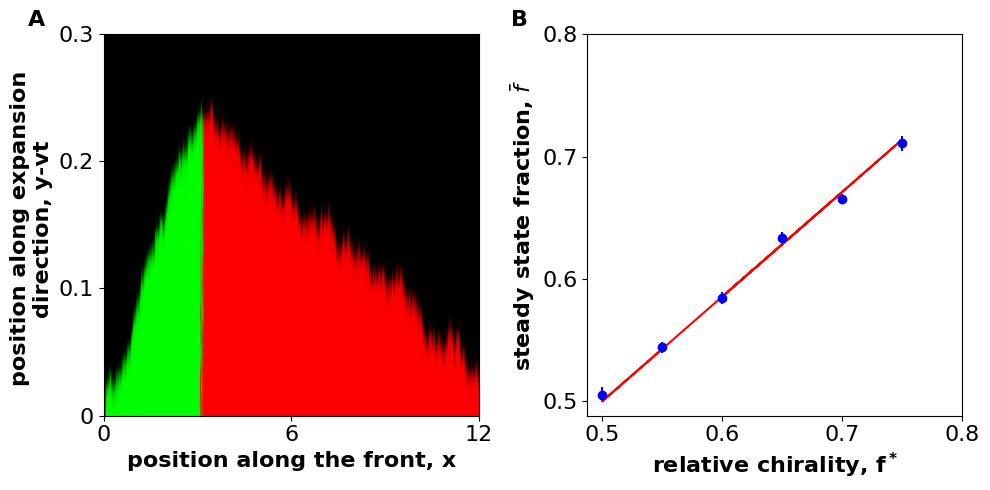

In [72]:
import scipy
from scipy import stats
import pandas as pd
destpath="/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/figures/fstar_fbar_from_bulge_slope/"
path_fbar='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/fstar fbar from bulge slopes/try3_wallExtract_plots/'
path_bulgeSlope='/Users/ashish/Dropbox/ashish/paper/selection for chirality paper/paper figures data/fstar fbar from bulge slopes/try3_slope_analysis_plots/'

path_colony_image='/Users/ashish/Downloads/bulge_slope_from_track_height/try3_chsum1.5_h0.25_2/'
### colony iamge from from /Downloads/bulge_slope_from_track_height/try3_slope_analysis 1/chsum1.5/h0.25/2/height_x.txt

ms=8
fs=16
lw=2


if not os.path.exists(destpath): os.makedirs(destpath) 
fig, ax = plt.subplots( 1,2, figsize=(10,5))

###### A
def plot_height_and_fit(h,fit1,x1,fit2,x2,destfile_name):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.set_title('h(x) ')
    plt.plot(h,'b-')
    plt.plot(x1,fit1,'r-')
    plt.plot(x2,fit2,'r-')
    plt.savefig(destfile_name)

### plotting c and ca


# ca=np.array( pd.read_csv(path_colony_image+'ca.txt',sep=' ').values)
# c= np.array( pd.read_csv(path_colony_image+'c.txt',sep=' ').values)
cb=c-ca
l= len(ca)
b=len(ca.T)

for i in range(0,b):
    if np.sum(c[:,i])<l*0.01:   #condition for the colony to have expanded
#         lexp=i-10
        end=i+4
        break
    if np.sum(c[:,i])>l*0.99:
        beg=i-1
# beg=int(lexp-10)
# end=int(lexp+10)
peak_loc=np.argmin(c[:,beg+4])


black_space=int( (end-beg)*0.1 )
b_img=end-beg +black_space
print l,b,beg,end,b_img
print end-beg+black_space, b_img
img = np.zeros((b_img,l,3))
img[black_space:,:,0]=np.rot90(ca[:,beg:end])
img[black_space:,:,1]=np.rot90(cb[:,beg:end])
print np.shape(img)
img3 = ax[0].imshow(np.roll(img,-peak_loc,axis=1),aspect="auto",interpolation='spline16')

l_img=len(img)-1
print l_img


# harr=np.loadtxt(path_bulgeSlope+'height_x.txt') ## from /bulge_slope_from_track_height/try3_slope_analysis 1/chsum1.5/h0.25/2/height_x.txt
# l=len(harr)    
# xmin=np.argmin(harr)       
# harr=np.roll(harr,-xmin)       
# xmax=np.argmax(harr)
# xval1=np.arange(10,xmax)
# xval2=np.arange(xmax,l-10)
# slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress( xval1,harr[xval1]  )
# slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress( xval2,harr[xval2]   )
# print slope1,slope2
# fit1=slope1*xval1+intercept1
# fit2=slope2*xval2+intercept2
# ax[0].plot(harr,'b-')
# ax[0].plot(xval1,fit1,'r-')
# ax[0].plot(xval2,fit2,'r-')




ticks=[0,600,1200]
labels=[0,600,1200]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)

ax[0].set_ylim(l_img,0)
ticks=[l_img,l_img-10,l_img-20,l_img-30]
labels=[0,10.,20.,30.]
labels[:] = [x / unit_conversion for x in labels] ## converting unit of measurement
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels)

ax[0].tick_params(axis='both', which='major', labelsize=fs) 
ax[0].set_ylabel('position along expansion \ndirection, y-vt ',fontsize = fs, fontweight='bold')
ax[0].set_xlabel("position along the front, x",fontsize = fs, fontweight='bold') 


##### B
fbar=1.0-np.loadtxt(path_fbar+'fbar.txt')
fbar_stderr=np.loadtxt(path_fbar+'fbar_stderr.txt')
chlist=np.loadtxt(path_fbar+'chlist.txt')
#fstar=np.array(1.0-chlist/2 )[:,0]
fstar=np.array(chlist/2 )[:,0]

chlist_bulge=np.loadtxt(path_bulgeSlope+'chlist.txt')
alphaD=np.loadtxt(path_bulgeSlope+'alphaD.txt')
vParallel=np.loadtxt(path_bulgeSlope+'vParallel.txt')

charr=np.array(chlist_bulge)[:,0]
# fstar_bulge=1.0-charr[np.where(charr!=1.)]/2  
fstar_bulge=charr[np.where(charr!=1.)]/2  
beta= -1*vParallel[np.where(charr!=1.)] /(0.5-fstar_bulge)


alphaD_predicted=np.mean(alphaD)
beta_predicted=np.mean(beta)
#####
predicted_from_one_point_flag=0

if predicted_from_one_point_flag==1:
    alphaD_predicted=alphaD[np.argmin( np.abs(fstar_bulge-0.8 ))]
    beta_predicted=beta[np.argmin( np.abs(fstar_bulge-0.8 ))]

theory_prediction= 0.5+ (beta_predicted/alphaD_predicted )*(fstar-0.5)
fbar_bulge=0.5+ (  beta/ np.array(alphaD)[np.where(charr!=1.) ]  ) *  (fstar_bulge-0.5)


print " (beta *D/v alpha)= " ,beta_predicted/alphaD_predicted 

print "sqrt ((theory_prediction- fbar)**2)=", np.sqrt(np.sum( (theory_prediction- fbar)**2 ))


ax[1].errorbar(fstar,fbar,yerr=fbar_stderr,fmt='o',color='blue')
ax[1].plot(fstar,theory_prediction,'r-')
ax[1].set_xlabel('relative chirality, $\\mathbf{f^*}$',fontsize = fs, fontweight='bold')
ax[1].set_ylabel('steady state fraction, $\\bar{f}$',fontsize = fs, fontweight='bold') 

ticks=[0.5,0.6,0.7,0.8]
labels=[0.5,0.6,0.7,0.8]
ax[1].set_yticks(ticks)
ax[1].set_yticklabels(labels)



from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(fstar, fbar)
print "slope, intercept, r_value, p_value, std_err ",slope, intercept, r_value, p_value, std_err
print slope-std_err ,beta_predicted/alphaD_predicted, slope+std_err 


ticks=[0.5,0.6,0.7,0.8]
labels=[0.5,0.6,0.7,0.8]
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)
ax[1].tick_params(axis='both', which='major', labelsize=fs) 
ax[0].set_title('A',y=1.0,x=-0.18,fontsize = fs, fontweight='bold') 
ax[1].set_title('B',y=1.0,x=-0.18,fontsize = fs, fontweight='bold') 
plt.tight_layout()
if predicted_from_one_point_flag==1:
    plt.savefig(destpath+'fbar_fstar_Predicted_from_fstar0.8_colonyimage.pdf')
else:
    plt.savefig(destpath+'fbar_fstar_Predicted_colonyimage.pdf')

plt.show()